In [2]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('llava_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

          0         1         2         3         4          5         6  \
0  3.162146 -0.903273 -1.736204  1.288543  6.582812  -8.629716 -0.022527   
1  4.880323  1.025220 -0.284510  5.588247  3.900945 -11.105122  0.759113   
2  3.341349  5.170041 -4.253198 -2.556113  5.206687  -4.903310  3.145244   
3  4.633794  0.989607  3.441152  1.156447  2.409604  -9.179559 -0.118940   
4  5.374534  2.544695 -5.302870 -4.133938 -0.853640  -7.507550  3.036594   

          7         8         9  ...      4087      4088       4089      4090  \
0 -2.852088  2.878001  0.542700  ... -6.237505  1.750852   7.205899  6.631708   
1 -2.717180  5.075887 -1.579835  ... -9.479925  2.202733  -2.352997  5.044775   
2  0.424181  1.498327 -3.303890  ... -5.666276  2.491357   6.024241 -1.802036   
3 -2.259145  5.621871 -6.830520  ... -6.632195  0.273196  12.989382  4.638300   
4  3.267350  4.360455 -0.806205  ... -7.307005  3.909728   2.109147  4.873223   

        4091      4092      4093      4094      4095    

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [4]:
def random_forest_classification(dataset,n_estimators,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_random_forest = RandomForestClassifier(n_estimators=n_estimators)
        
        # Entrenar el modelo de regresión logística
        modelo_random_forest.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_random_forest.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "Random_Forest_val_sim_" + str(n_estimators) + "_estimators"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/random_forest_llava_embedding_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_random_forest, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_random_forest = RandomForestClassifier(n_estimators=n_estimators)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_random_forest, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "Random_Forest_val_cruz_" + str(n_estimators) + "_estimators"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/random_forest_llava_embedding__val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_random_forest, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_sim_1_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.1.png


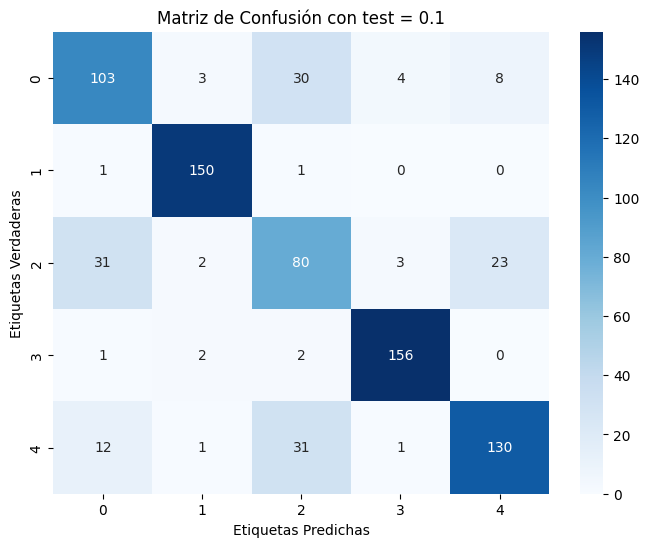

Exactitud del modelo: 0.7987096774193548
Precisión del modelo: 0.7986796244904235
Recall del modelo: 0.7987096774193548
Puntuación F1 del modelo: 0.7982709849011325
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.2.png


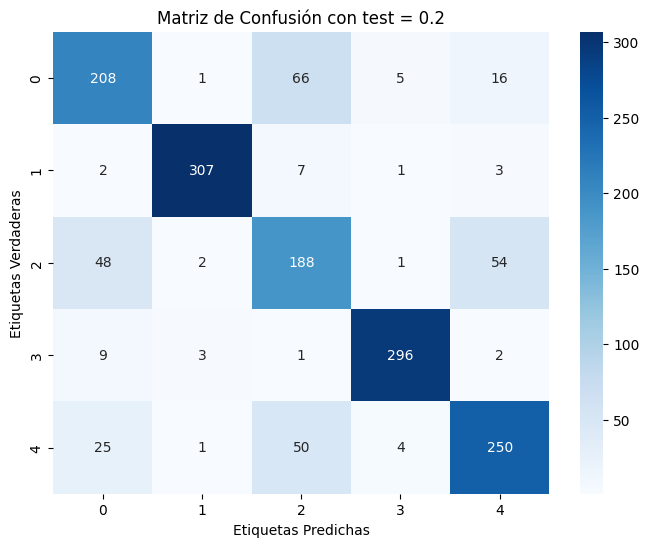

Exactitud del modelo: 0.8058064516129032
Precisión del modelo: 0.8090126906635972
Recall del modelo: 0.8058064516129032
Puntuación F1 del modelo: 0.8072519039243597
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.3.png


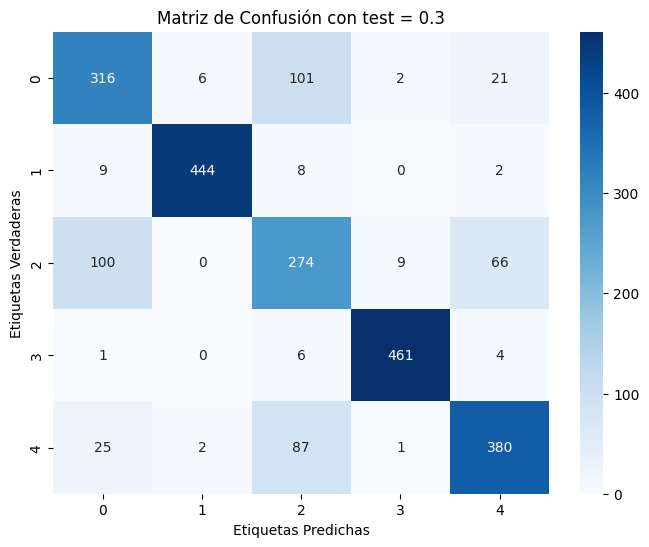

Exactitud del modelo: 0.8064516129032258
Precisión del modelo: 0.8100902174490108
Recall del modelo: 0.8064516129032258
Puntuación F1 del modelo: 0.8080546120644773
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.4.png


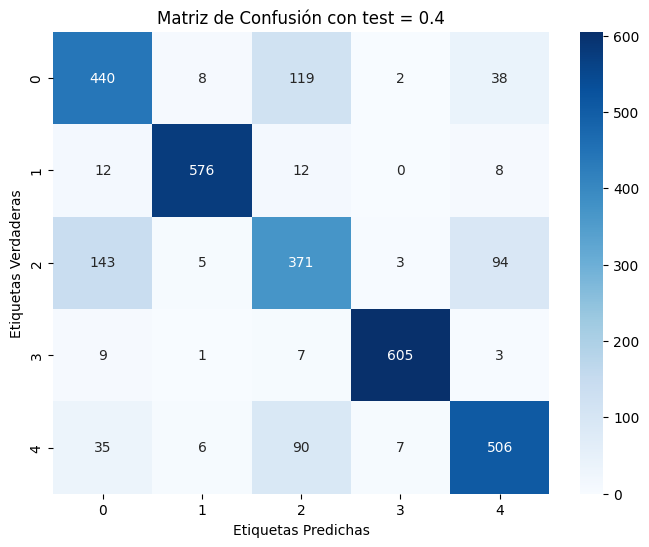

Exactitud del modelo: 0.8058064516129032
Precisión del modelo: 0.8071090984978426
Recall del modelo: 0.8058064516129032
Puntuación F1 del modelo: 0.8063135162341761
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.5.png


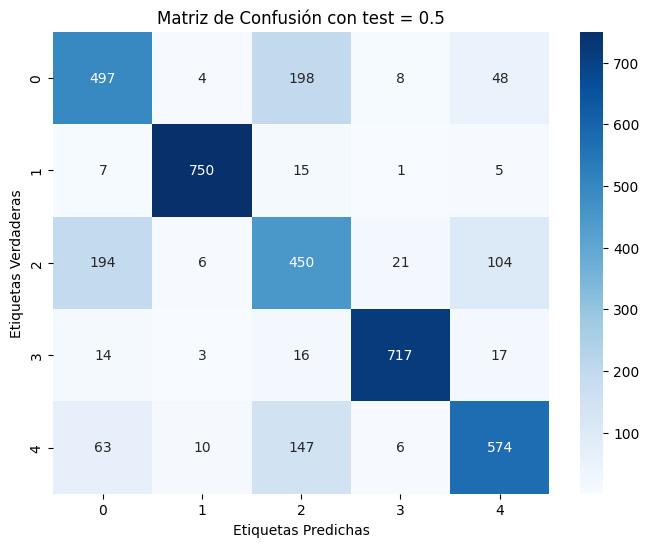

Exactitud del modelo: 0.7710967741935484
Precisión del modelo: 0.7756065392260073
Recall del modelo: 0.7710967741935484
Puntuación F1 del modelo: 0.7730249995623888
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.6.png


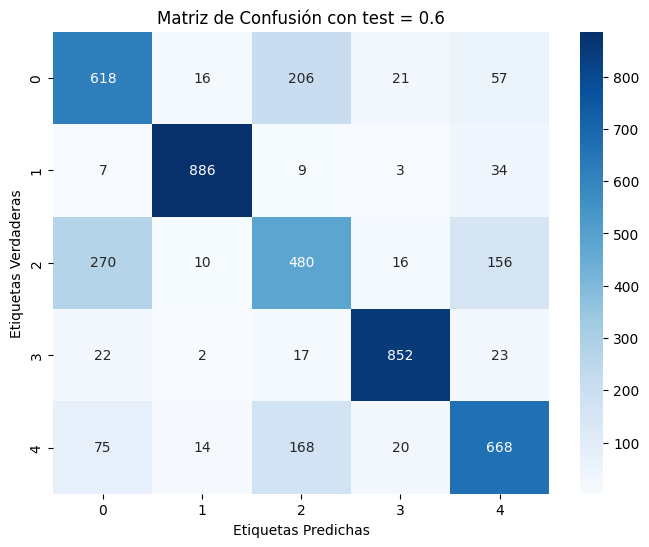

Exactitud del modelo: 0.7535483870967742
Precisión del modelo: 0.7538681509282937
Recall del modelo: 0.7535483870967742
Puntuación F1 del modelo: 0.753419166060205
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.7.png


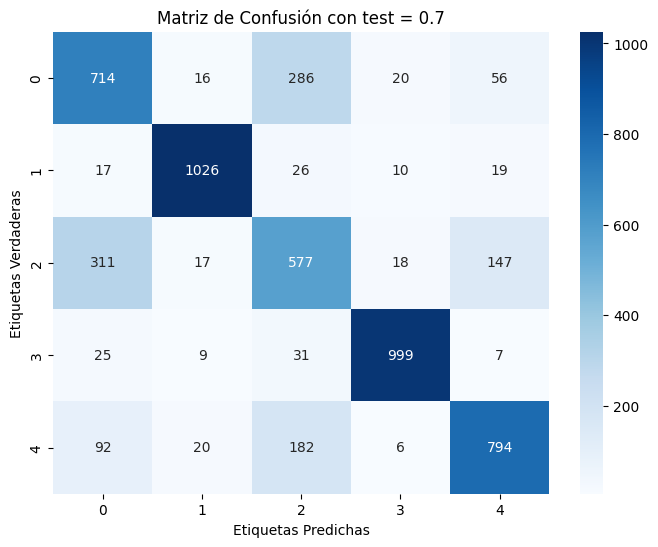

Exactitud del modelo: 0.7576036866359447
Precisión del modelo: 0.7619508555394024
Recall del modelo: 0.7576036866359447
Puntuación F1 del modelo: 0.7594536385631602
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.8.png


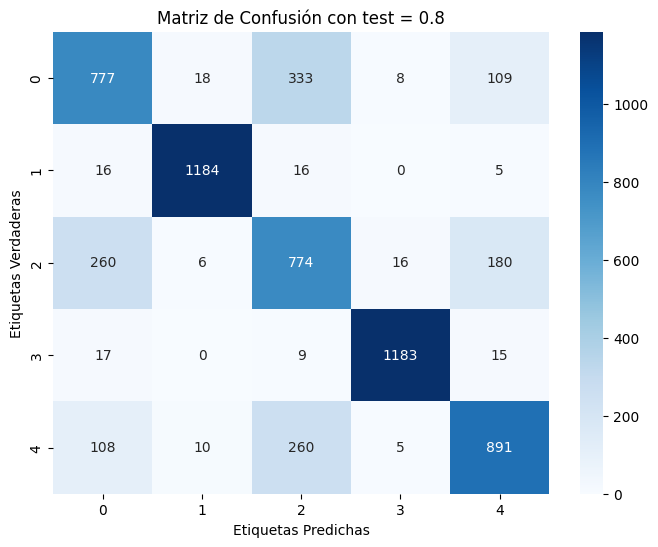

Exactitud del modelo: 0.7756451612903226
Precisión del modelo: 0.7800041044556583
Recall del modelo: 0.7756451612903226
Puntuación F1 del modelo: 0.7771733600030784
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.9.png


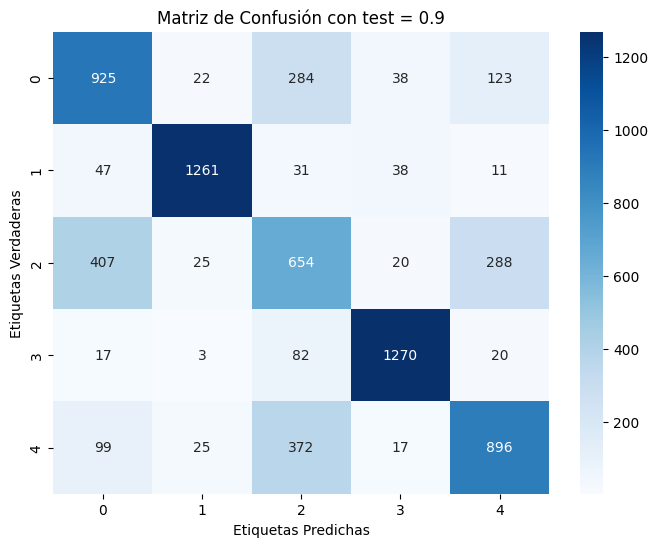

Exactitud del modelo: 0.7177060931899641
Precisión del modelo: 0.721696601282822
Recall del modelo: 0.7177060931899641
Puntuación F1 del modelo: 0.7193713471857806
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_1_estimators/random_forest_llava_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_cruz_1_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_2.png


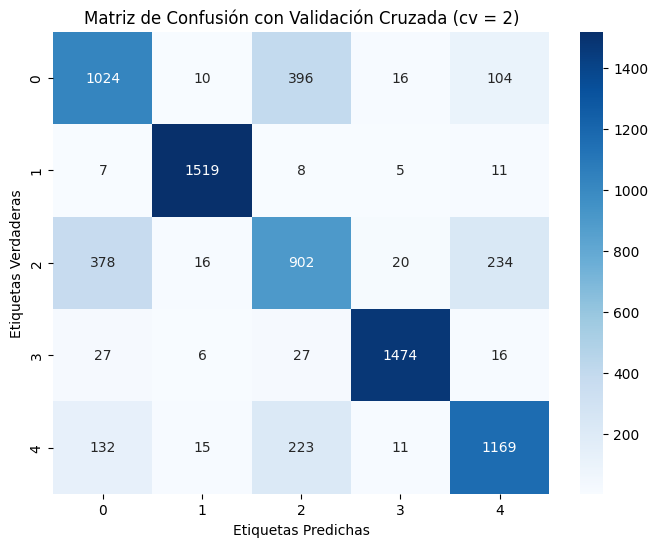

Exactitud media: 0.7855483870967742
Precisión media: 0.786144785600843
Recall media: 0.7855483870967742
Puntuación F1 media: 0.7858208828464215
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_3.png


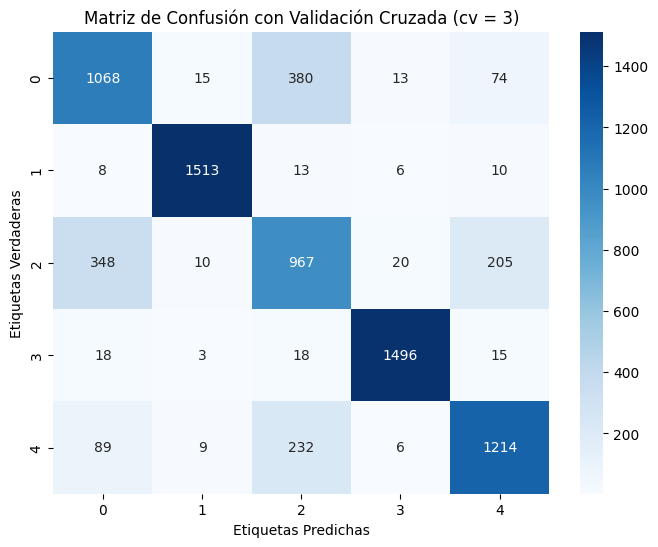

Exactitud media: 0.807483870967742
Precisión media: 0.8089736215119776
Recall media: 0.807483870967742
Puntuación F1 media: 0.8081604653474732
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_4.png


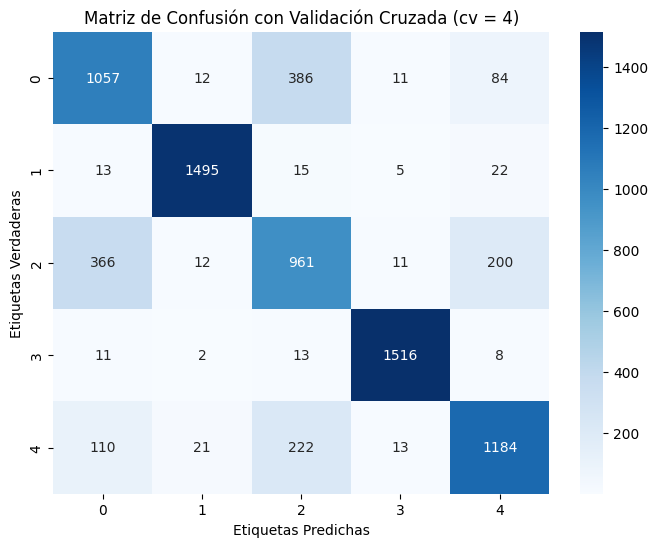

Exactitud media: 0.8016774193548387
Precisión media: 0.8029646508555829
Recall media: 0.8016774193548387
Puntuación F1 media: 0.8022458322898938
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_5.png


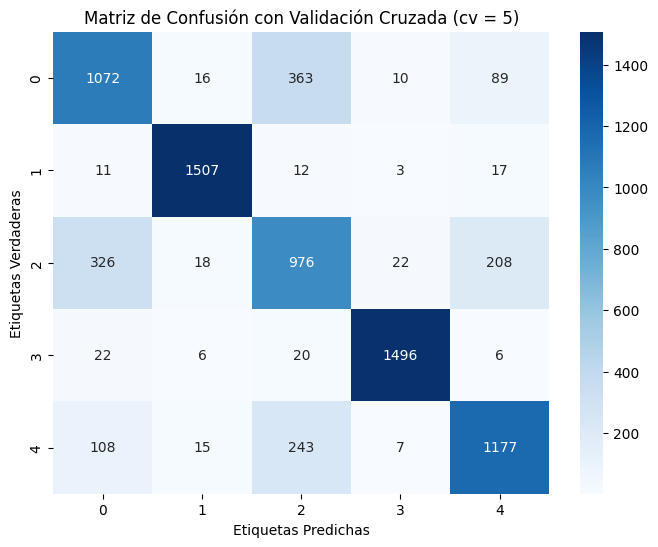

Exactitud media: 0.8036129032258065
Precisión media: 0.8049969376477384
Recall media: 0.8036129032258065
Puntuación F1 media: 0.8042000851272354
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_6.png


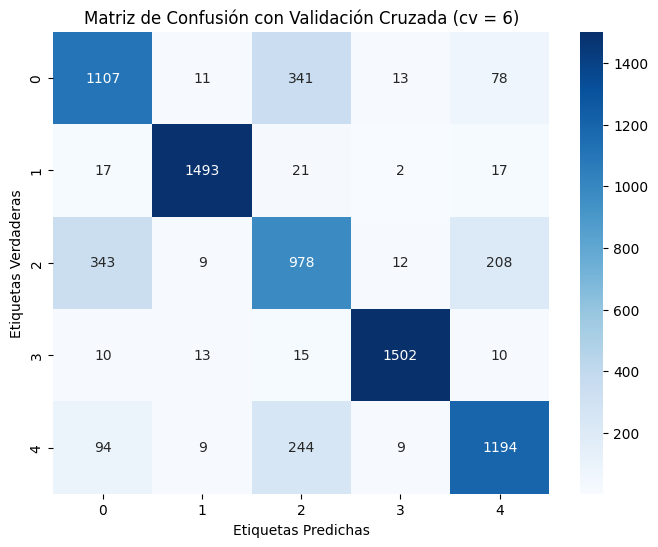

Exactitud media: 0.8095483870967742
Precisión media: 0.8115625988601124
Recall media: 0.8095483870967742
Puntuación F1 media: 0.8104805503403653
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_7.png


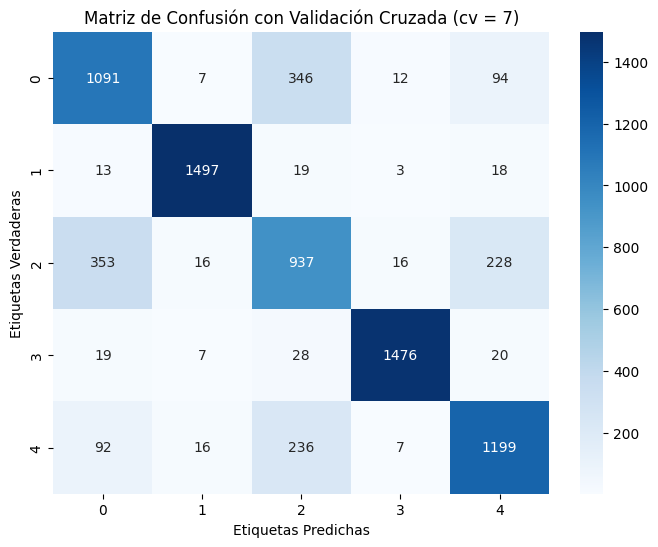

Exactitud media: 0.8
Precisión media: 0.8016604301937716
Recall media: 0.8
Puntuación F1 media: 0.8007934908102057
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_8.png


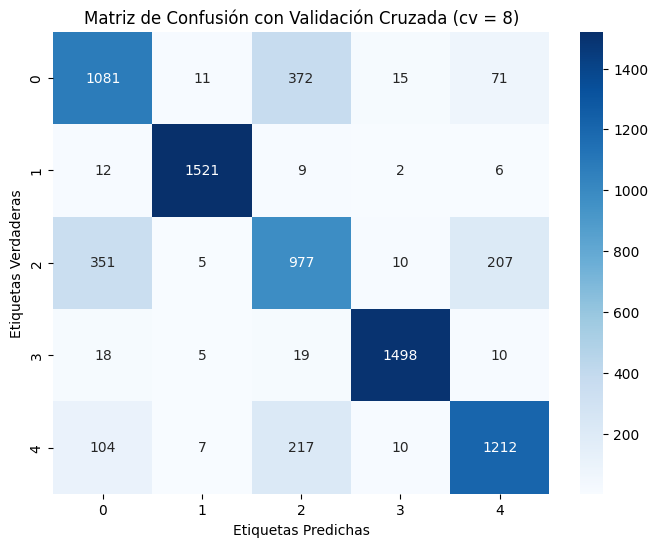

Exactitud media: 0.8114838709677419
Precisión media: 0.8131635337581888
Recall media: 0.8114838709677419
Puntuación F1 media: 0.8122581886079894
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_9.png


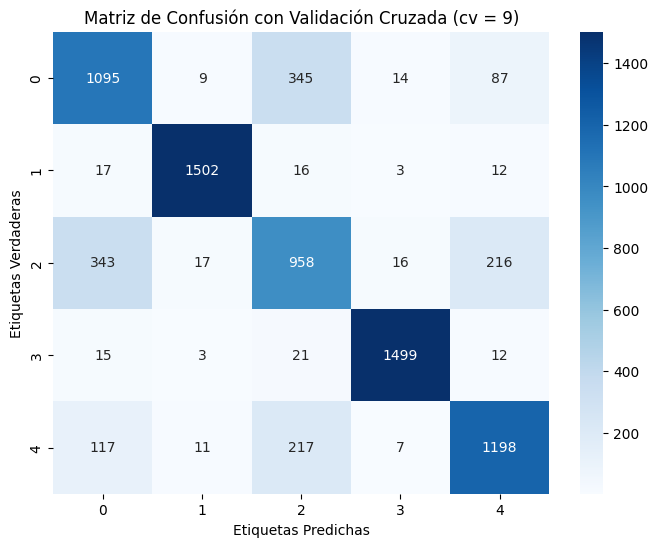

Exactitud media: 0.8067096774193548
Precisión media: 0.8077818865058204
Recall media: 0.8067096774193548
Puntuación F1 media: 0.8072116659304023
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_10.png


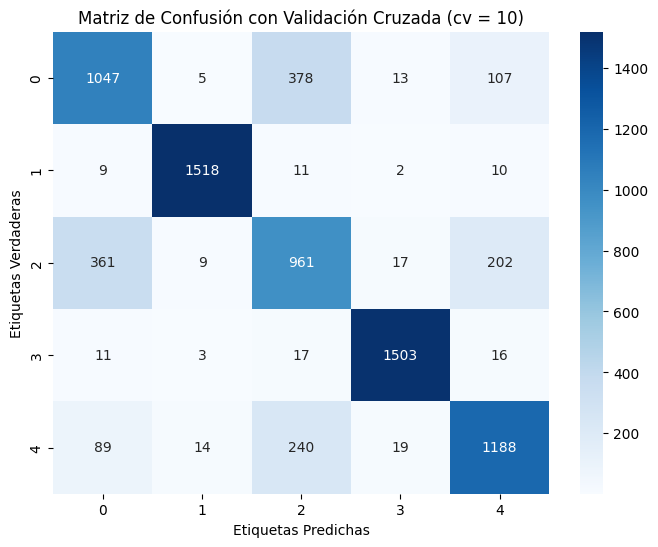

Exactitud media: 0.8021935483870968
Precisión media: 0.8030789292602245
Recall media: 0.8021935483870968
Puntuación F1 media: 0.8025684423288442
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_1_estimators/random_forest_llava_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_sim_2_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.1.png


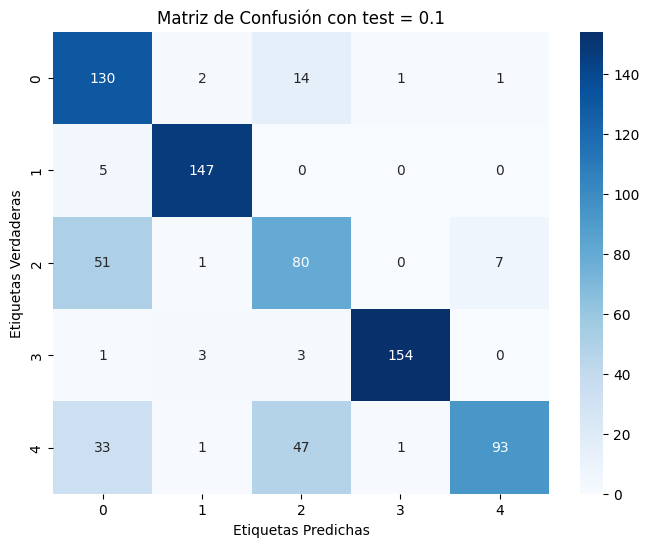

Exactitud del modelo: 0.7793548387096774
Precisión del modelo: 0.8126995975031747
Recall del modelo: 0.7793548387096774
Puntuación F1 del modelo: 0.7787804002663948
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.2.png


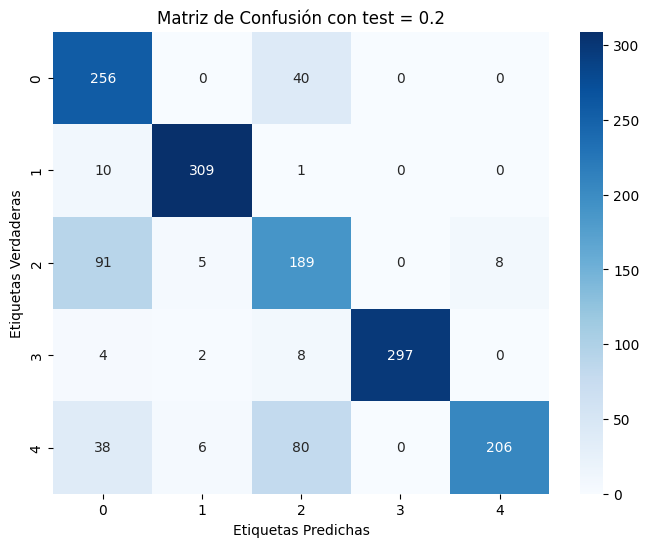

Exactitud del modelo: 0.8109677419354838
Precisión del modelo: 0.8385810278353968
Recall del modelo: 0.8109677419354838
Puntuación F1 del modelo: 0.8136321787015287
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.3.png


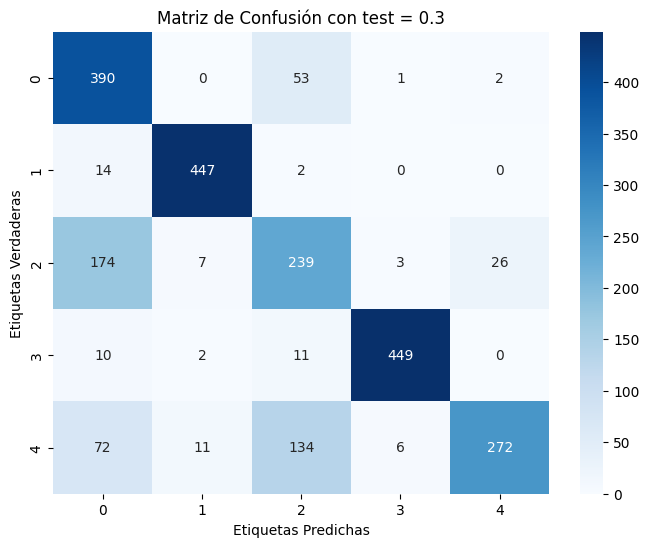

Exactitud del modelo: 0.7729032258064517
Precisión del modelo: 0.8007216033111384
Recall del modelo: 0.7729032258064517
Puntuación F1 del modelo: 0.7721696014403894
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.4.png


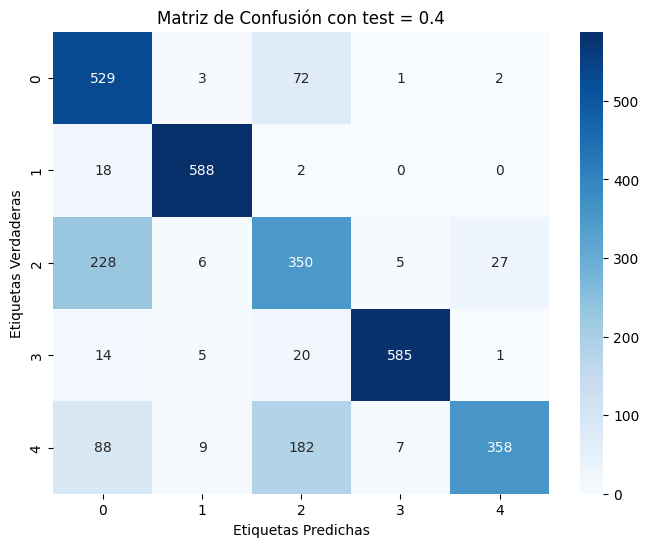

Exactitud del modelo: 0.7774193548387097
Precisión del modelo: 0.8068642176481349
Recall del modelo: 0.7774193548387097
Puntuación F1 del modelo: 0.7778094873626646
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.5.png


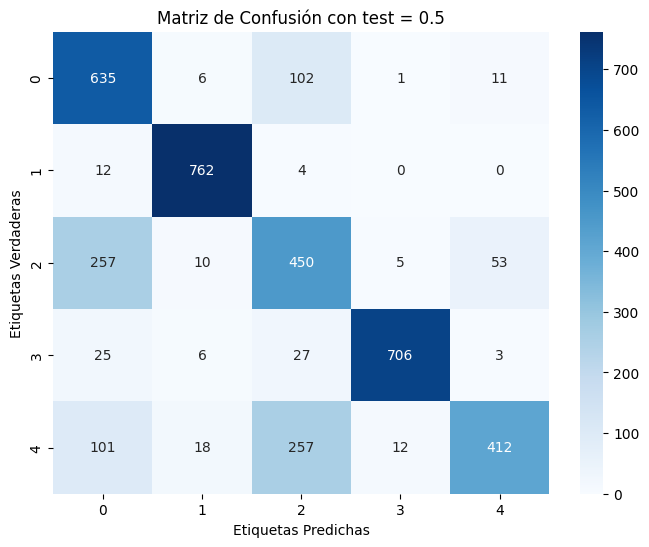

Exactitud del modelo: 0.7651612903225806
Precisión del modelo: 0.788611068891148
Recall del modelo: 0.7651612903225806
Puntuación F1 del modelo: 0.7641930889491871
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.6.png


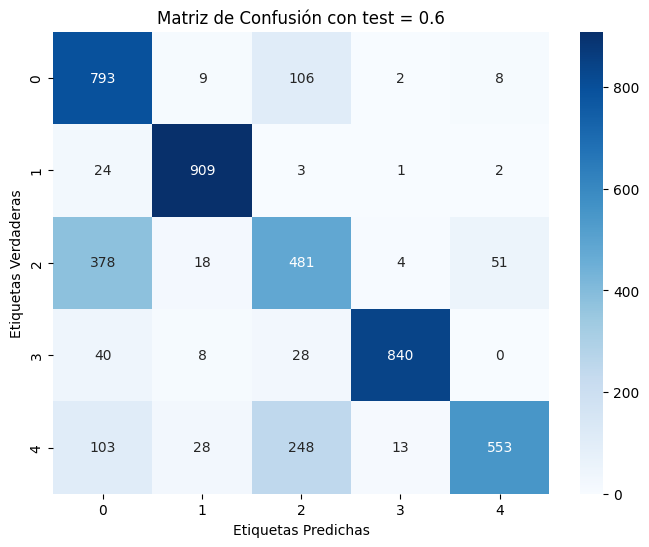

Exactitud del modelo: 0.7690322580645161
Precisión del modelo: 0.7926207807064134
Recall del modelo: 0.7690322580645161
Puntuación F1 del modelo: 0.7686501709288828
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.7.png


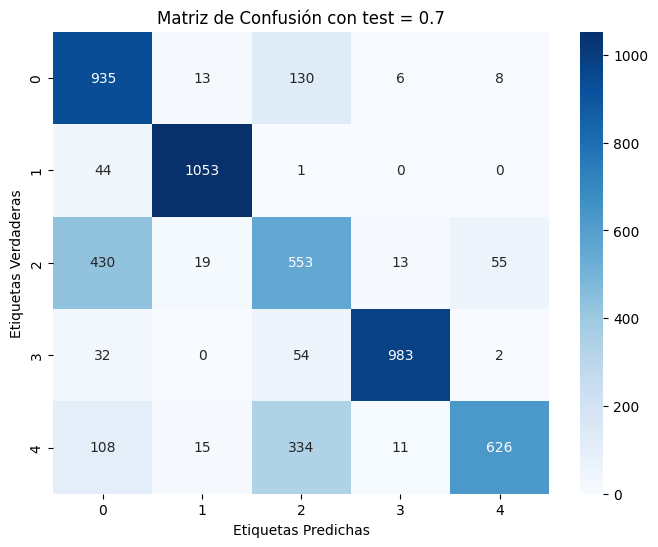

Exactitud del modelo: 0.7649769585253456
Precisión del modelo: 0.7912580787778516
Recall del modelo: 0.7649769585253456
Puntuación F1 del modelo: 0.7659765554314436
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.8.png


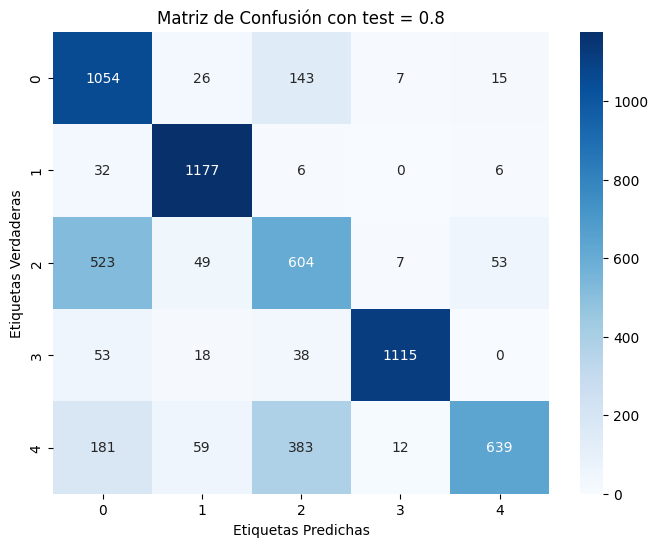

Exactitud del modelo: 0.7401612903225806
Precisión del modelo: 0.7688938385163755
Recall del modelo: 0.7401612903225806
Puntuación F1 del modelo: 0.7371165050336517
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.9.png


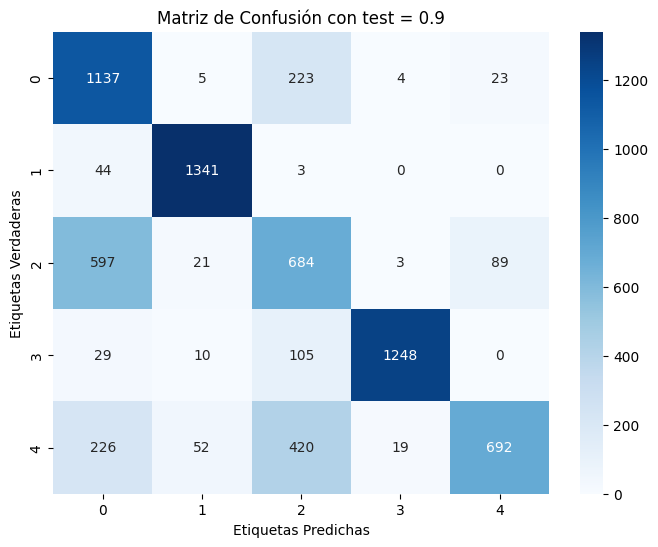

Exactitud del modelo: 0.7314695340501792
Precisión del modelo: 0.7629823448898575
Recall del modelo: 0.7314695340501792
Puntuación F1 del modelo: 0.7317843749328174
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_2_estimators/random_forest_llava_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_cruz_2_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_2.png


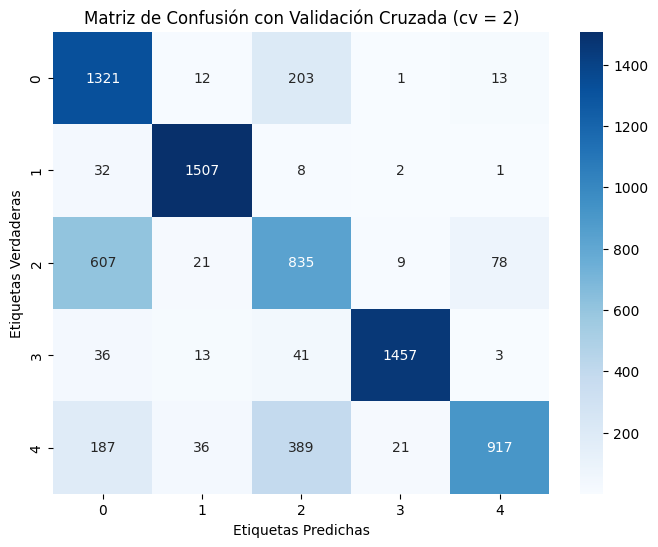

Exactitud media: 0.7789677419354839
Precisión media: 0.800644551957816
Recall media: 0.7789677419354839
Puntuación F1 media: 0.7788406928709326
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_3.png


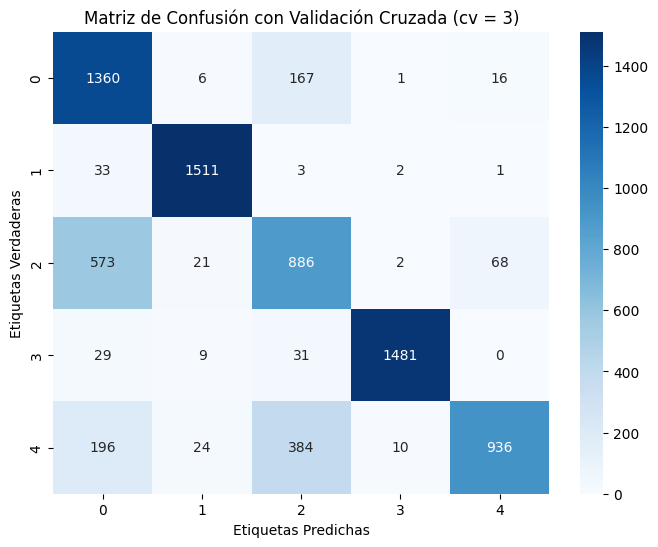

Exactitud media: 0.7966451612903226
Precisión media: 0.8183123597009913
Recall media: 0.7966451612903226
Puntuación F1 media: 0.7964925327215118
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_4.png


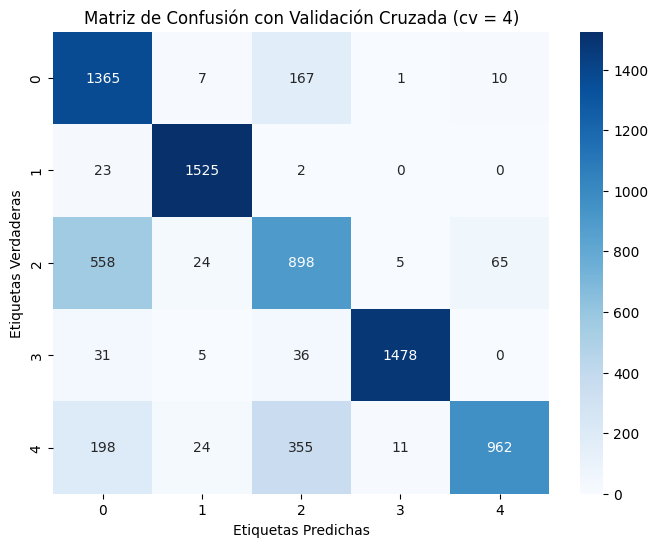

Exactitud media: 0.8036129032258065
Precisión media: 0.8243896553562823
Recall media: 0.8036129032258065
Puntuación F1 media: 0.8034674972858598
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_5.png


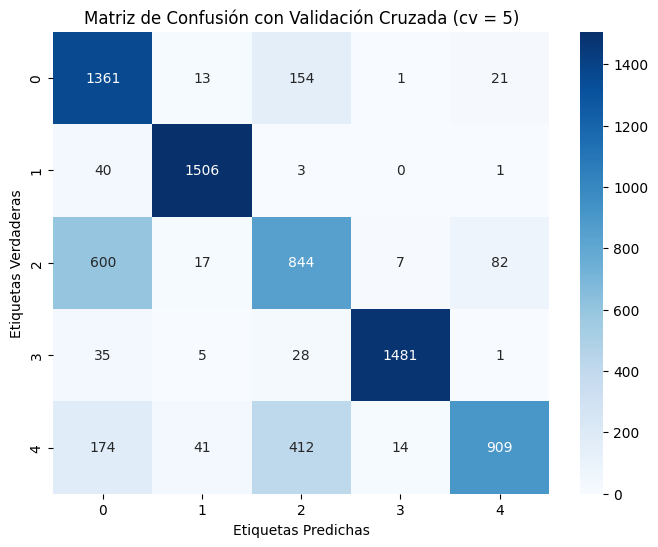

Exactitud media: 0.7872258064516129
Precisión media: 0.8070626666350642
Recall media: 0.7872258064516129
Puntuación F1 media: 0.7858446708689798
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_6.png


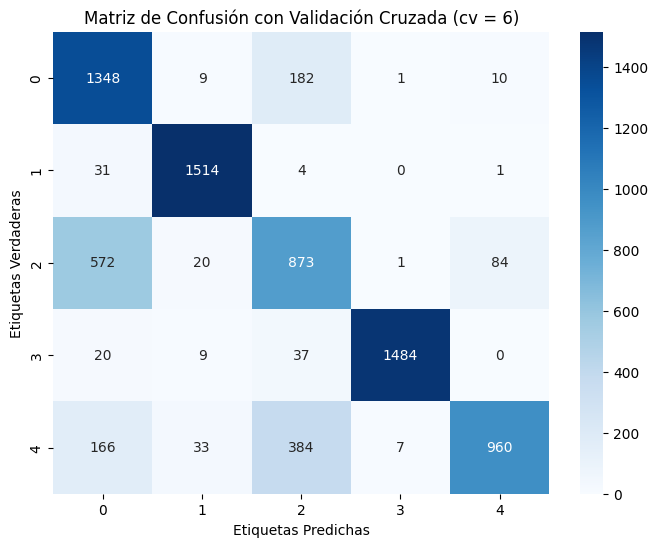

Exactitud media: 0.7972903225806451
Precisión media: 0.8159570431606332
Recall media: 0.7972903225806451
Puntuación F1 media: 0.79714441003581
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_7.png


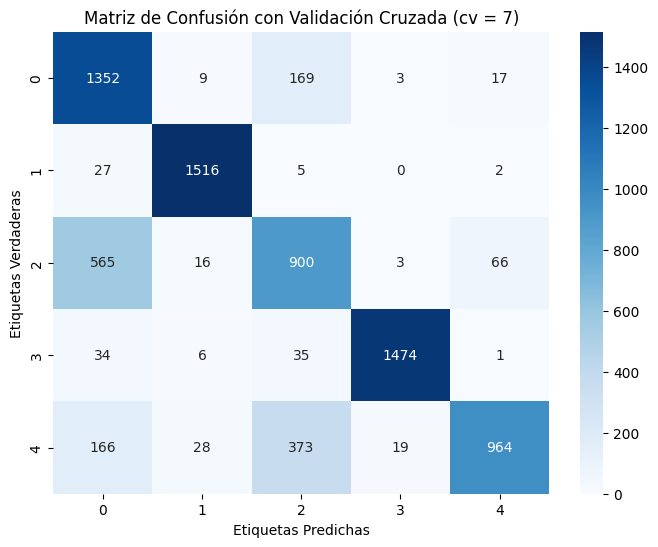

Exactitud media: 0.8007741935483871
Precisión media: 0.8203683199525759
Recall media: 0.8007741935483871
Puntuación F1 media: 0.800863645416563
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_8.png


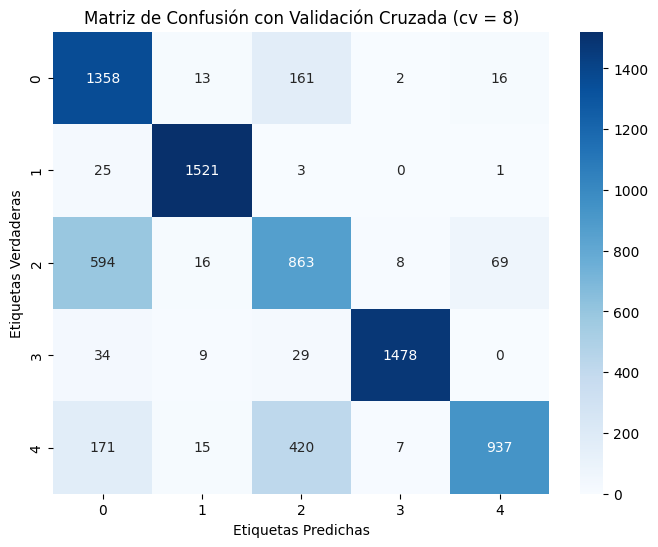

Exactitud media: 0.7944516129032259
Precisión media: 0.8155886536773972
Recall media: 0.7944516129032259
Puntuación F1 media: 0.7942011822122492
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_9.png


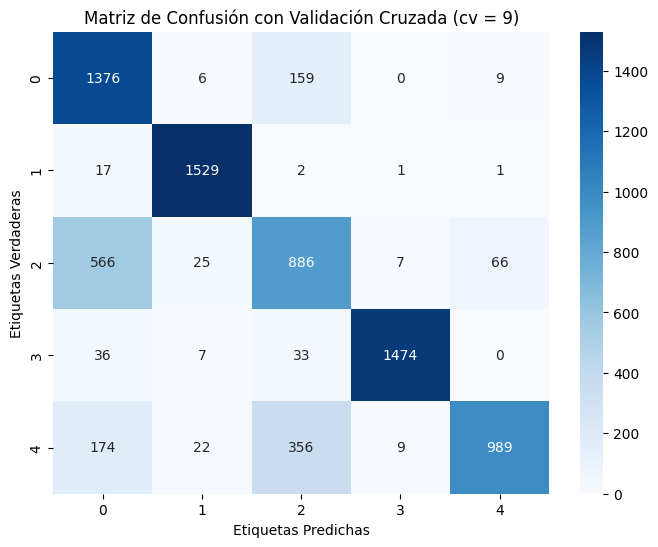

Exactitud media: 0.8069677419354838
Precisión media: 0.8261725059817925
Recall media: 0.8069677419354838
Puntuación F1 media: 0.8066877627008284
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_10.png


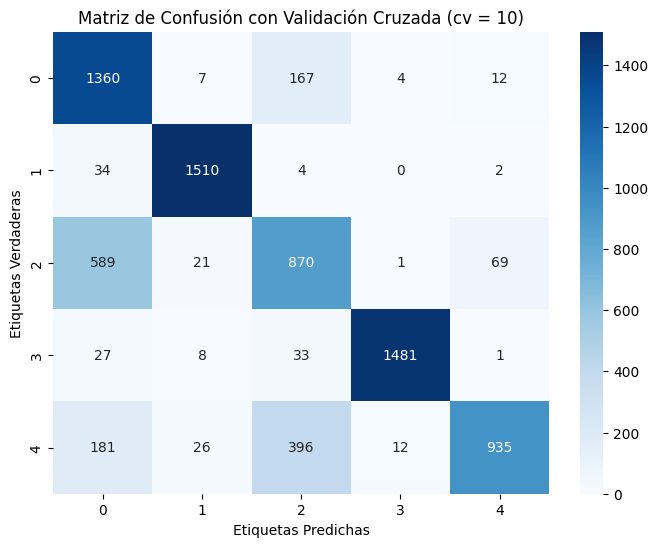

Exactitud media: 0.7943225806451613
Precisión media: 0.815867087965687
Recall media: 0.7943225806451613
Puntuación F1 media: 0.7940520733164244
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_2_estimators/random_forest_llava_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_sim_3_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.1.png


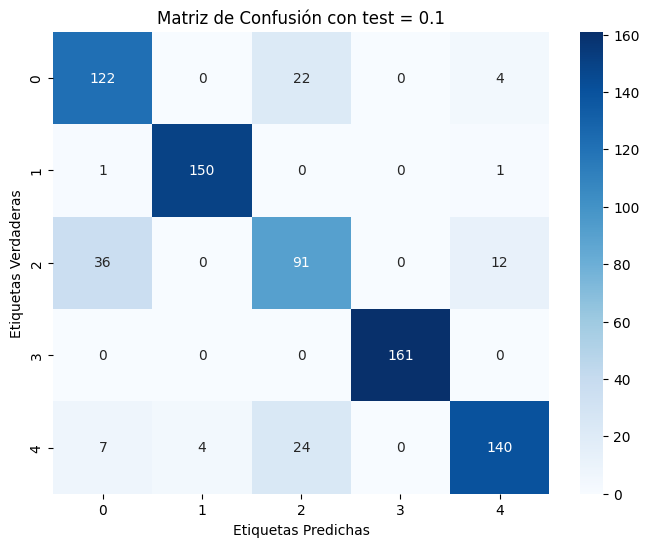

Exactitud del modelo: 0.8567741935483871
Precisión del modelo: 0.8596160709117352
Recall del modelo: 0.8567741935483871
Puntuación F1 del modelo: 0.857130011620035
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.2.png


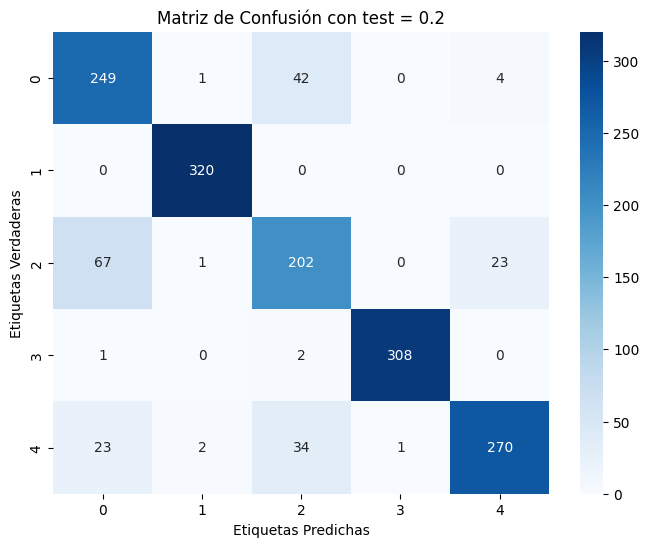

Exactitud del modelo: 0.8703225806451613
Precisión del modelo: 0.8736760982199656
Recall del modelo: 0.8703225806451613
Puntuación F1 del modelo: 0.8706922445173897
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.3.png


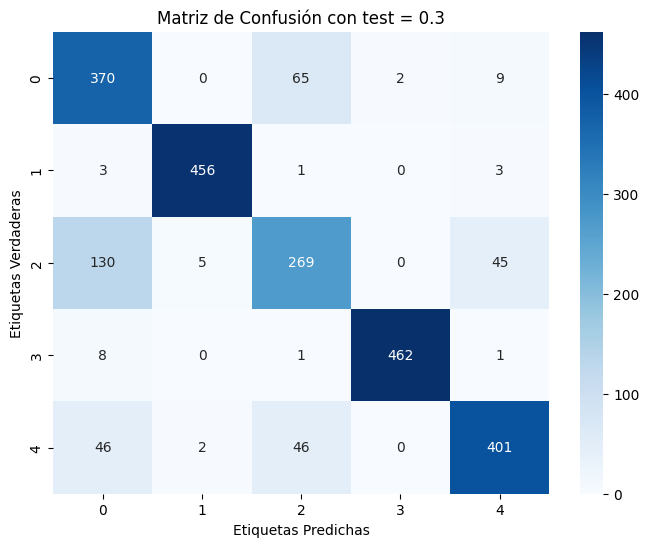

Exactitud del modelo: 0.8421505376344086
Precisión del modelo: 0.8476829398116049
Recall del modelo: 0.8421505376344086
Puntuación F1 del modelo: 0.8420739622419249
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.4.png


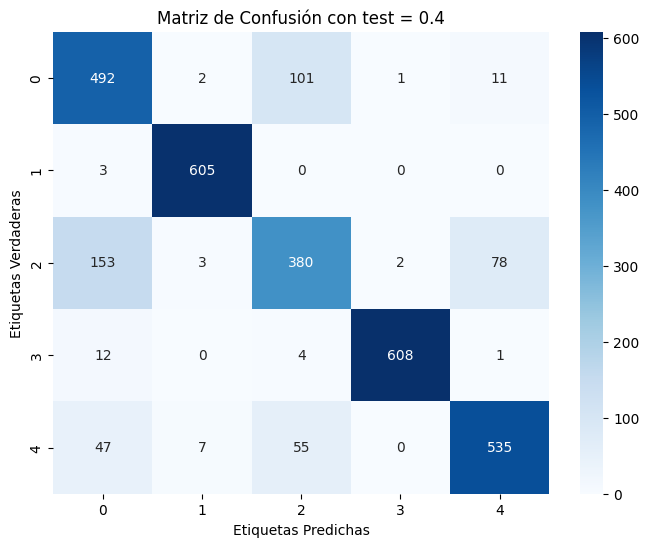

Exactitud del modelo: 0.8451612903225807
Precisión del modelo: 0.8468586987434785
Recall del modelo: 0.8451612903225807
Puntuación F1 del modelo: 0.8445135013892744
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.5.png


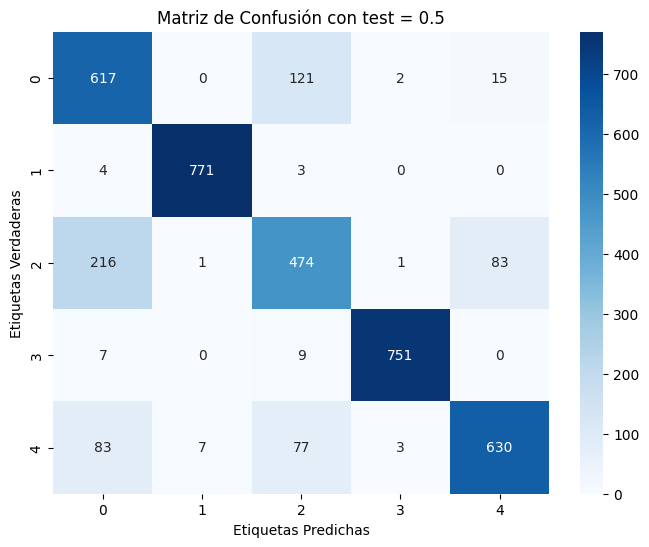

Exactitud del modelo: 0.8369032258064516
Precisión del modelo: 0.8420178021307009
Recall del modelo: 0.8369032258064516
Puntuación F1 del modelo: 0.837055135884215
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.6.png


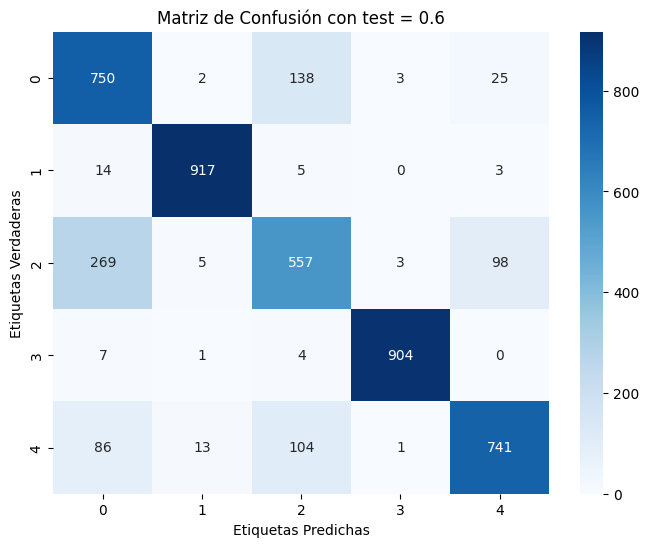

Exactitud del modelo: 0.8320430107526882
Precisión del modelo: 0.8362452115329835
Recall del modelo: 0.8320430107526882
Puntuación F1 del modelo: 0.831663056167399
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.7.png


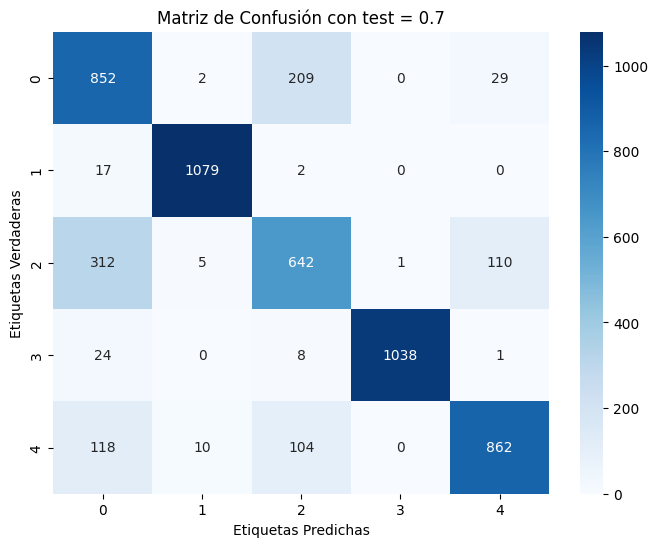

Exactitud del modelo: 0.824516129032258
Precisión del modelo: 0.8308160194208054
Recall del modelo: 0.824516129032258
Puntuación F1 del modelo: 0.8256573833220769
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.8.png


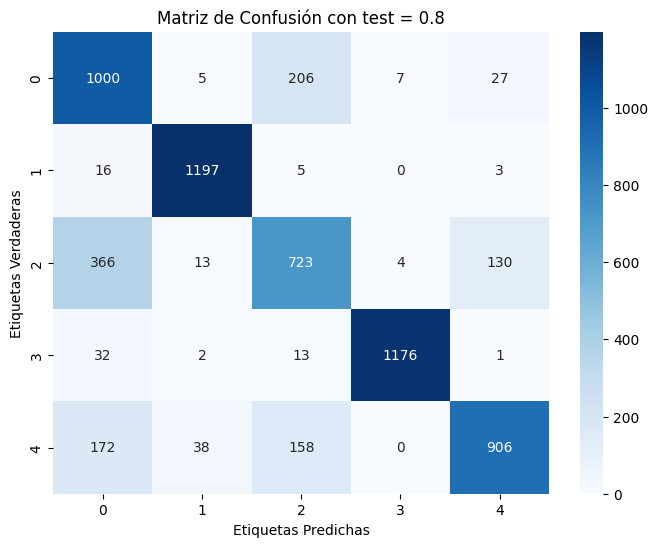

Exactitud del modelo: 0.8067741935483871
Precisión del modelo: 0.814951765927243
Recall del modelo: 0.8067741935483871
Puntuación F1 del modelo: 0.8070529709989014
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.9.png


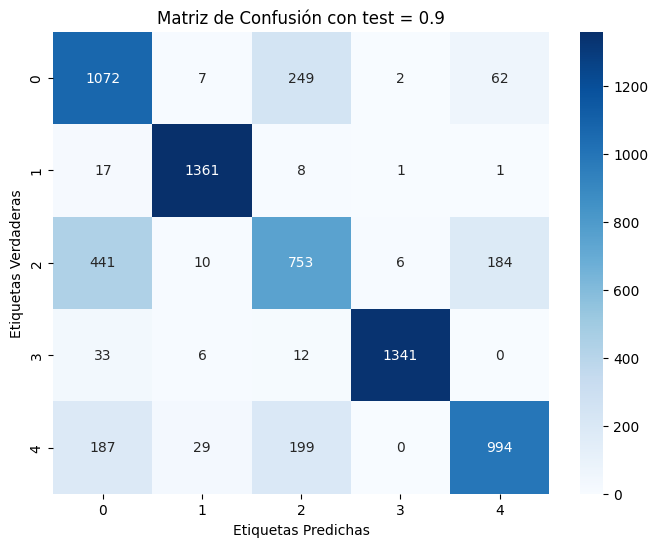

Exactitud del modelo: 0.7915412186379929
Precisión del modelo: 0.7972175375208314
Recall del modelo: 0.7915412186379929
Puntuación F1 del modelo: 0.7914094748224538
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_3_estimators/random_forest_llava_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_cruz_3_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_2.png


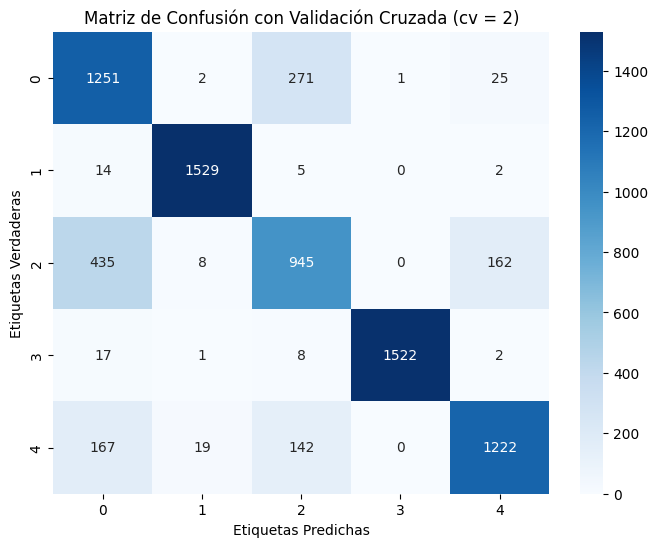

Exactitud media: 0.8347096774193549
Precisión media: 0.839643508974853
Recall media: 0.8347096774193549
Puntuación F1 media: 0.8349267486598959
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_3.png


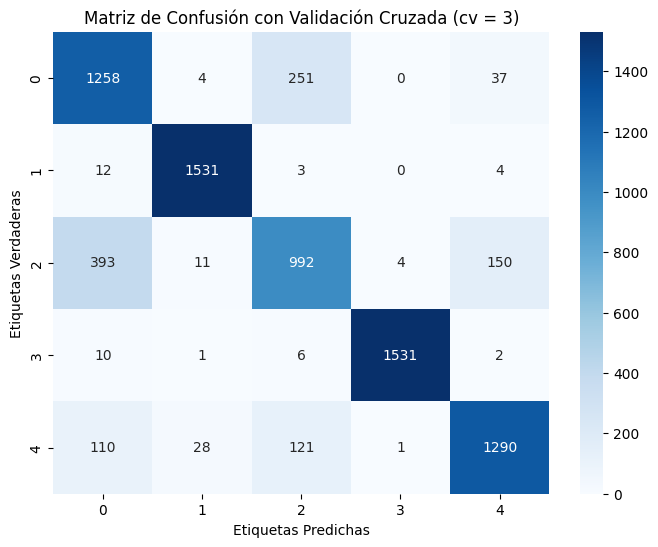

Exactitud media: 0.8518709677419355
Precisión media: 0.8533449162148775
Recall media: 0.8518709677419355
Puntuación F1 media: 0.8512672123468668
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_4.png


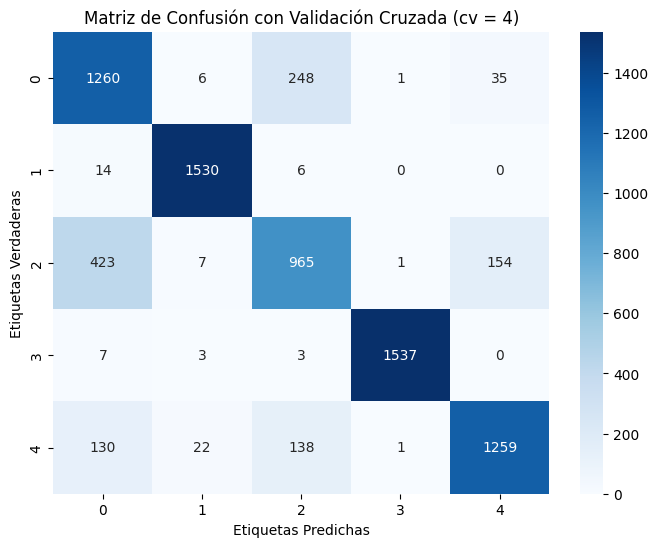

Exactitud media: 0.8452903225806452
Precisión media: 0.847974823317743
Recall media: 0.8452903225806452
Puntuación F1 media: 0.8448049385050411
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_5.png


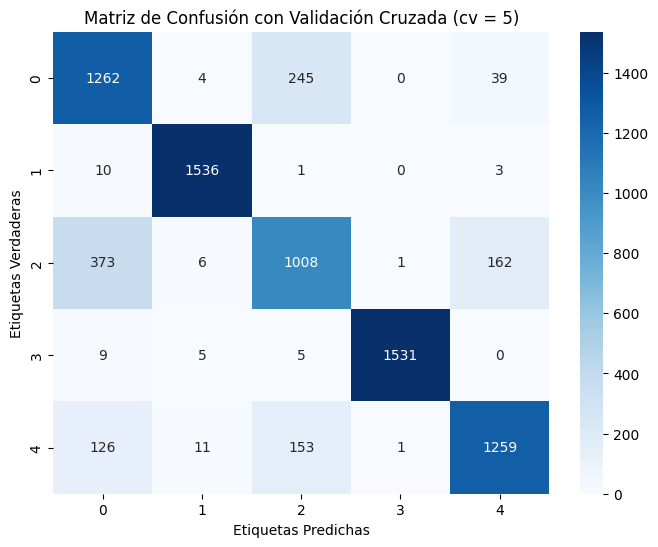

Exactitud media: 0.8510967741935483
Precisión media: 0.8530960636136625
Recall media: 0.8510967741935483
Puntuación F1 media: 0.8509252114504224
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_6.png


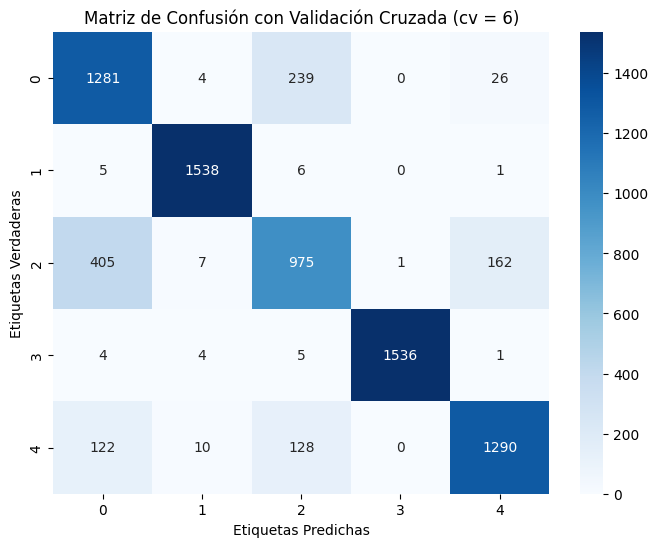

Exactitud media: 0.8541935483870968
Precisión media: 0.8561210439669226
Recall media: 0.8541935483870968
Puntuación F1 media: 0.8534748187095719
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_7.png


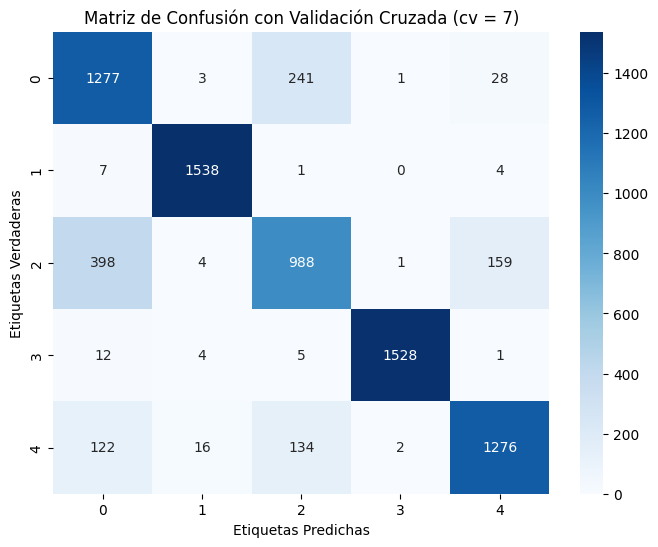

Exactitud media: 0.852516129032258
Precisión media: 0.8548469894560924
Recall media: 0.852516129032258
Puntuación F1 media: 0.852069046801941
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_8.png


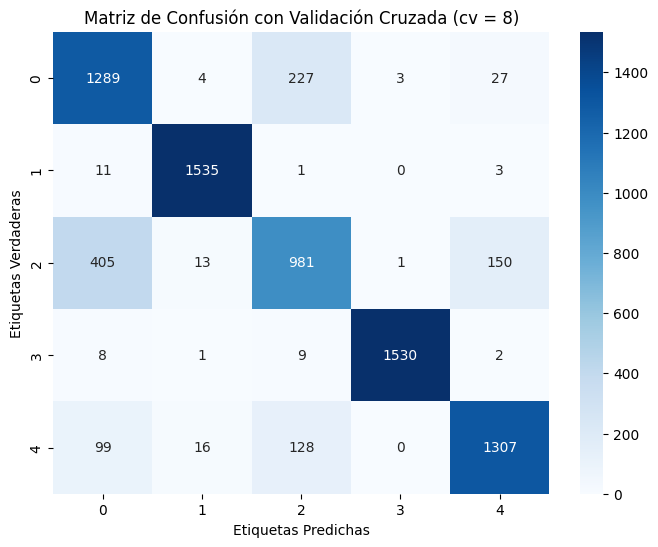

Exactitud media: 0.8570322580645161
Precisión media: 0.8587375410580972
Recall media: 0.8570322580645161
Puntuación F1 media: 0.8561901523355206
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_9.png


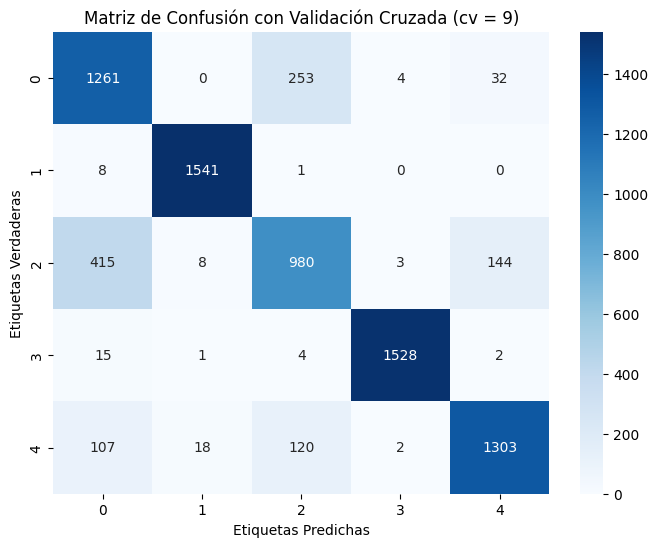

Exactitud media: 0.8532903225806452
Precisión media: 0.8553227202024103
Recall media: 0.8532903225806452
Puntuación F1 media: 0.8527373790380413
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_10.png


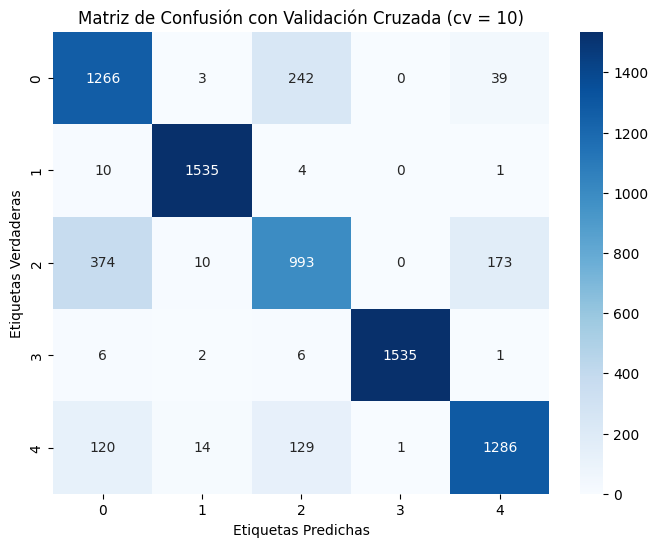

Exactitud media: 0.8535483870967742
Precisión media: 0.8547370707193599
Recall media: 0.8535483870967742
Puntuación F1 media: 0.8528891235298255
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_3_estimators/random_forest_llava_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_sim_4_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.1.png


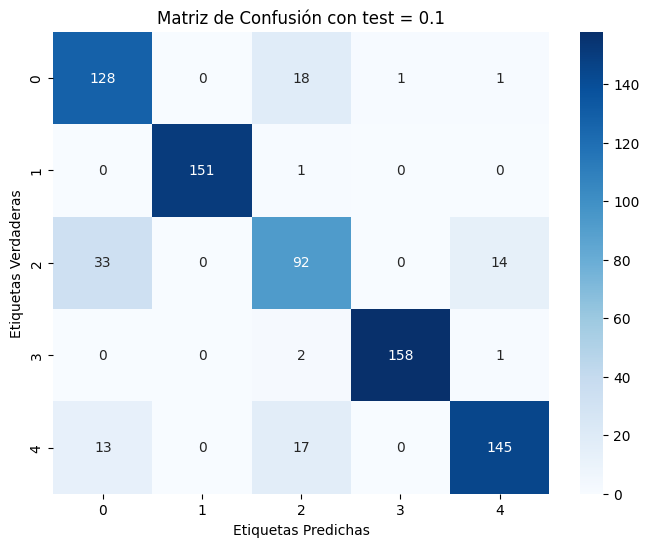

Exactitud del modelo: 0.8696774193548387
Precisión del modelo: 0.8733405303528299
Recall del modelo: 0.8696774193548387
Puntuación F1 del modelo: 0.8700260383089552
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.2.png


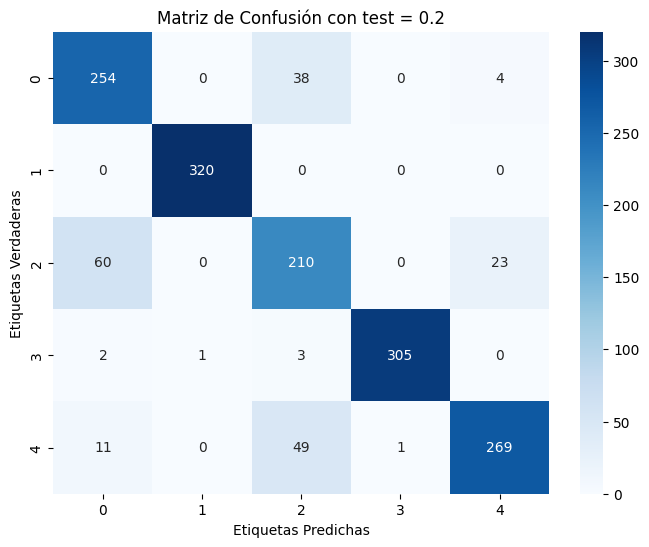

Exactitud del modelo: 0.8761290322580645
Precisión del modelo: 0.8799392989295493
Recall del modelo: 0.8761290322580645
Puntuación F1 del modelo: 0.8770741132791074
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.3.png


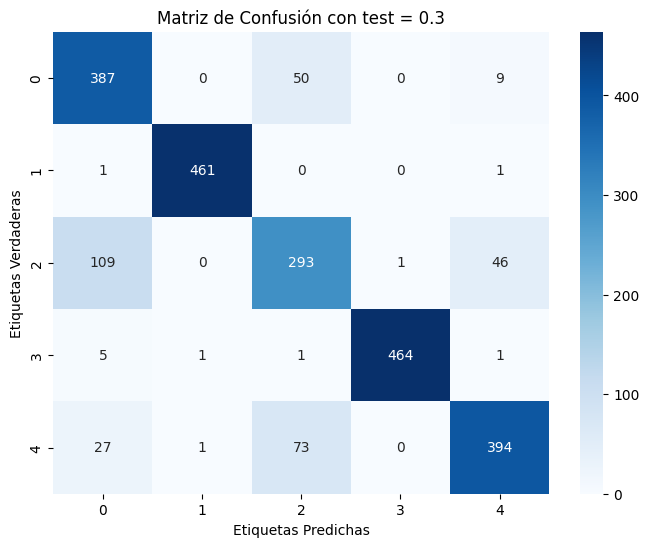

Exactitud del modelo: 0.8597849462365591
Precisión del modelo: 0.862876626345689
Recall del modelo: 0.8597849462365591
Puntuación F1 del modelo: 0.8596447905030142
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.4.png


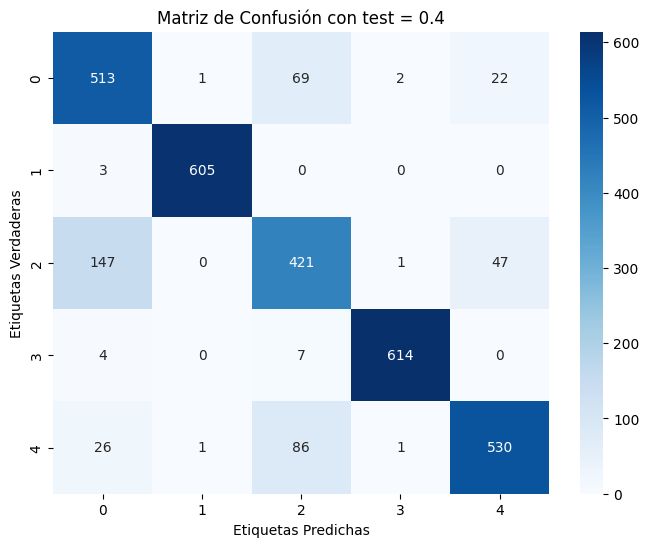

Exactitud del modelo: 0.8654838709677419
Precisión del modelo: 0.8680437449295574
Recall del modelo: 0.8654838709677419
Puntuación F1 del modelo: 0.8657398027313216
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.5.png


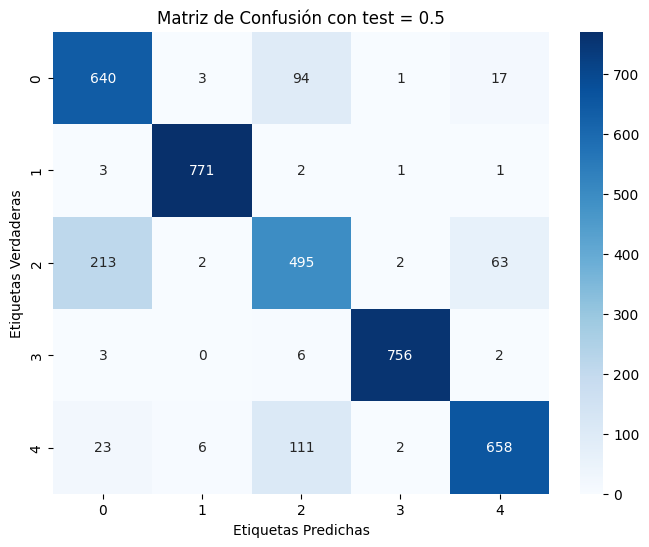

Exactitud del modelo: 0.8567741935483871
Precisión del modelo: 0.8588638152920004
Recall del modelo: 0.8567741935483871
Puntuación F1 del modelo: 0.8563612034463186
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.6.png


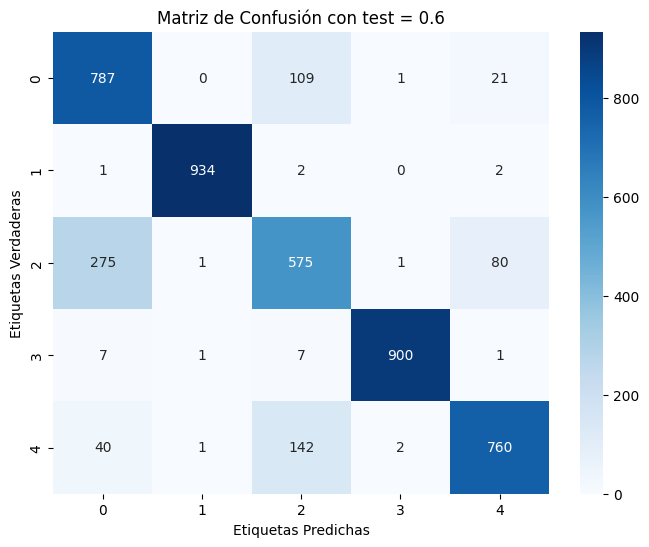

Exactitud del modelo: 0.850752688172043
Precisión del modelo: 0.854162833697981
Recall del modelo: 0.850752688172043
Puntuación F1 del modelo: 0.8503259302457797
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.7.png


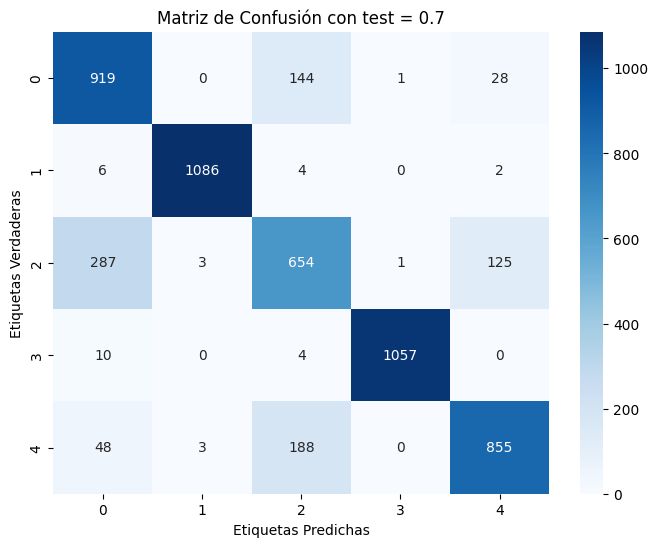

Exactitud del modelo: 0.8425806451612903
Precisión del modelo: 0.8444705217887601
Recall del modelo: 0.8425806451612903
Puntuación F1 del modelo: 0.8421918770295495
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.8.png


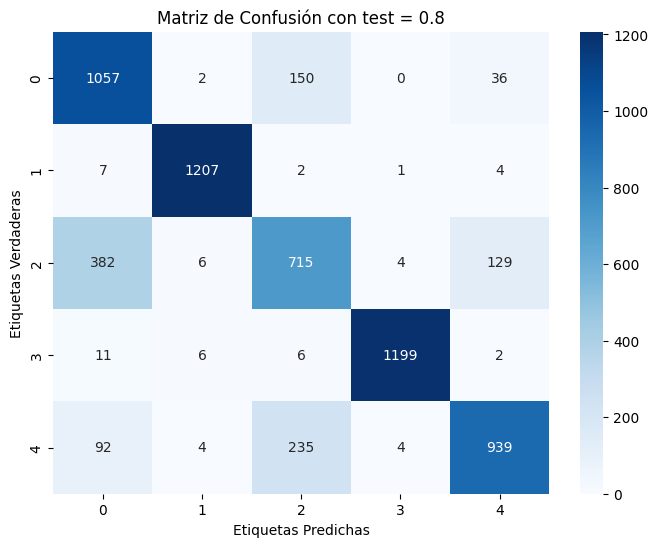

Exactitud del modelo: 0.8253225806451613
Precisión del modelo: 0.8294889939577517
Recall del modelo: 0.8253225806451613
Puntuación F1 del modelo: 0.8244432075597438
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.9.png


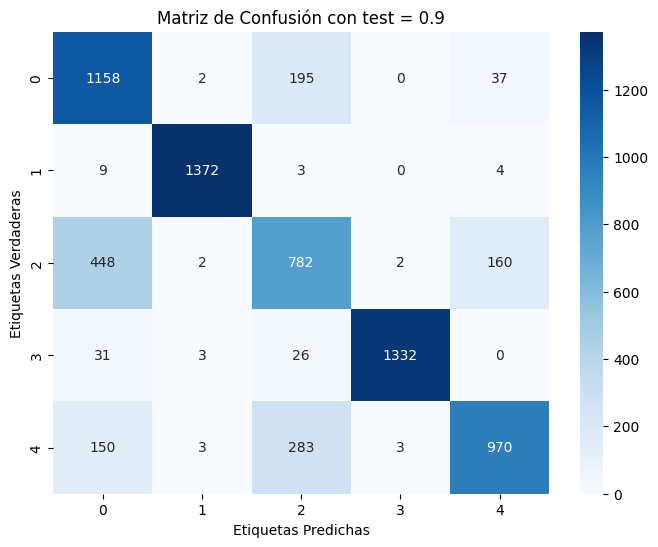

Exactitud del modelo: 0.8048745519713262
Precisión del modelo: 0.8136363665864087
Recall del modelo: 0.8048745519713262
Puntuación F1 del modelo: 0.8053266604912691
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_4_estimators/random_forest_llava_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_cruz_4_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_2.png


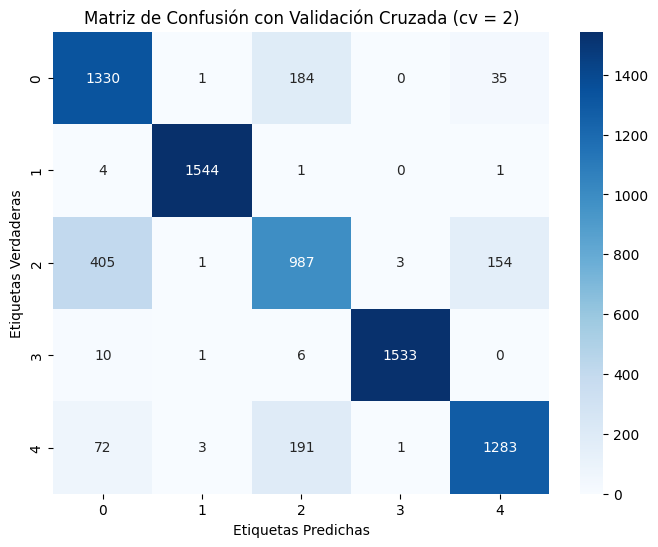

Exactitud media: 0.8615483870967742
Precisión media: 0.8631740476283237
Recall media: 0.8615483870967742
Puntuación F1 media: 0.8606988663787495
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_3.png


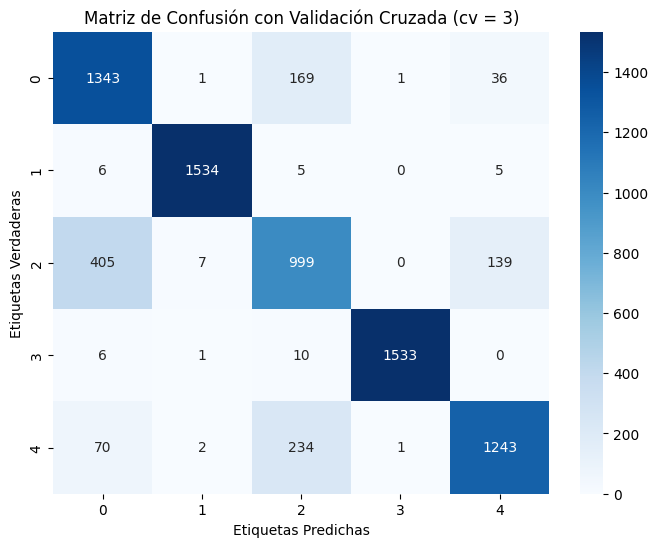

Exactitud media: 0.8583225806451613
Precisión media: 0.8607948741010846
Recall media: 0.8583225806451613
Puntuación F1 media: 0.8578783711450957
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_4.png


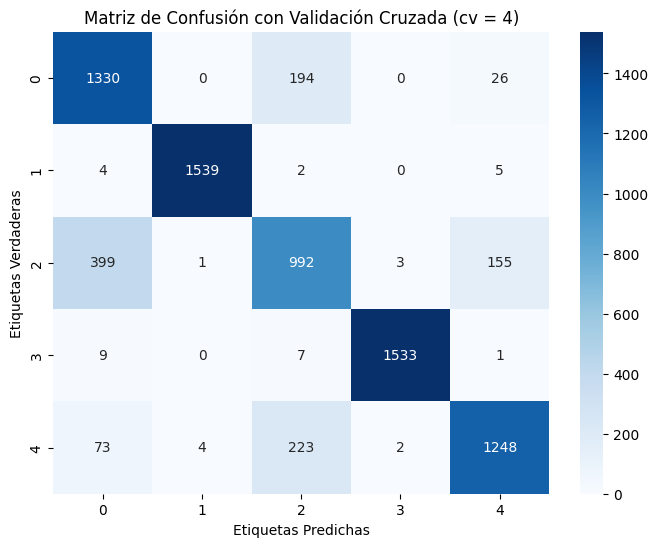

Exactitud media: 0.8570322580645161
Precisión media: 0.8591112663727338
Recall media: 0.8570322580645161
Puntuación F1 media: 0.8565678413030484
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_5.png


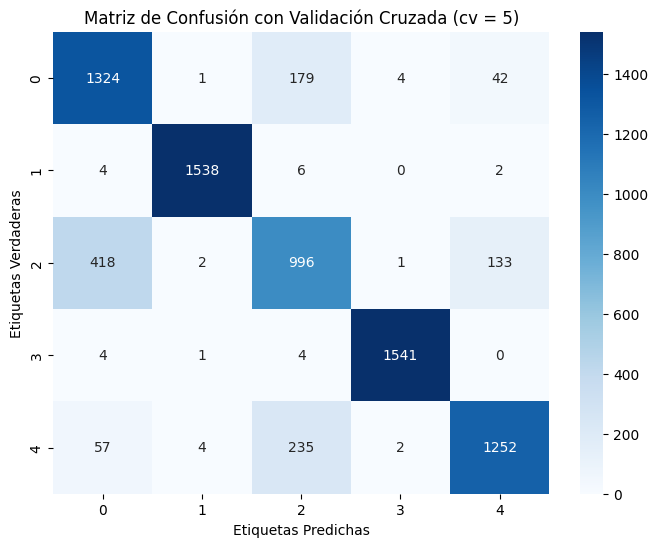

Exactitud media: 0.8581935483870968
Precisión media: 0.8601110288534314
Recall media: 0.8581935483870968
Puntuación F1 media: 0.8576865087484935
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_6.png


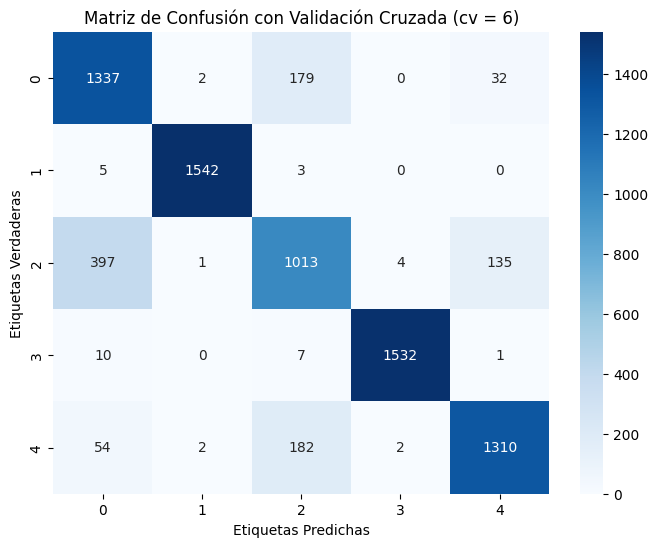

Exactitud media: 0.8689032258064516
Precisión media: 0.8705355881409944
Recall media: 0.8689032258064516
Puntuación F1 media: 0.8682615251917507
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_7.png


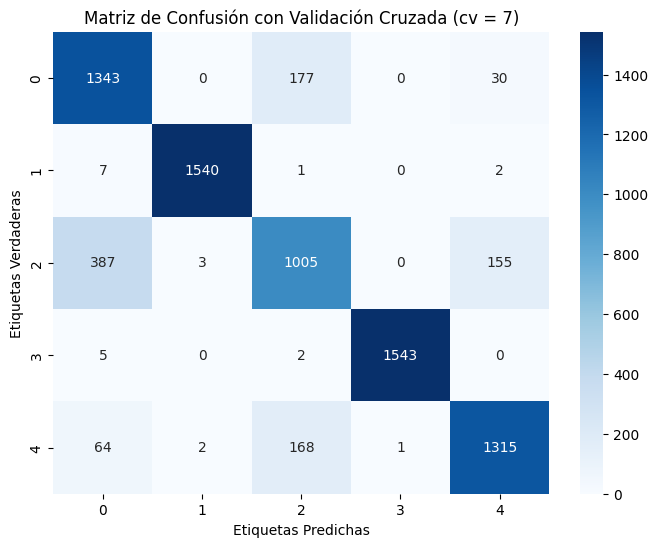

Exactitud media: 0.8704516129032258
Precisión media: 0.871608309620487
Recall media: 0.8704516129032258
Puntuación F1 media: 0.8694085182019512
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_8.png


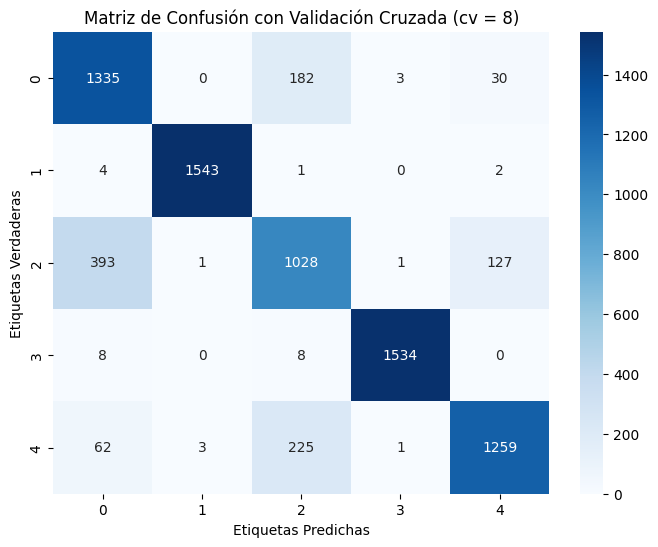

Exactitud media: 0.8643870967741936
Precisión media: 0.8669581183573596
Recall media: 0.8643870967741936
Puntuación F1 media: 0.8642557469349231
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_9.png


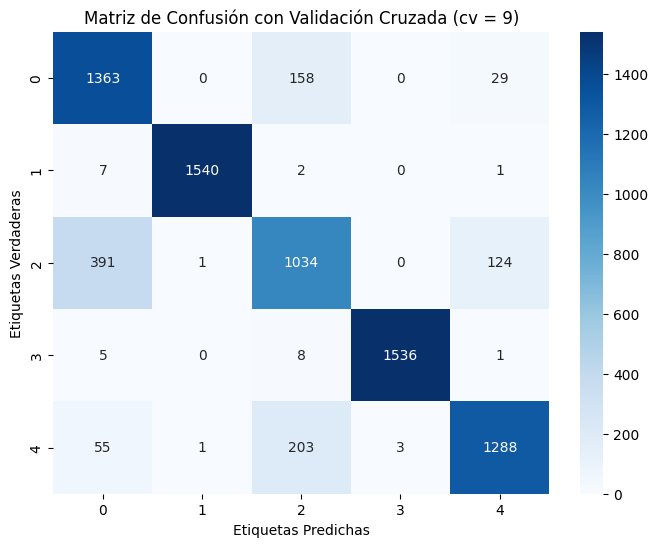

Exactitud media: 0.8723870967741936
Precisión media: 0.874754291845989
Recall media: 0.8723870967741936
Puntuación F1 media: 0.8719566878212714
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_10.png


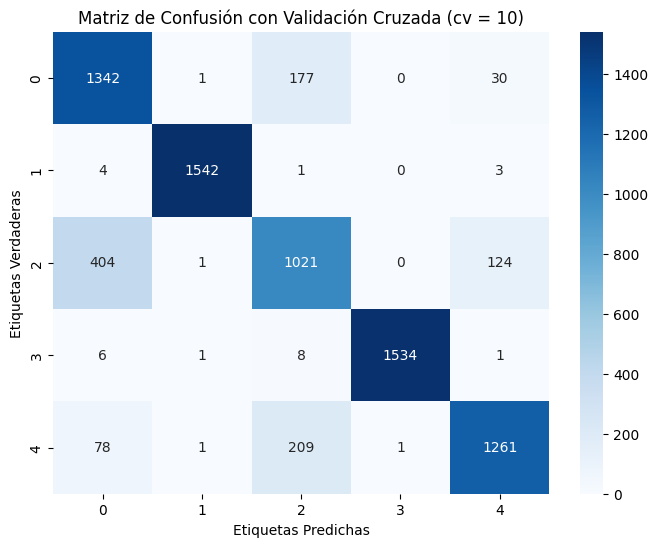

Exactitud media: 0.864516129032258
Precisión media: 0.8676388612875445
Recall media: 0.864516129032258
Puntuación F1 media: 0.864334256094665
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_4_estimators/random_forest_llava_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_sim_5_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.1.png


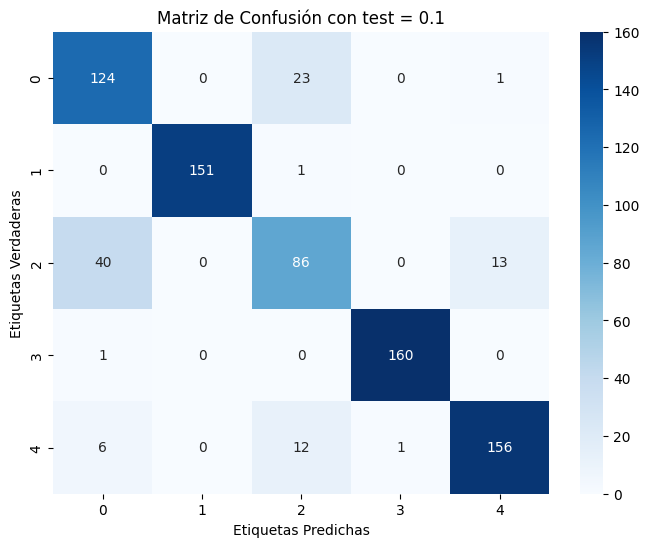

Exactitud del modelo: 0.8735483870967742
Precisión del modelo: 0.8747012635850261
Recall del modelo: 0.8735483870967742
Puntuación F1 del modelo: 0.8728004039945515
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.2.png


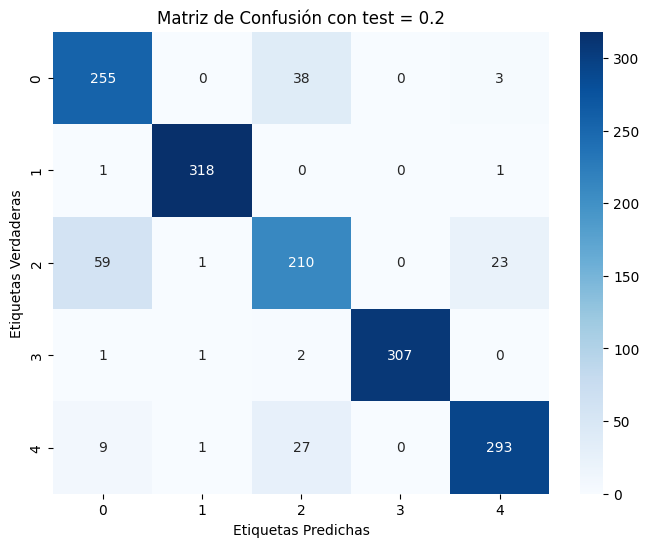

Exactitud del modelo: 0.892258064516129
Precisión del modelo: 0.8932527184125569
Recall del modelo: 0.892258064516129
Puntuación F1 del modelo: 0.8922484979107086
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.3.png


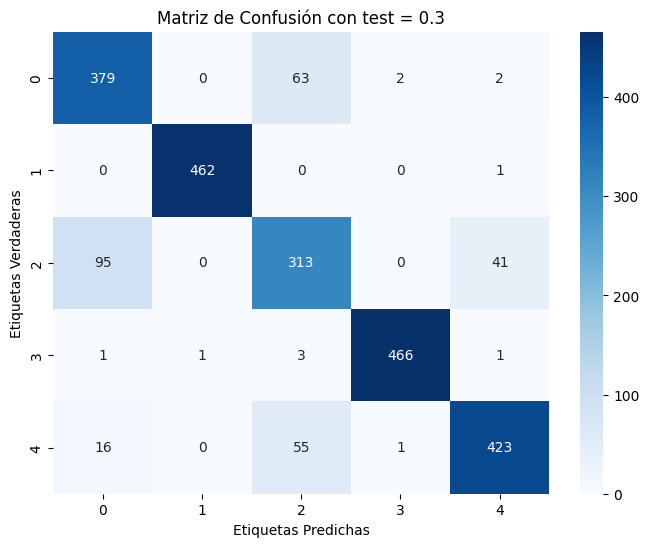

Exactitud del modelo: 0.8787096774193548
Precisión del modelo: 0.8802010299022505
Recall del modelo: 0.8787096774193548
Puntuación F1 del modelo: 0.8789078967137771
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.4.png


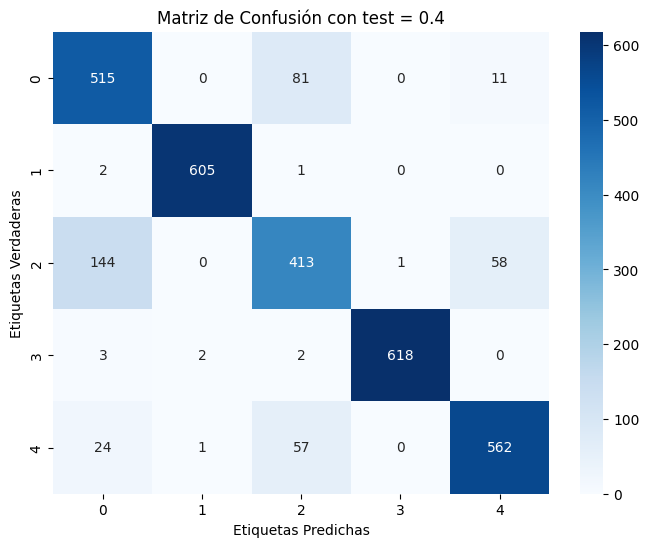

Exactitud del modelo: 0.8751612903225806
Precisión del modelo: 0.8761795816196751
Recall del modelo: 0.8751612903225806
Puntuación F1 del modelo: 0.8746400059184015
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.5.png


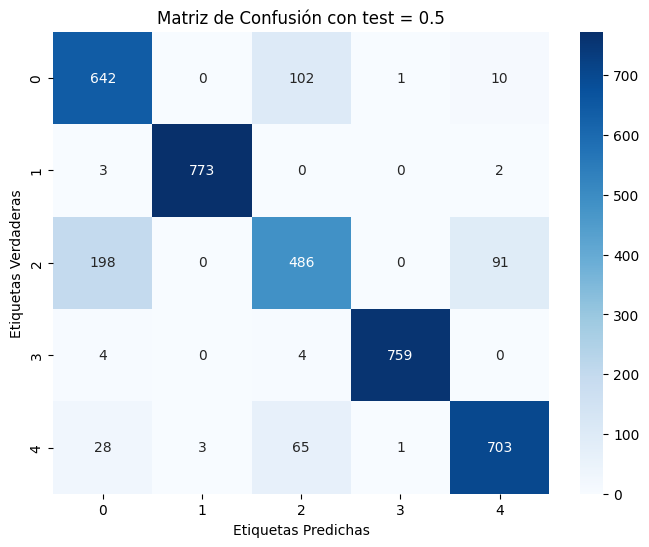

Exactitud del modelo: 0.8678709677419355
Precisión del modelo: 0.8683832788755331
Recall del modelo: 0.8678709677419355
Puntuación F1 del modelo: 0.8663567741531026
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.6.png


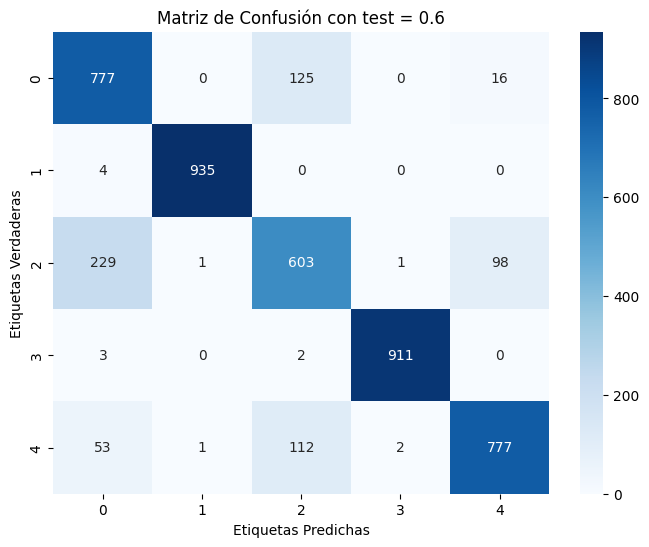

Exactitud del modelo: 0.8608602150537634
Precisión del modelo: 0.8625070074620181
Recall del modelo: 0.8608602150537634
Puntuación F1 del modelo: 0.8603173248387067
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.7.png


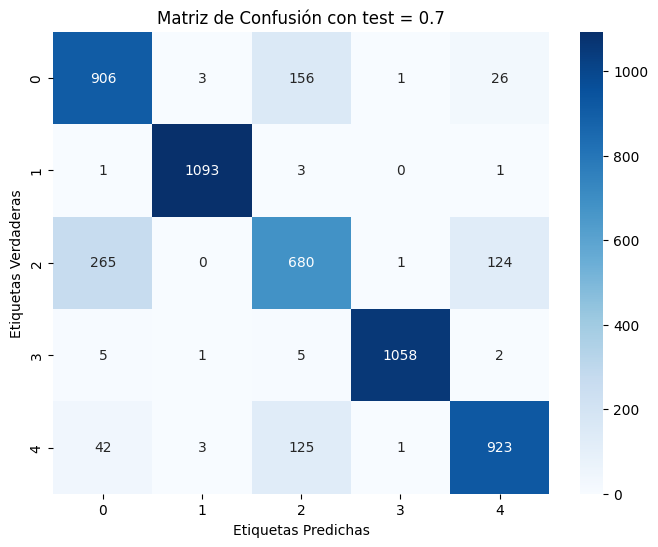

Exactitud del modelo: 0.8589861751152074
Precisión del modelo: 0.8589698952047805
Recall del modelo: 0.8589861751152074
Puntuación F1 del modelo: 0.8581600920334299
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.8.png


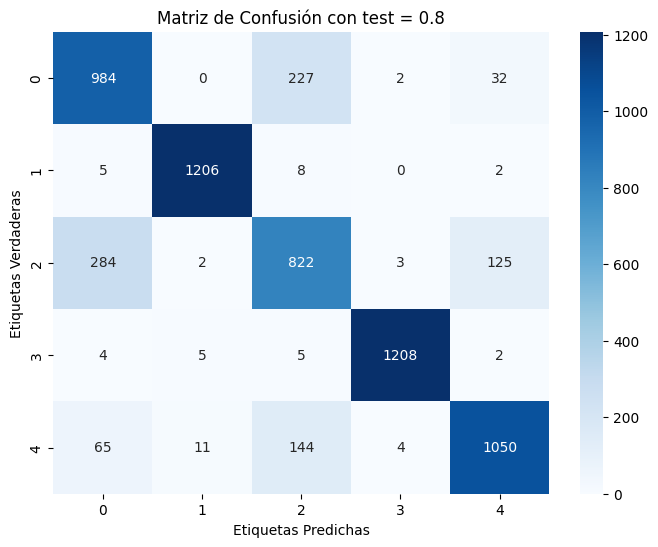

Exactitud del modelo: 0.85
Precisión del modelo: 0.851280757045533
Recall del modelo: 0.85
Puntuación F1 del modelo: 0.8502914761909813
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.9.png


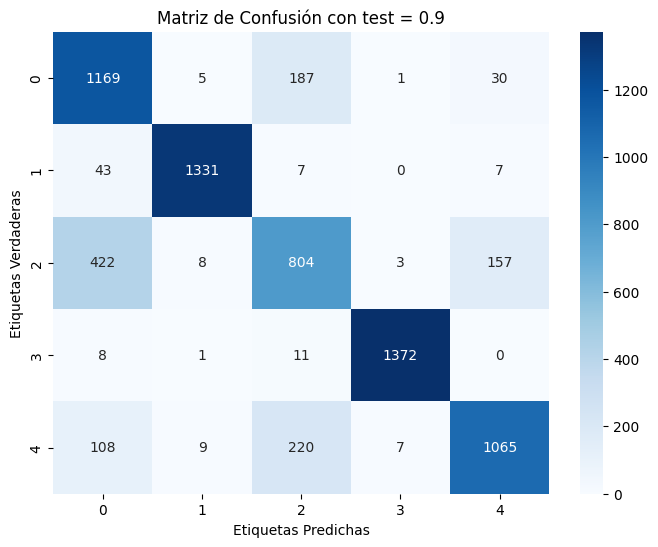

Exactitud del modelo: 0.8230824372759856
Precisión del modelo: 0.8285354411551371
Recall del modelo: 0.8230824372759856
Puntuación F1 del modelo: 0.8228257600689686
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_5_estimators/random_forest_llava_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_cruz_5_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_2.png


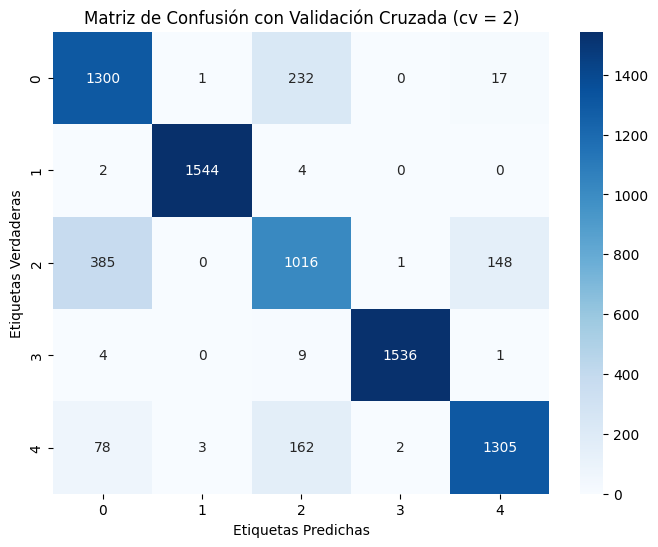

Exactitud media: 0.8646451612903225
Precisión media: 0.8662962605197435
Recall media: 0.8646451612903225
Puntuación F1 media: 0.8644148451244762
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_3.png


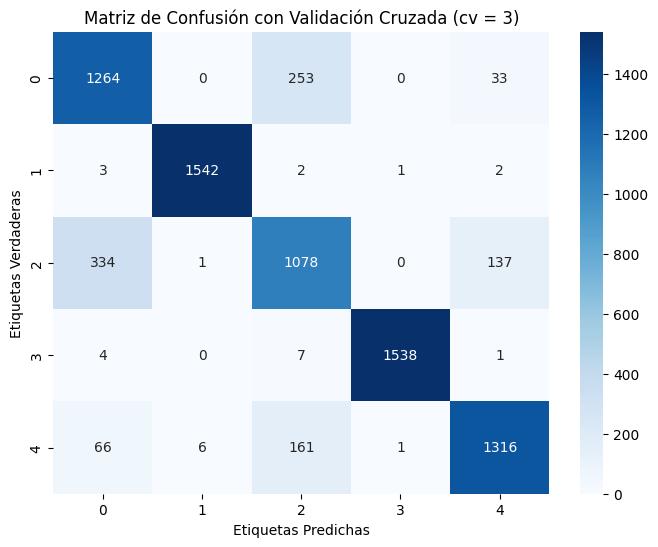

Exactitud media: 0.8694193548387097
Precisión media: 0.8705236086187964
Recall media: 0.8694193548387097
Puntuación F1 media: 0.8696412666062979
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_4.png


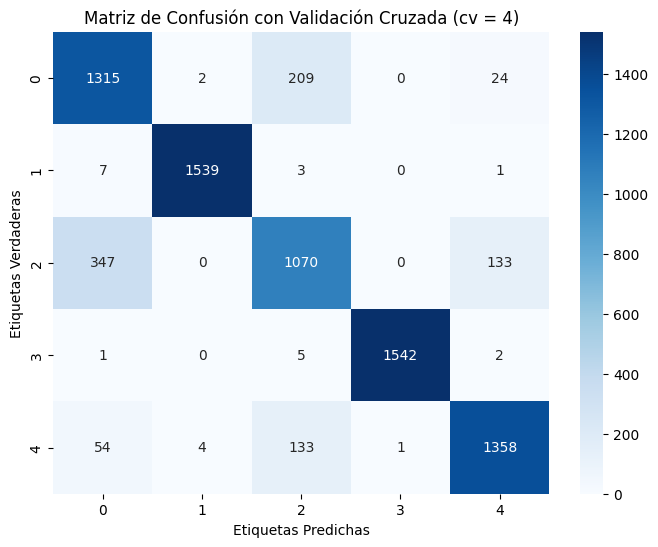

Exactitud media: 0.8805161290322581
Precisión media: 0.8812697439648673
Recall media: 0.8805161290322581
Puntuación F1 media: 0.8801404372555554
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_5.png


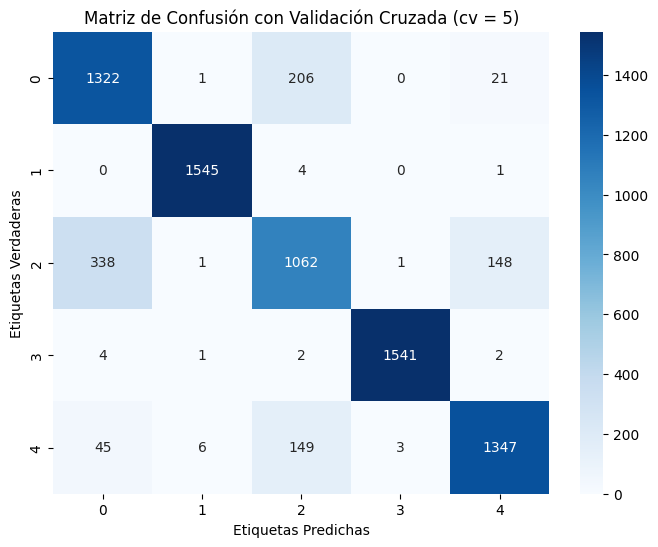

Exactitud media: 0.8796129032258064
Precisión media: 0.8796499007536903
Recall media: 0.8796129032258064
Puntuación F1 media: 0.878964281084686
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_6.png


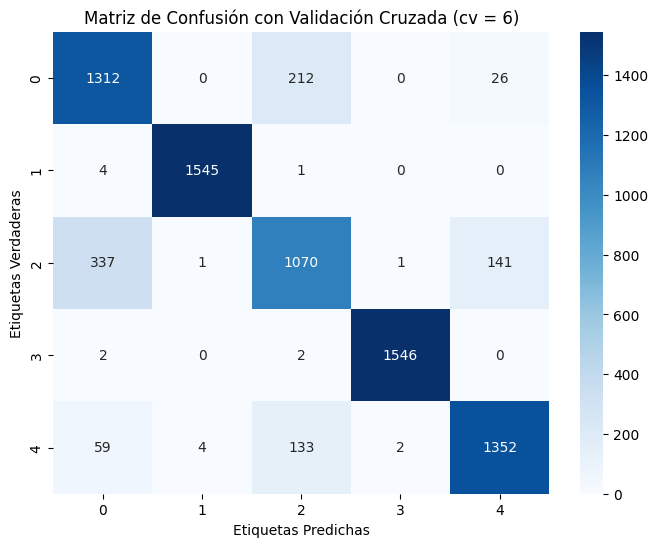

Exactitud media: 0.8806451612903226
Precisión media: 0.8809883081690952
Recall media: 0.8806451612903226
Puntuación F1 media: 0.8801059959626713
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_7.png


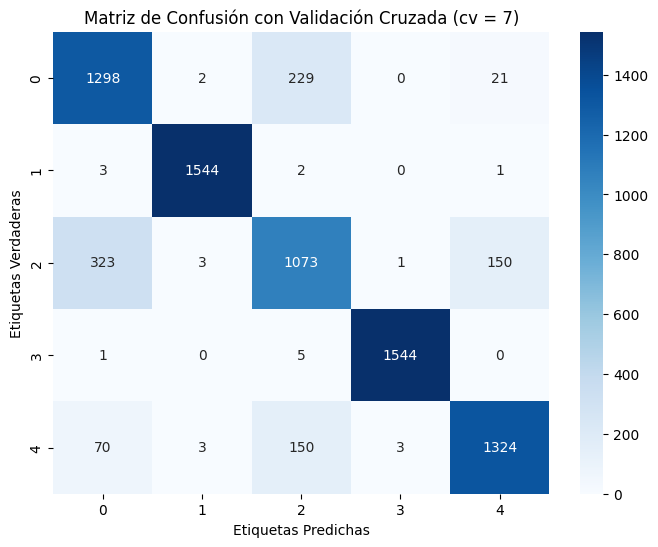

Exactitud media: 0.8752258064516129
Precisión media: 0.8757010119976534
Recall media: 0.8752258064516129
Puntuación F1 media: 0.8749578962062008
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_8.png


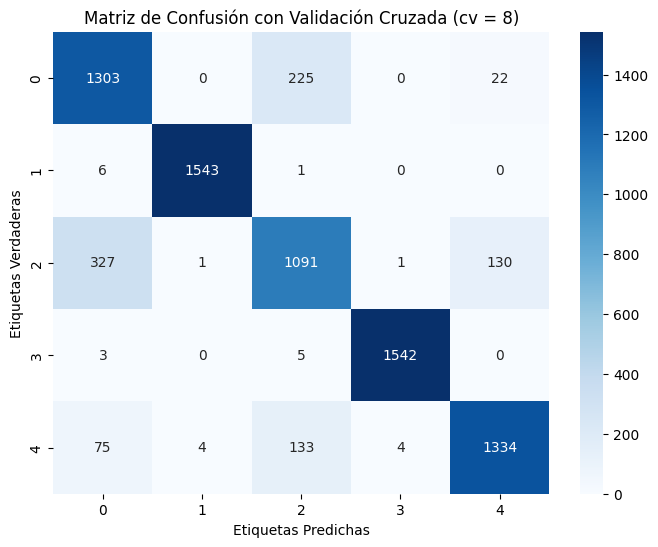

Exactitud media: 0.8790967741935484
Precisión media: 0.8802576311899747
Recall media: 0.8790967741935484
Puntuación F1 media: 0.8790493584618277
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_9.png


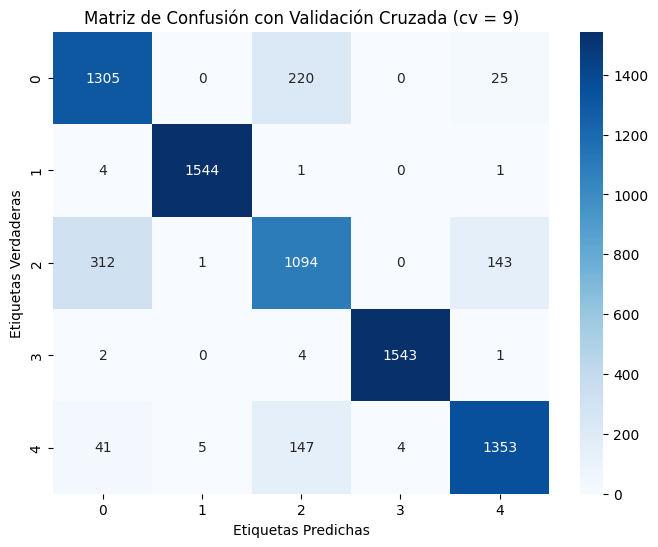

Exactitud media: 0.8824516129032258
Precisión media: 0.8824849371809075
Recall media: 0.8824516129032258
Puntuación F1 media: 0.8821372626637101
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_10.png


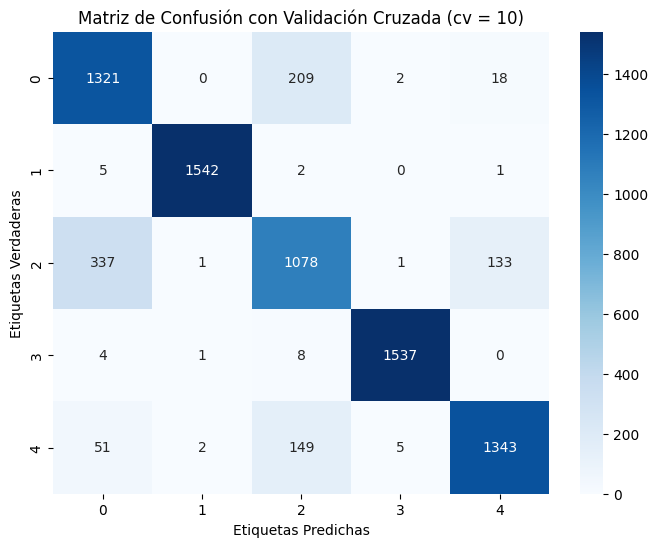

Exactitud media: 0.8801290322580645
Precisión media: 0.8809969260479222
Recall media: 0.8801290322580645
Puntuación F1 media: 0.8799024801178547
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_5_estimators/random_forest_llava_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_sim_6_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.1.png


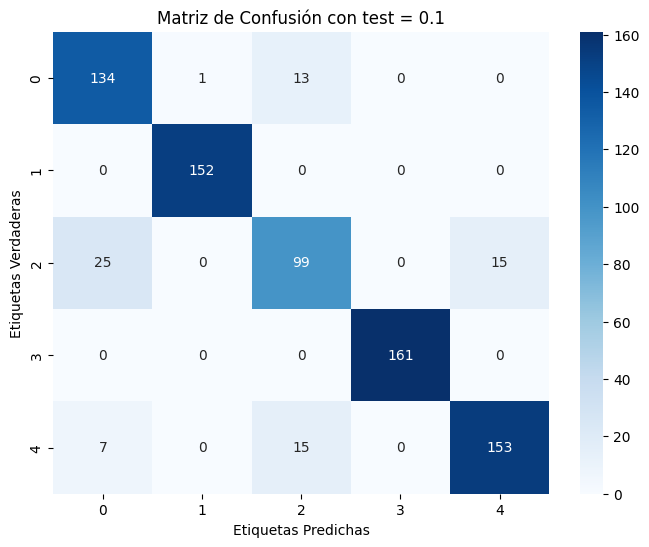

Exactitud del modelo: 0.9019354838709678
Precisión del modelo: 0.902200962805737
Recall del modelo: 0.9019354838709678
Puntuación F1 del modelo: 0.9011725484838292
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.2.png


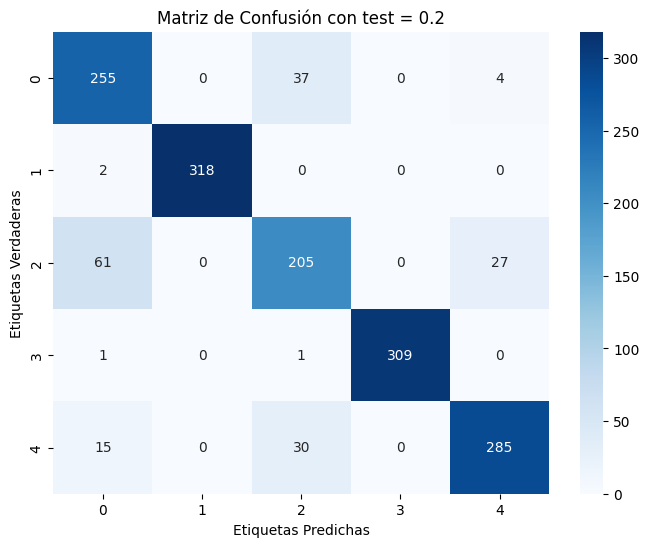

Exactitud del modelo: 0.8851612903225806
Precisión del modelo: 0.8868599491928334
Recall del modelo: 0.8851612903225806
Puntuación F1 del modelo: 0.8851825637800065
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.3.png


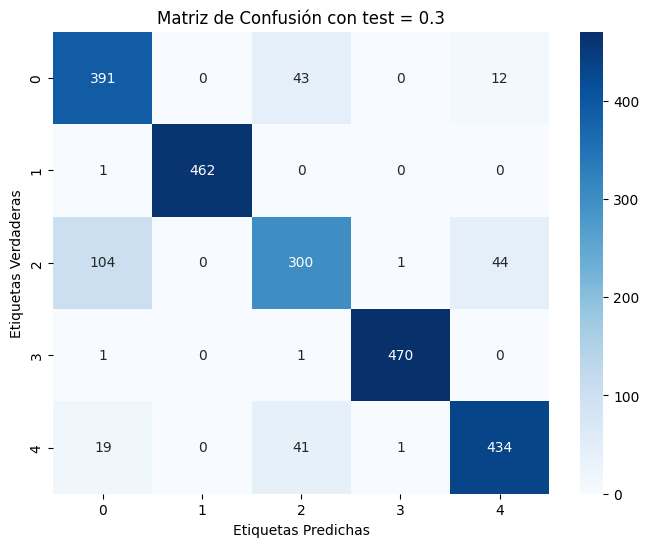

Exactitud del modelo: 0.884731182795699
Precisión del modelo: 0.8857015336085104
Recall del modelo: 0.884731182795699
Puntuación F1 del modelo: 0.8835582556677023
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.4.png


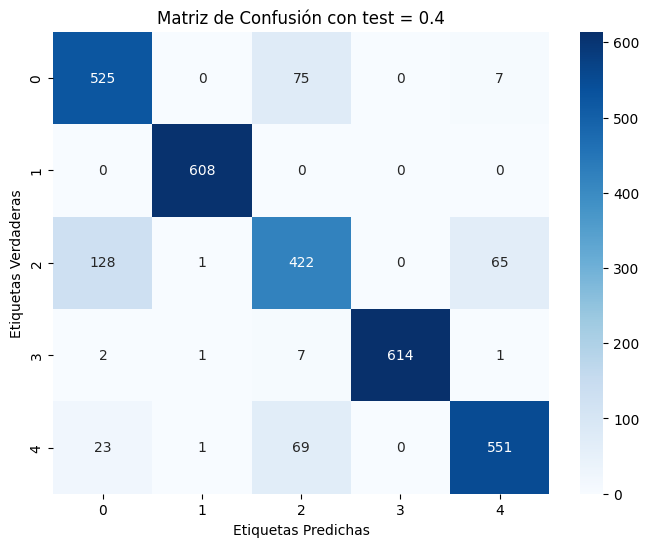

Exactitud del modelo: 0.8774193548387097
Precisión del modelo: 0.8781824264910731
Recall del modelo: 0.8774193548387097
Puntuación F1 del modelo: 0.8770643534911963
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.5.png


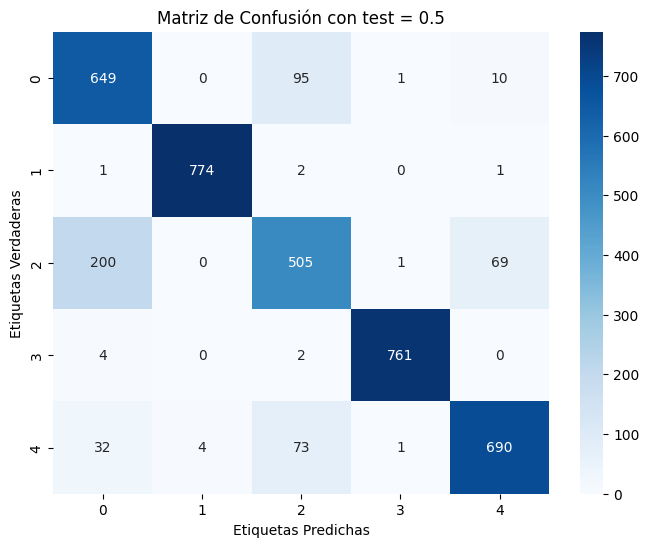

Exactitud del modelo: 0.872
Precisión del modelo: 0.8738103271579584
Recall del modelo: 0.872
Puntuación F1 del modelo: 0.8712130722589597
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.6.png


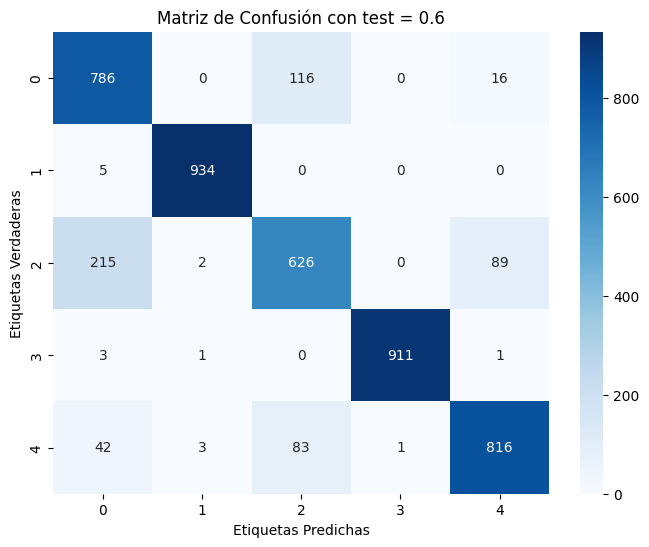

Exactitud del modelo: 0.8759139784946236
Precisión del modelo: 0.8770070488703015
Recall del modelo: 0.8759139784946236
Puntuación F1 del modelo: 0.8751784656243696
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.7.png


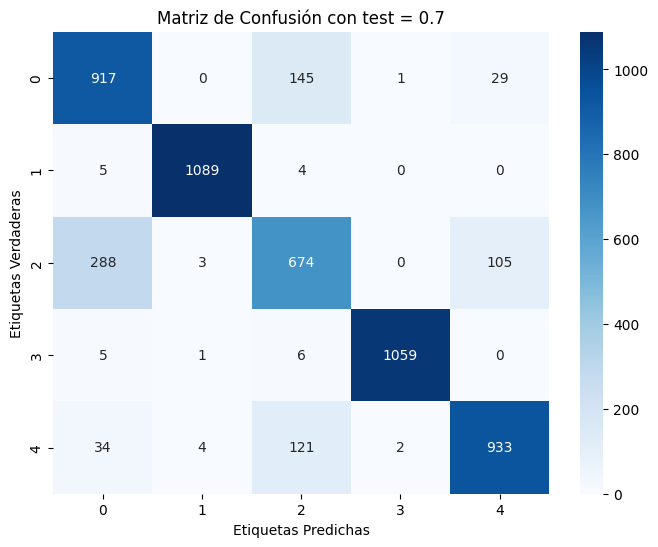

Exactitud del modelo: 0.8611981566820277
Precisión del modelo: 0.8618333449693791
Recall del modelo: 0.8611981566820277
Puntuación F1 del modelo: 0.8603064068324566
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.8.png


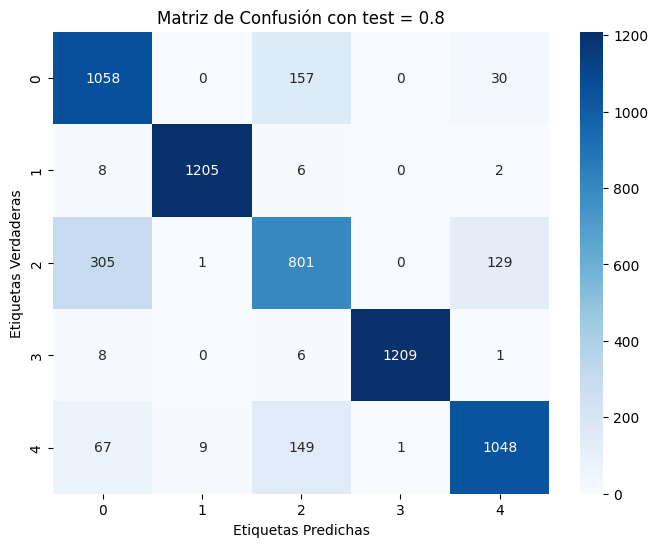

Exactitud del modelo: 0.858225806451613
Precisión del modelo: 0.860170118095885
Recall del modelo: 0.858225806451613
Puntuación F1 del modelo: 0.8578536837490344
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.9.png


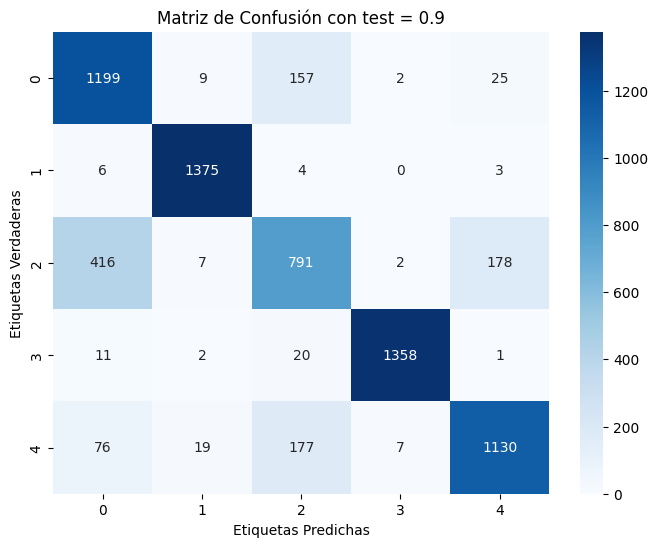

Exactitud del modelo: 0.8391397849462365
Precisión del modelo: 0.840162259475592
Recall del modelo: 0.8391397849462365
Puntuación F1 del modelo: 0.8367228666137376
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_6_estimators/random_forest_llava_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_cruz_6_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_2.png


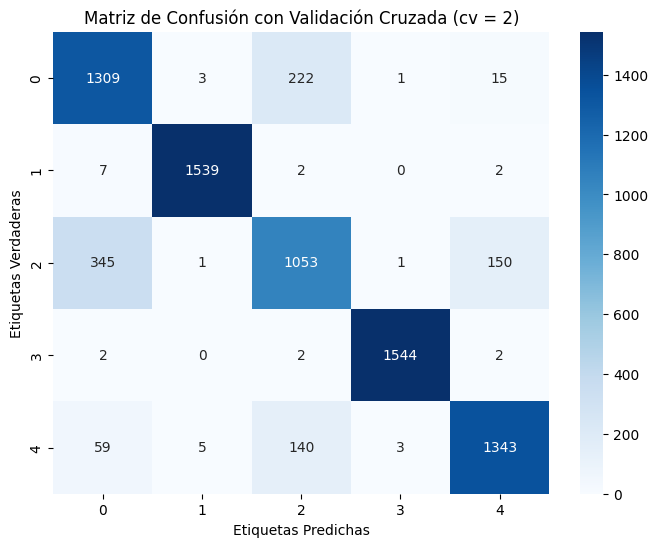

Exactitud media: 0.8758709677419355
Precisión media: 0.8762840308022607
Recall media: 0.8758709677419355
Puntuación F1 media: 0.8753302243110553
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_3.png


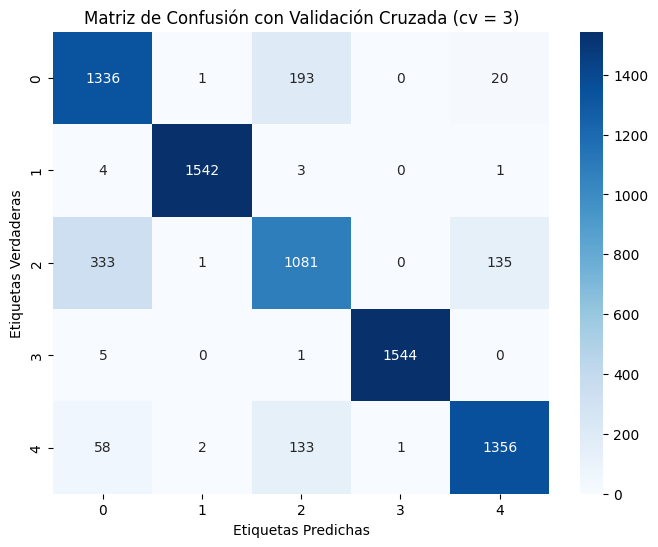

Exactitud media: 0.8850322580645161
Precisión media: 0.8858598791531347
Recall media: 0.8850322580645161
Puntuación F1 media: 0.8845726710799028
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_4.png


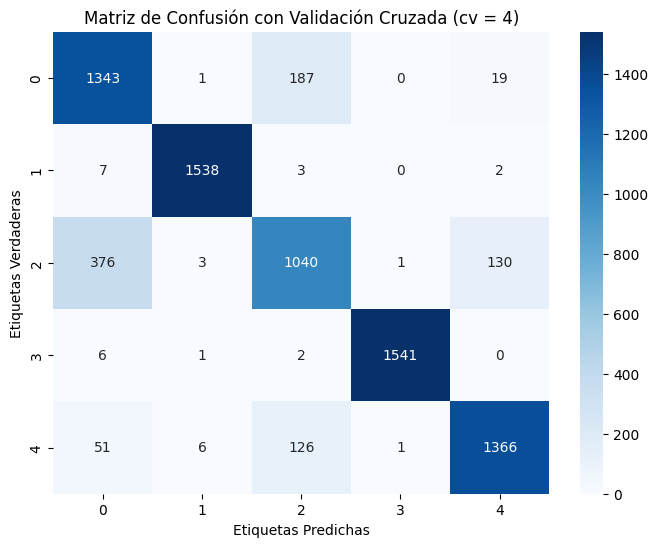

Exactitud media: 0.8810322580645161
Precisión media: 0.8822241825885142
Recall media: 0.8810322580645161
Puntuación F1 media: 0.88018867781359
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_5.png


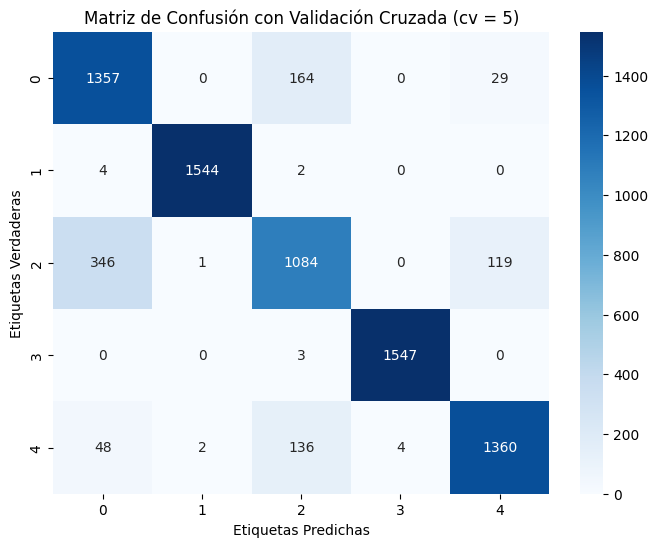

Exactitud media: 0.8892903225806451
Precisión media: 0.890195097040807
Recall media: 0.8892903225806451
Puntuación F1 media: 0.8886305541093484
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_6.png


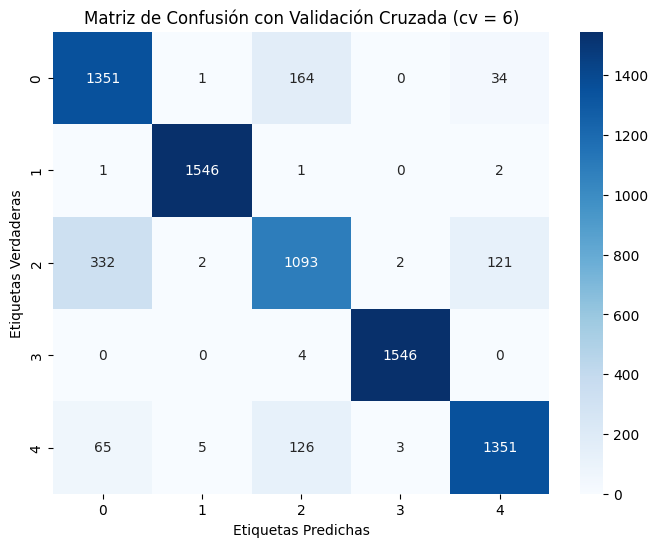

Exactitud media: 0.8886451612903226
Precisión media: 0.8894844468833237
Recall media: 0.8886451612903226
Puntuación F1 media: 0.887979082296244
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_7.png


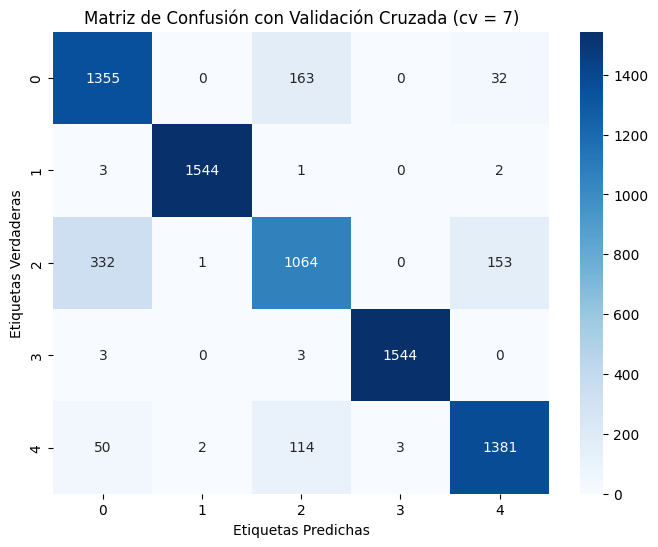

Exactitud media: 0.888774193548387
Precisión media: 0.889066936766748
Recall media: 0.888774193548387
Puntuación F1 media: 0.8876060816817944
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_8.png


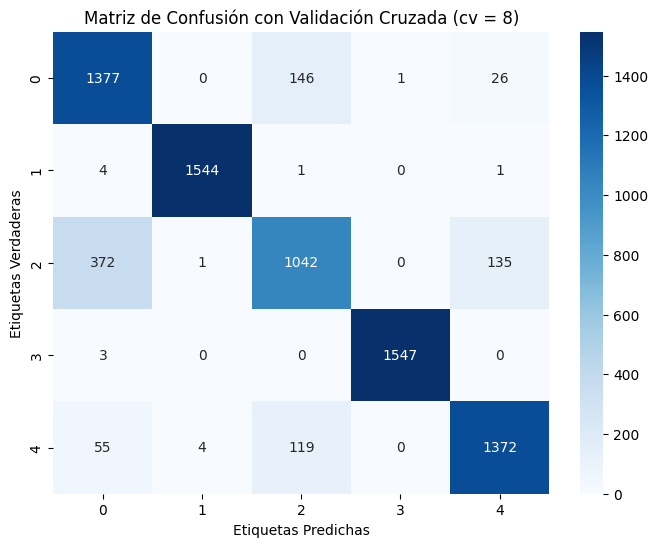

Exactitud media: 0.888
Precisión media: 0.8895018679198959
Recall media: 0.888
Puntuación F1 media: 0.8866986226255223
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_9.png


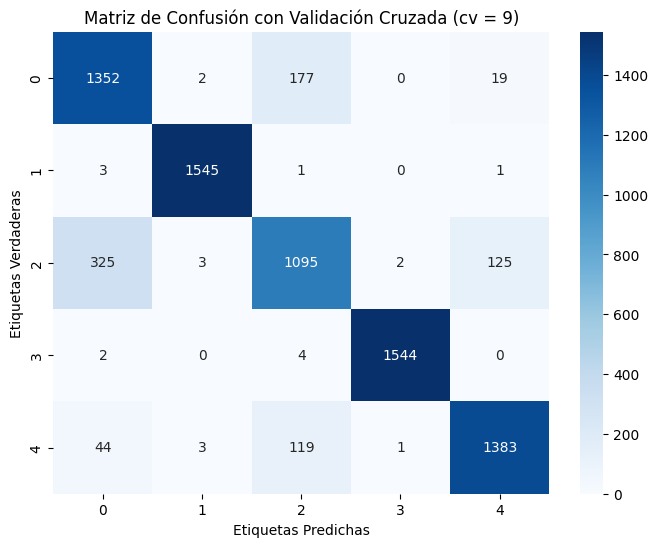

Exactitud media: 0.892774193548387
Precisión media: 0.8931424259589951
Recall media: 0.892774193548387
Puntuación F1 media: 0.8920635252474808
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_10.png


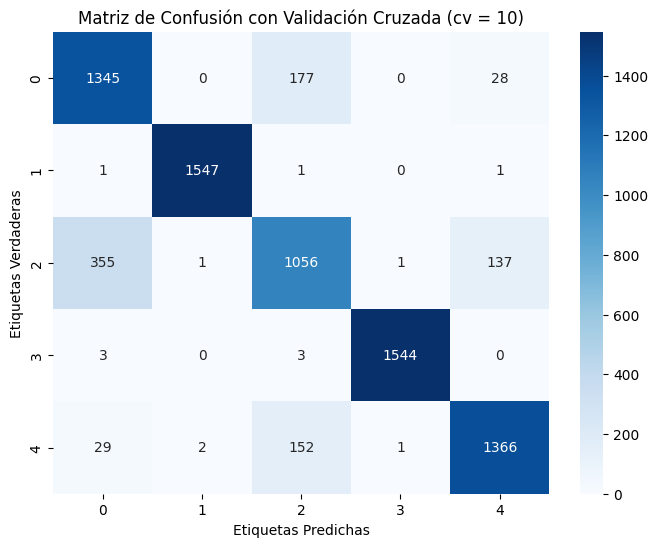

Exactitud media: 0.8849032258064516
Precisión media: 0.8849571466973438
Recall media: 0.8849032258064516
Puntuación F1 media: 0.8839804425935783
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_6_estimators/random_forest_llava_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_sim_7_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.1.png


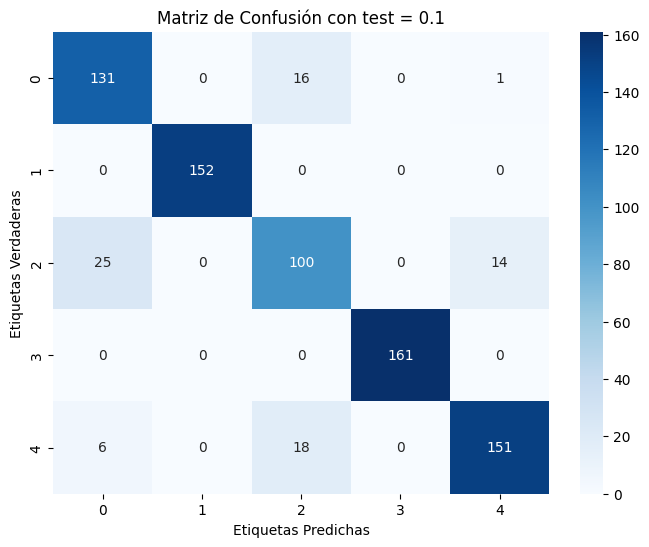

Exactitud del modelo: 0.896774193548387
Precisión del modelo: 0.8975446485383392
Recall del modelo: 0.896774193548387
Puntuación F1 del modelo: 0.8966460774743815
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.2.png


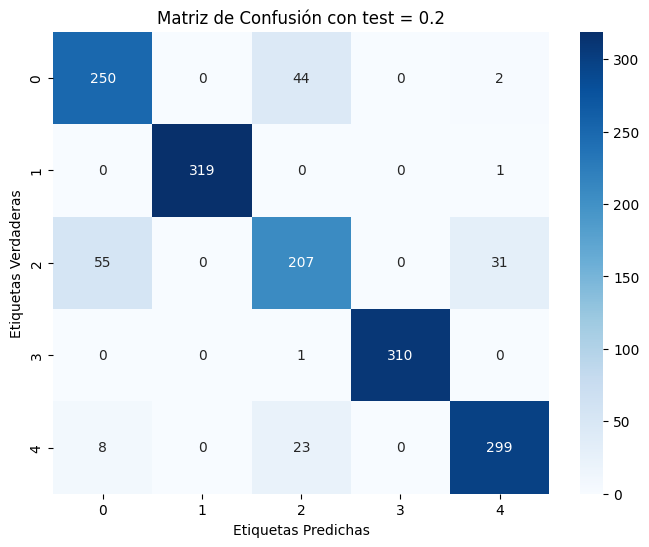

Exactitud del modelo: 0.8935483870967742
Precisión del modelo: 0.8930820144871057
Recall del modelo: 0.8935483870967742
Puntuación F1 del modelo: 0.8930494689177345
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.3.png


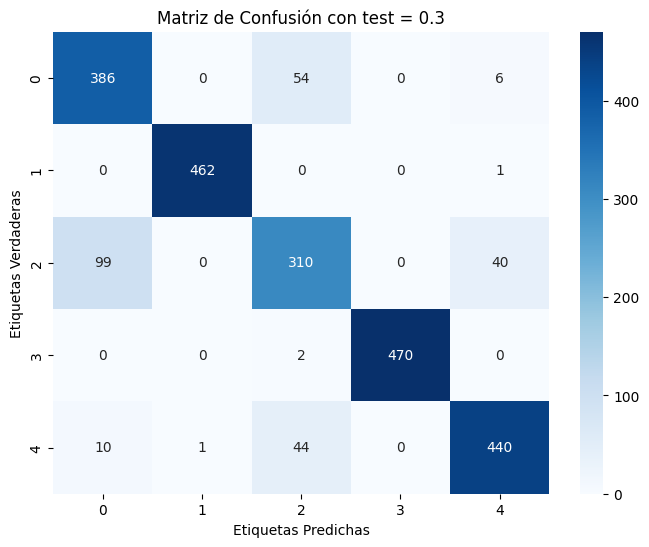

Exactitud del modelo: 0.8894623655913978
Precisión del modelo: 0.8896798408369792
Recall del modelo: 0.8894623655913978
Puntuación F1 del modelo: 0.8888417246241951
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.4.png


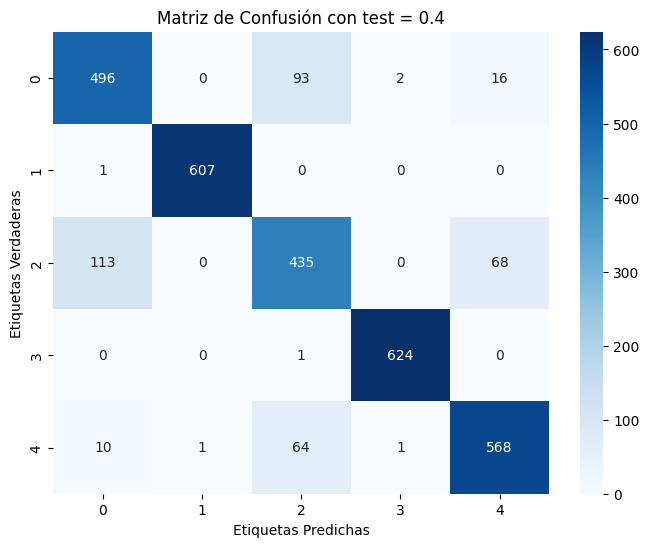

Exactitud del modelo: 0.8806451612903226
Precisión del modelo: 0.8798426072051339
Recall del modelo: 0.8806451612903226
Puntuación F1 del modelo: 0.8801668911507475
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.5.png


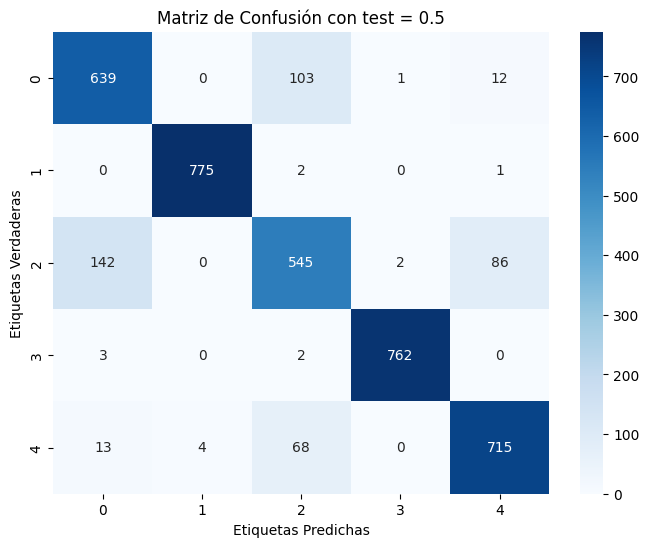

Exactitud del modelo: 0.8867096774193548
Precisión del modelo: 0.8858472676478962
Recall del modelo: 0.8867096774193548
Puntuación F1 del modelo: 0.885949079943129
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.6.png


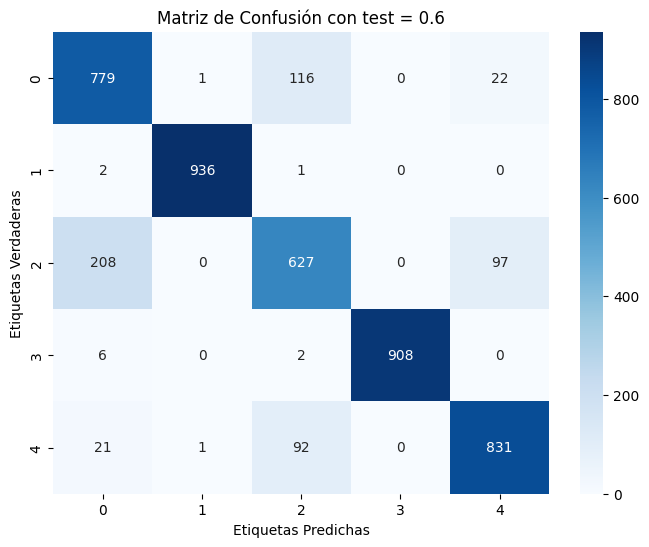

Exactitud del modelo: 0.8776344086021506
Precisión del modelo: 0.8775948735606927
Recall del modelo: 0.8776344086021506
Puntuación F1 del modelo: 0.876798534923104
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.7.png


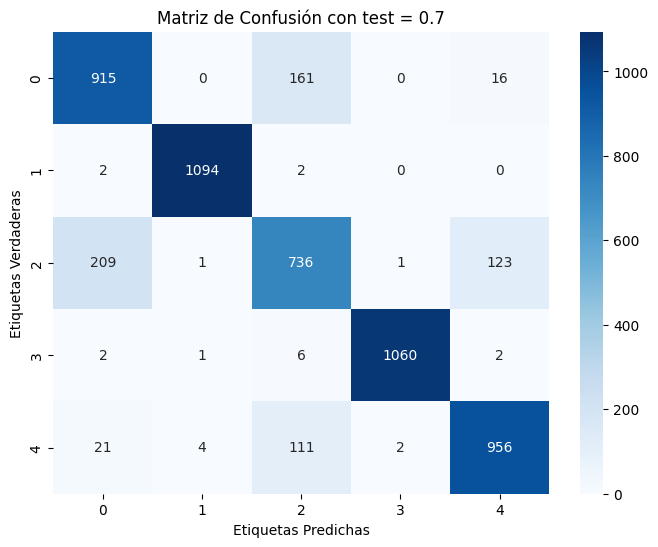

Exactitud del modelo: 0.8776036866359447
Precisión del modelo: 0.8770691970305863
Recall del modelo: 0.8776036866359447
Puntuación F1 del modelo: 0.8771334482204346
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.8.png


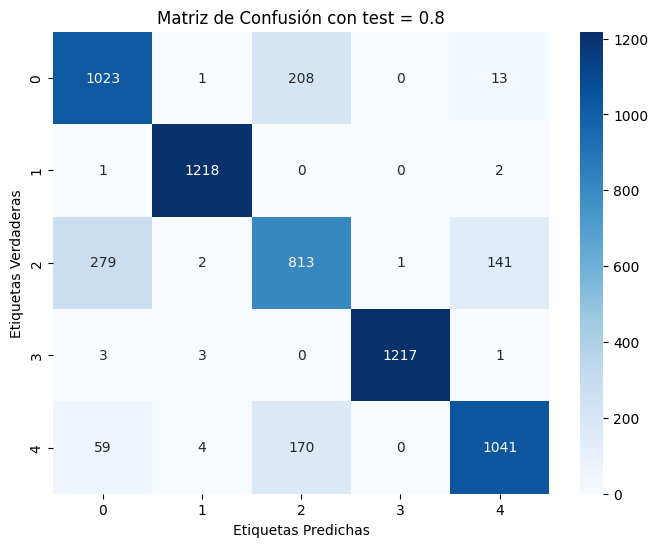

Exactitud del modelo: 0.8567741935483871
Precisión del modelo: 0.8577219293748118
Recall del modelo: 0.8567741935483871
Puntuación F1 del modelo: 0.8567021432659537
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.9.png


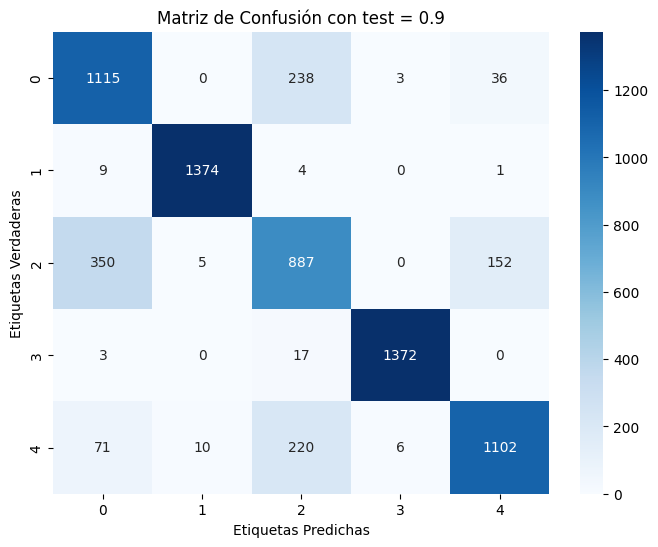

Exactitud del modelo: 0.8387096774193549
Precisión del modelo: 0.8410725938650901
Recall del modelo: 0.8387096774193549
Puntuación F1 del modelo: 0.8391318235741135
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_7_estimators/random_forest_llava_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_cruz_7_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_2.png


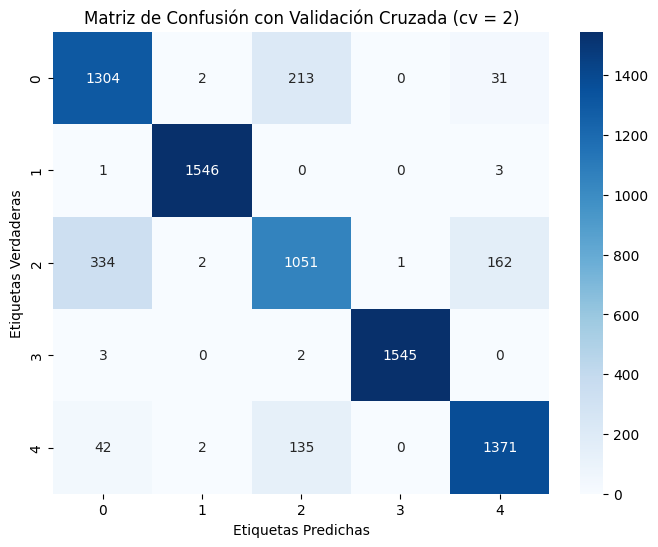

Exactitud media: 0.8796129032258064
Precisión media: 0.8789865314288543
Recall media: 0.8796129032258064
Puntuación F1 media: 0.8786525757888136
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_3.png


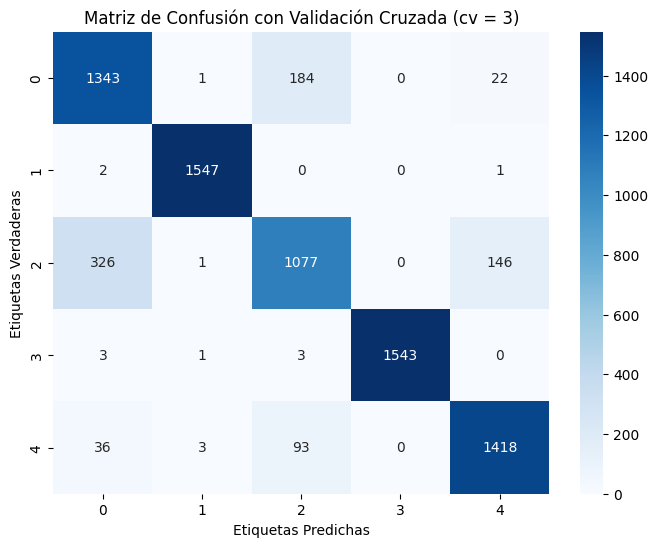

Exactitud media: 0.8939354838709678
Precisión media: 0.8937377769167907
Recall media: 0.8939354838709678
Puntuación F1 media: 0.8927562625367816
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_4.png


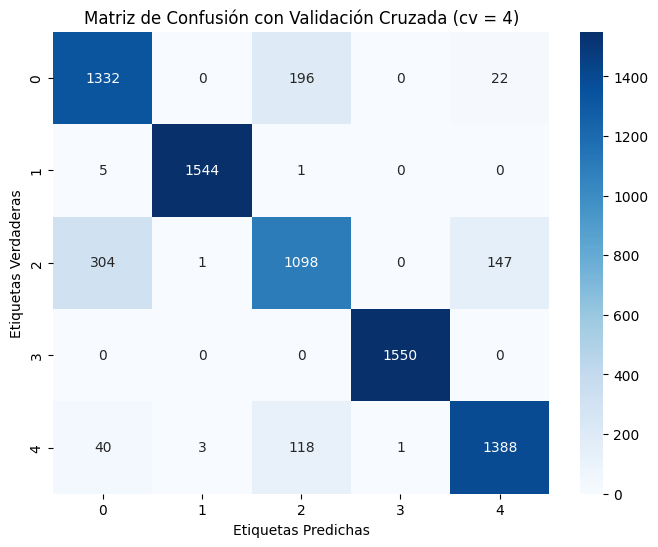

Exactitud media: 0.8918709677419355
Precisión media: 0.8915369511582647
Recall media: 0.8918709677419355
Puntuación F1 media: 0.8911138542496787
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_5.png


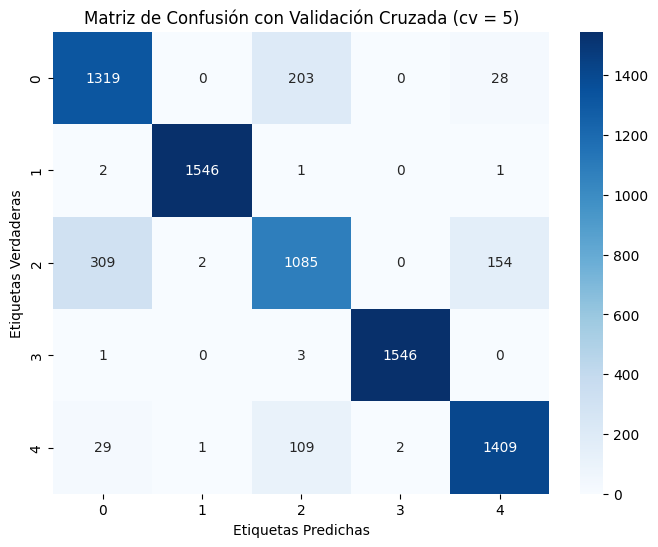

Exactitud media: 0.8909677419354839
Precisión media: 0.8901693330332396
Recall media: 0.8909677419354839
Puntuación F1 media: 0.8899672491573365
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_6.png


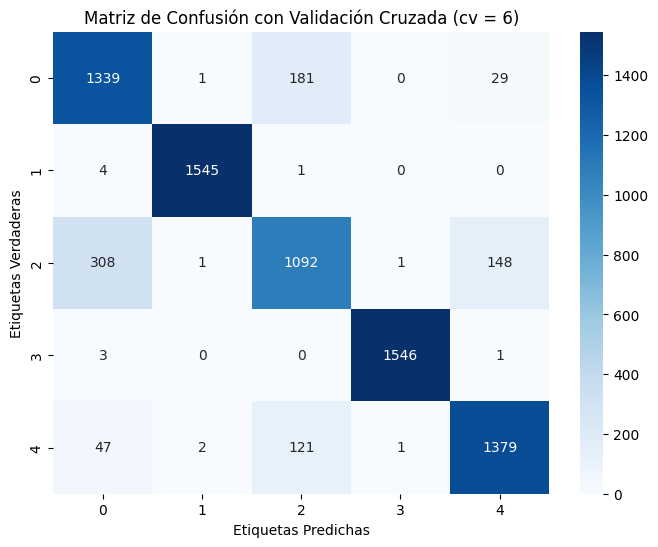

Exactitud media: 0.8904516129032258
Precisión media: 0.8903565985195869
Recall media: 0.8904516129032258
Puntuación F1 media: 0.8896349130547082
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_7.png


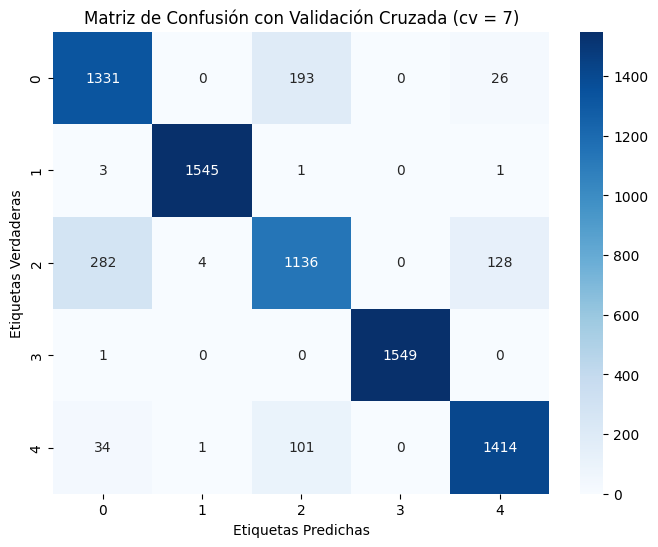

Exactitud media: 0.9
Precisión media: 0.899602736813448
Recall media: 0.9
Puntuación F1 media: 0.8993855687249154
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_8.png


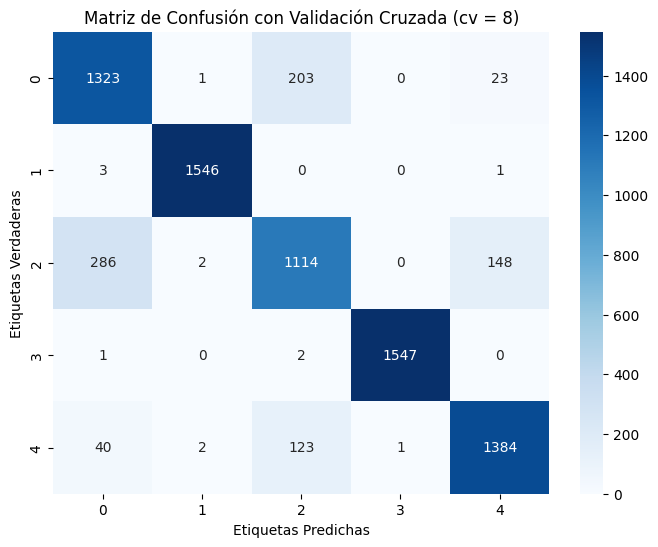

Exactitud media: 0.8921290322580645
Precisión media: 0.8916983101316672
Recall media: 0.8921290322580645
Puntuación F1 media: 0.8915475712914341
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_9.png


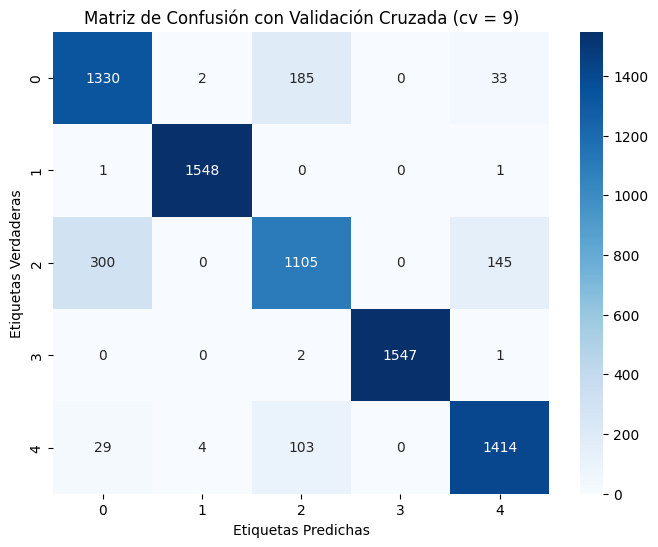

Exactitud media: 0.896
Precisión media: 0.8953070095540815
Recall media: 0.896
Puntuación F1 media: 0.8950059959094427
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_10.png


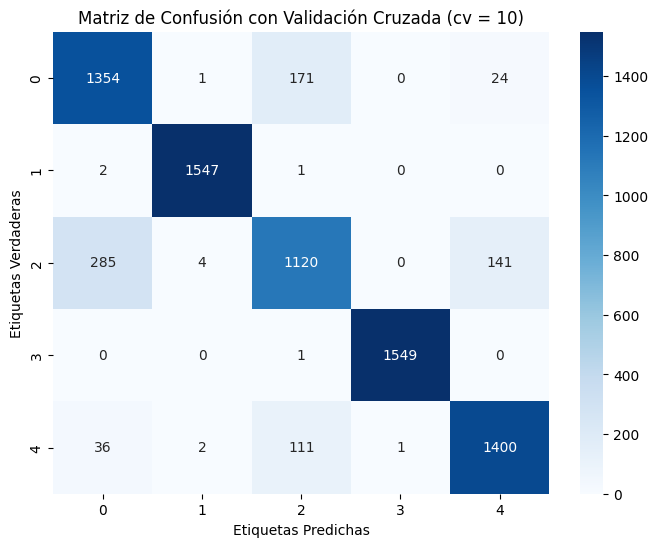

Exactitud media: 0.8993548387096775
Precisión media: 0.8989067956506366
Recall media: 0.8993548387096775
Puntuación F1 media: 0.8984945879728776
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_7_estimators/random_forest_llava_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_sim_8_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.1.png


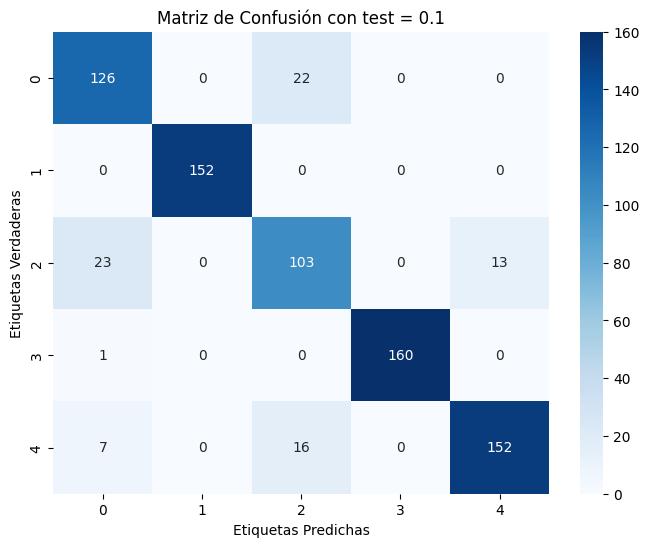

Exactitud del modelo: 0.8941935483870967
Precisión del modelo: 0.8961654172490504
Recall del modelo: 0.8941935483870967
Puntuación F1 del modelo: 0.894858430361672
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.2.png


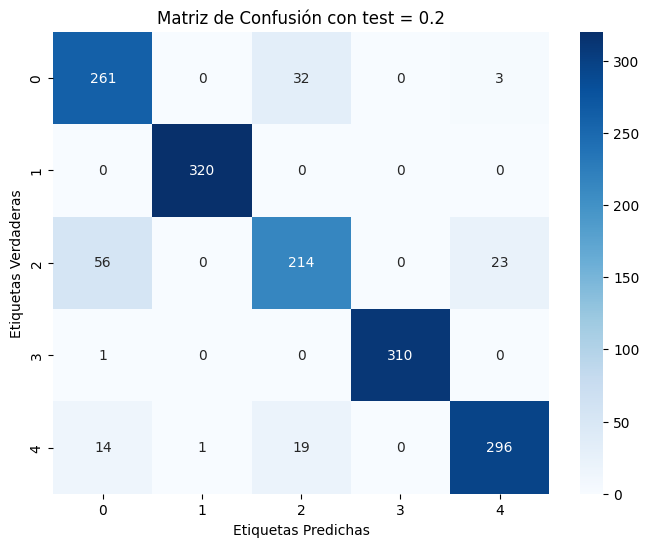

Exactitud del modelo: 0.9038709677419355
Precisión del modelo: 0.9049466248176246
Recall del modelo: 0.9038709677419355
Puntuación F1 del modelo: 0.903489319054002
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.3.png


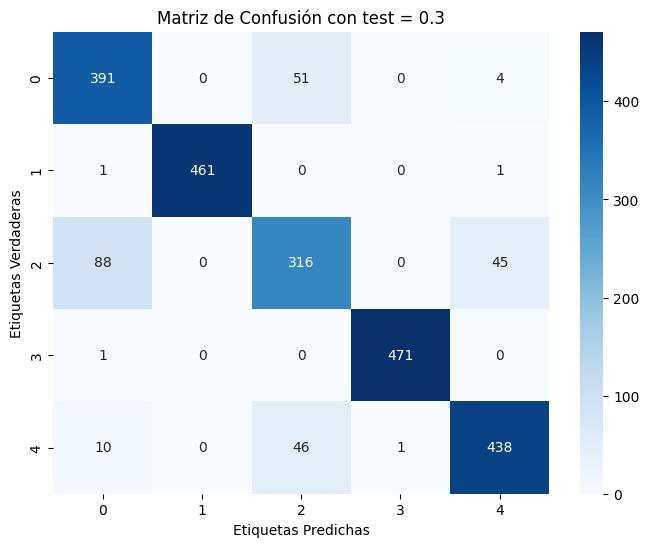

Exactitud del modelo: 0.8933333333333333
Precisión del modelo: 0.8933301292577245
Recall del modelo: 0.8933333333333333
Puntuación F1 del modelo: 0.8927036816049709
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.4.png


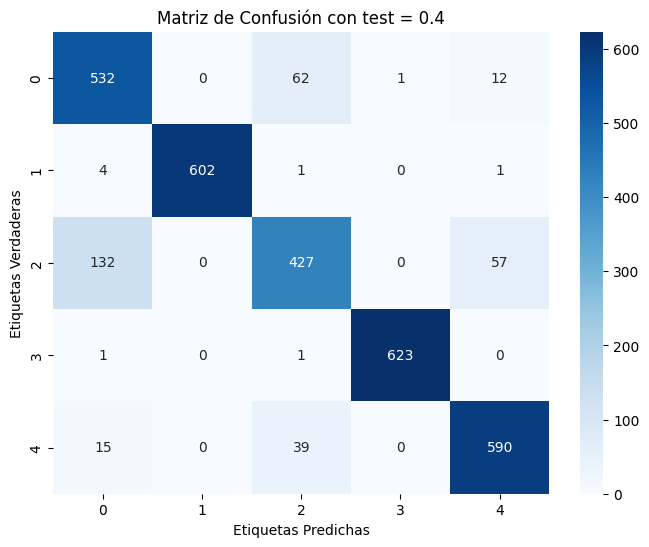

Exactitud del modelo: 0.8948387096774194
Precisión del modelo: 0.895513958289293
Recall del modelo: 0.8948387096774194
Puntuación F1 del modelo: 0.8937283379683038
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.5.png


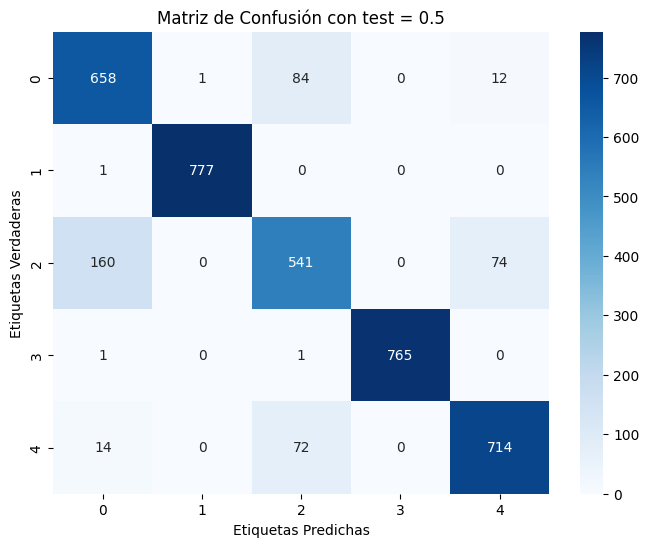

Exactitud del modelo: 0.8916129032258064
Precisión del modelo: 0.891445671893948
Recall del modelo: 0.8916129032258064
Puntuación F1 del modelo: 0.8907265595627913
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.6.png


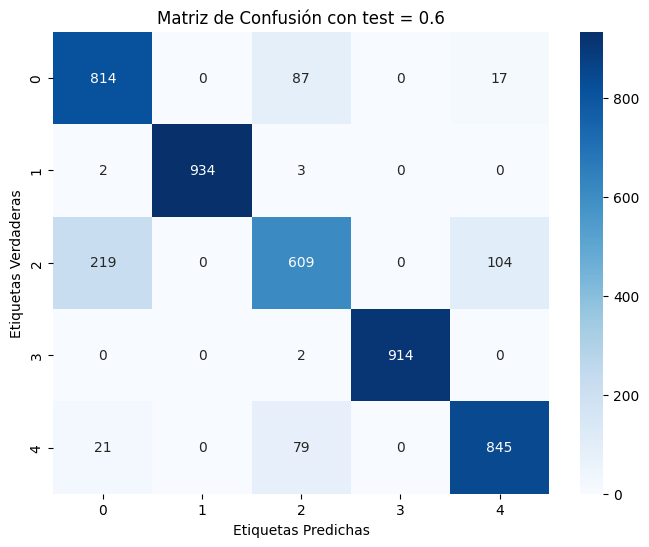

Exactitud del modelo: 0.8851612903225806
Precisión del modelo: 0.8853617973891467
Recall del modelo: 0.8851612903225806
Puntuación F1 del modelo: 0.8833055564332678
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.7.png


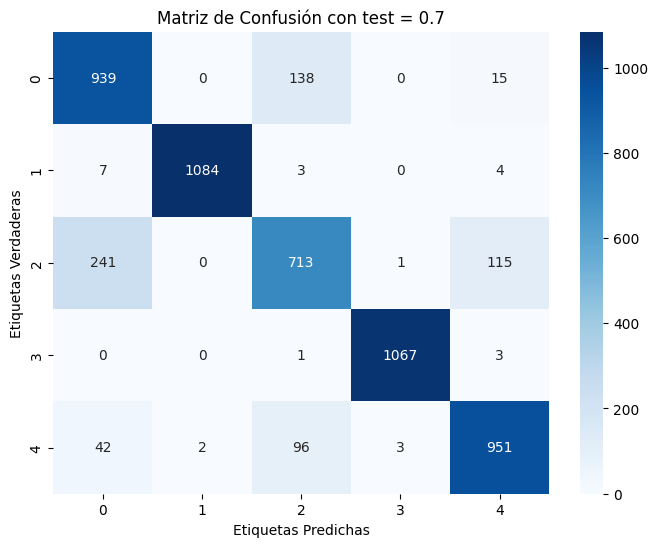

Exactitud del modelo: 0.8763133640552996
Precisión del modelo: 0.8766392992047568
Recall del modelo: 0.8763133640552996
Puntuación F1 del modelo: 0.8754153141549421
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.8.png


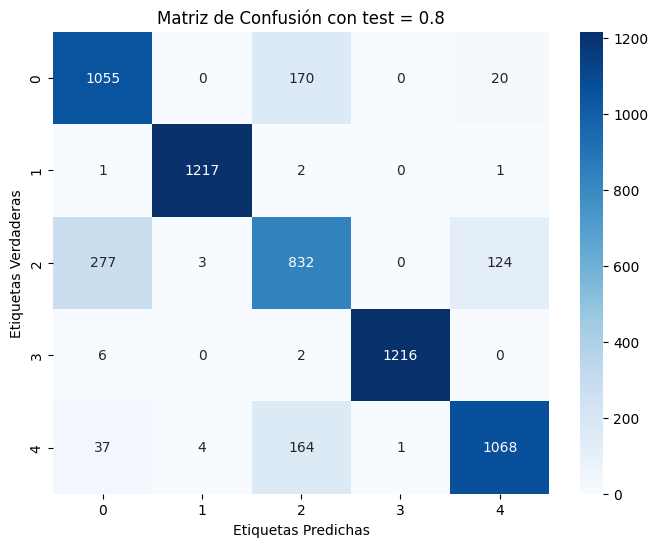

Exactitud del modelo: 0.8690322580645161
Precisión del modelo: 0.8697118096286393
Recall del modelo: 0.8690322580645161
Puntuación F1 del modelo: 0.8687552142955691
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.9.png


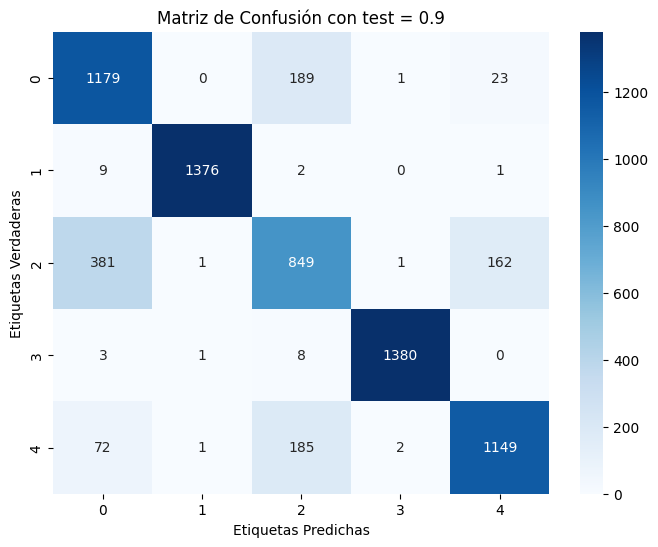

Exactitud del modelo: 0.8506093189964158
Precisión del modelo: 0.8521553318837509
Recall del modelo: 0.8506093189964158
Puntuación F1 del modelo: 0.8496931037158594
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_8_estimators/random_forest_llava_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_cruz_8_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_2.png


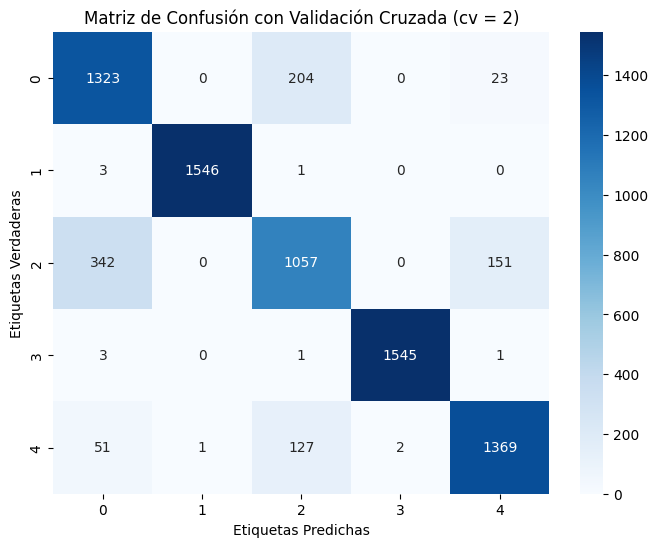

Exactitud media: 0.8825806451612903
Precisión media: 0.8826886262915633
Recall media: 0.8825806451612903
Puntuación F1 media: 0.8817582398003023
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_3.png


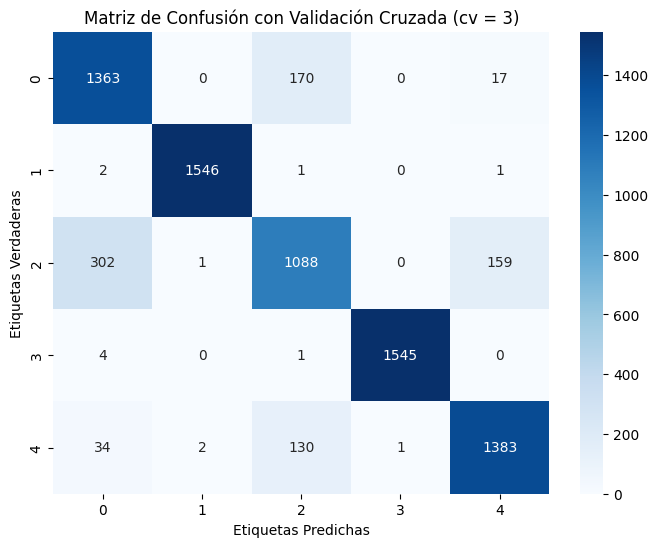

Exactitud media: 0.8935483870967742
Precisión media: 0.8932204400634798
Recall media: 0.8935483870967742
Puntuación F1 media: 0.8925618286123597
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_4.png


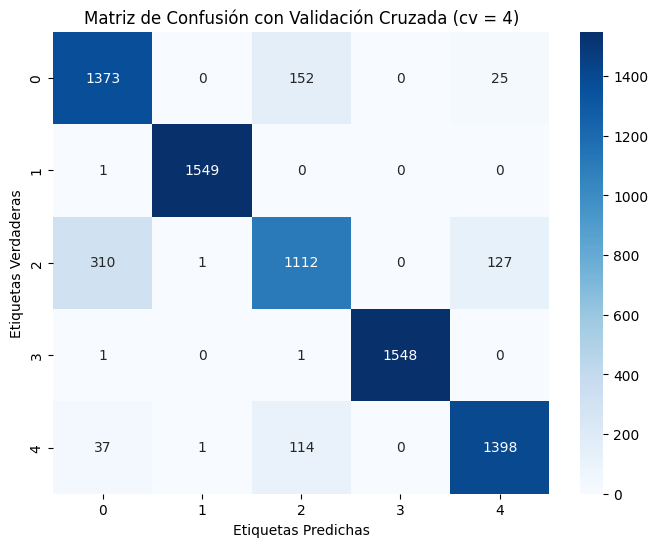

Exactitud media: 0.9006451612903226
Precisión media: 0.900871223323085
Recall media: 0.9006451612903226
Puntuación F1 media: 0.8997736093131585
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_5.png


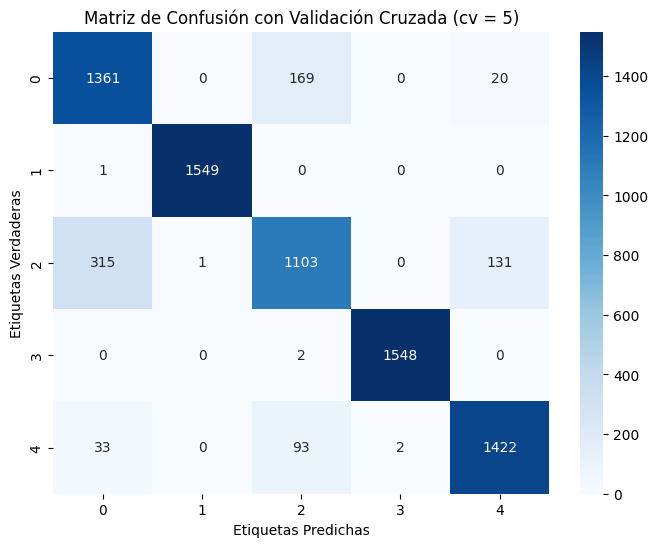

Exactitud media: 0.9010322580645161
Precisión media: 0.9009704812635034
Recall media: 0.9010322580645161
Puntuación F1 media: 0.8999906186653436
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_6.png


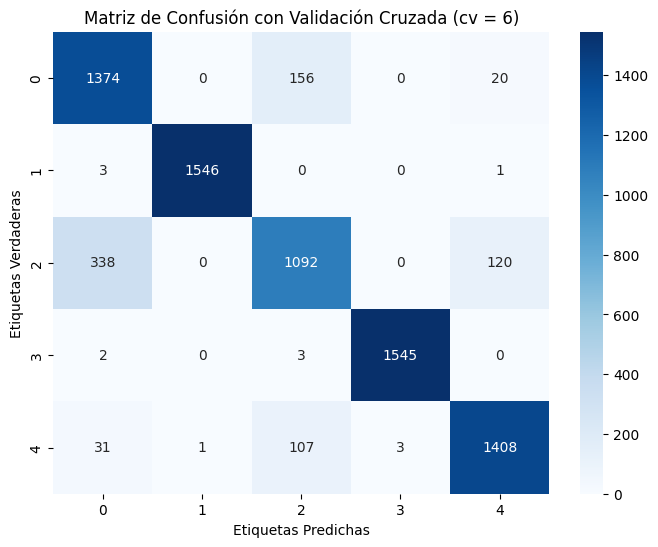

Exactitud media: 0.8987096774193548
Precisión media: 0.8993108071349674
Recall media: 0.8987096774193548
Puntuación F1 media: 0.8977494682972045
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_7.png


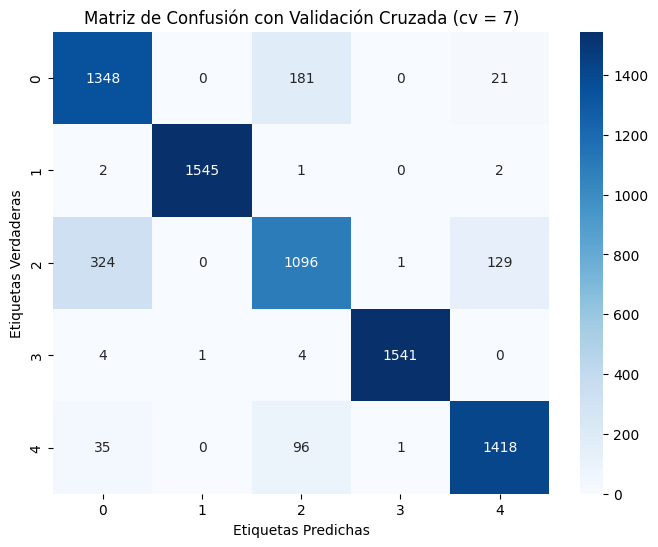

Exactitud media: 0.8965161290322581
Precisión media: 0.8967041640703312
Recall media: 0.8965161290322581
Puntuación F1 media: 0.8956694727941952
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_8.png


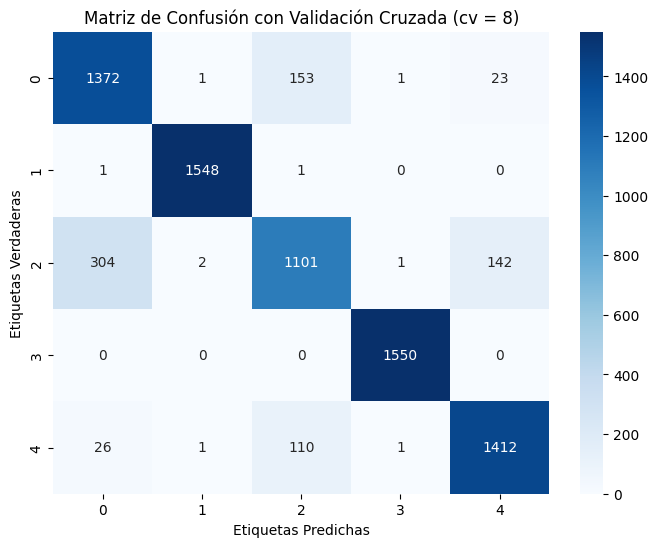

Exactitud media: 0.9010322580645161
Precisión media: 0.9006184820982018
Recall media: 0.9010322580645161
Puntuación F1 media: 0.899826622000696
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_9.png


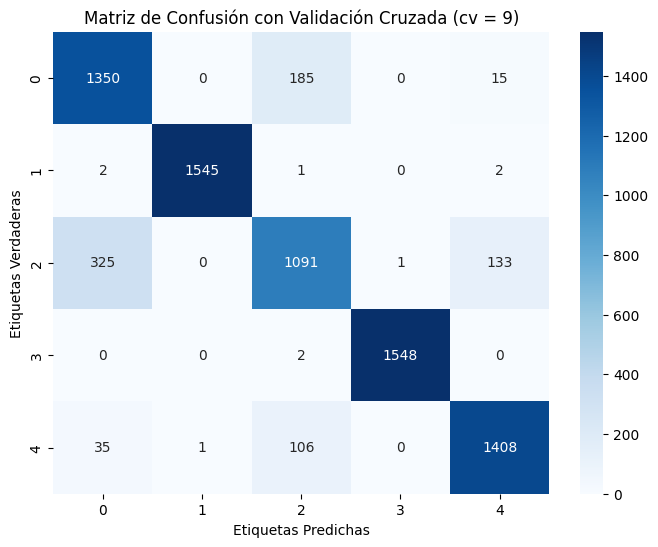

Exactitud media: 0.8957419354838709
Precisión media: 0.8957414693506656
Recall media: 0.8957419354838709
Puntuación F1 media: 0.8948594306780543
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_10.png


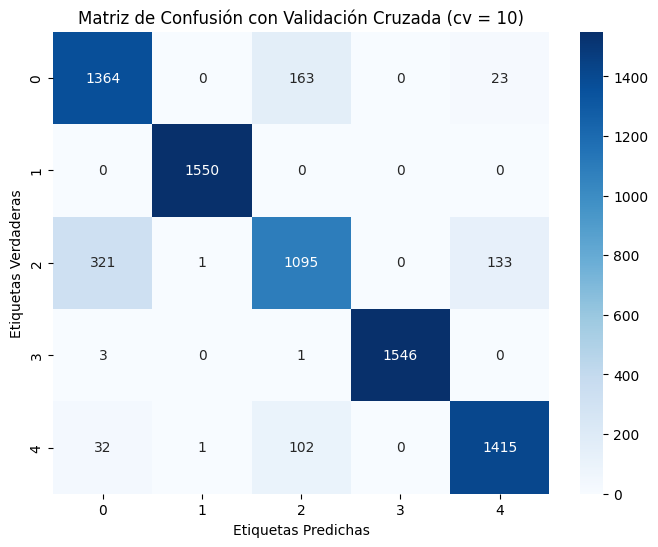

Exactitud media: 0.8993548387096775
Precisión media: 0.8993980521795097
Recall media: 0.8993548387096775
Puntuación F1 media: 0.8982786947933024
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_8_estimators/random_forest_llava_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_sim_9_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.1.png


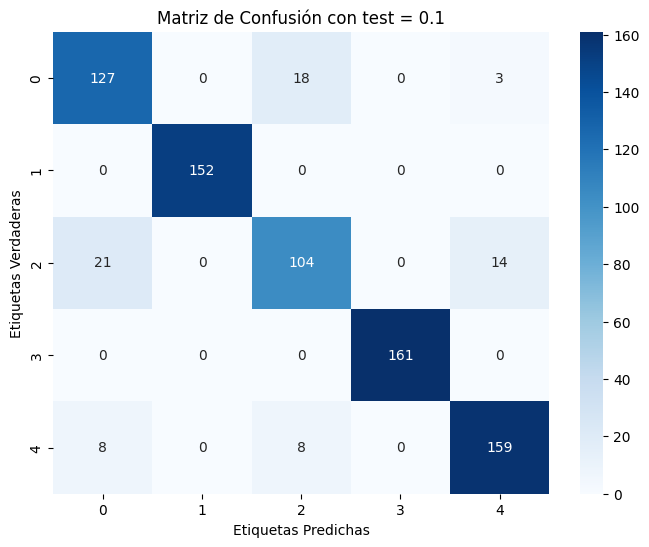

Exactitud del modelo: 0.9070967741935484
Precisión del modelo: 0.9068177682532521
Recall del modelo: 0.9070967741935484
Puntuación F1 del modelo: 0.9066896221770275
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.2.png


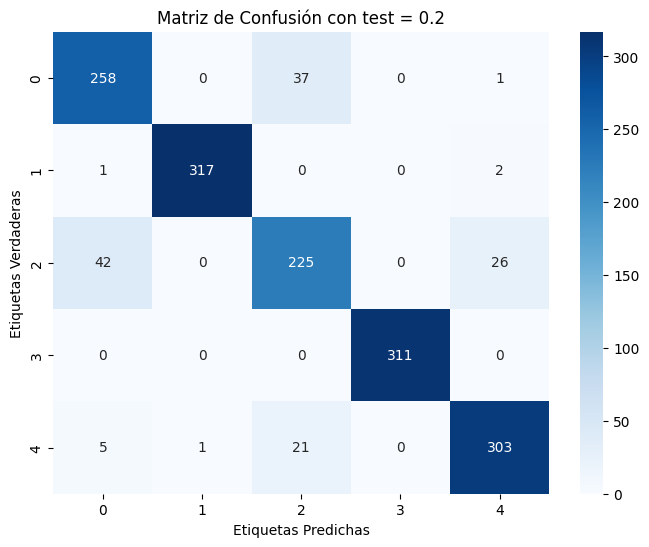

Exactitud del modelo: 0.912258064516129
Precisión del modelo: 0.9120564948214972
Recall del modelo: 0.912258064516129
Puntuación F1 del modelo: 0.9120637795269833
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.3.png


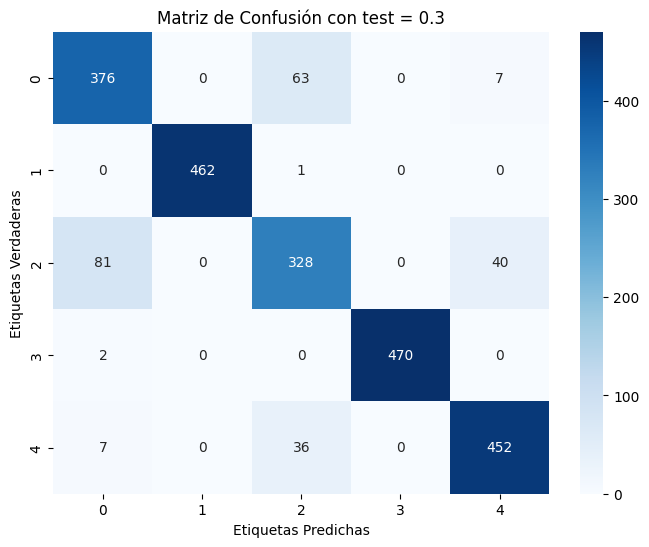

Exactitud del modelo: 0.8980645161290323
Precisión del modelo: 0.8977775795247938
Recall del modelo: 0.8980645161290323
Puntuación F1 del modelo: 0.897757787824418
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.4.png


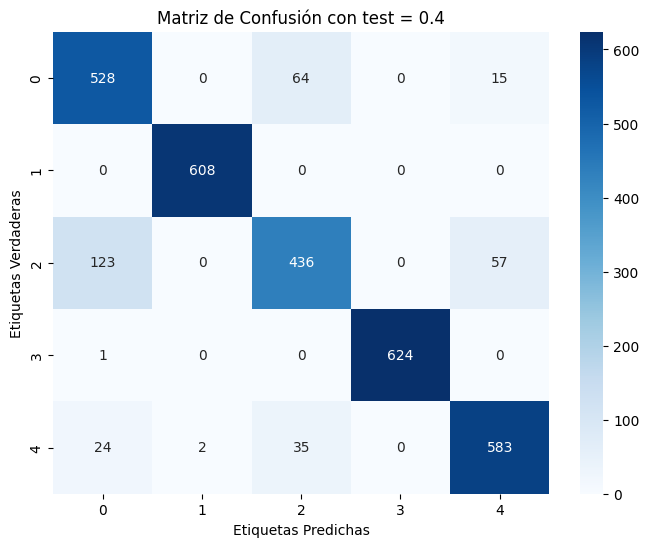

Exactitud del modelo: 0.8964516129032258
Precisión del modelo: 0.8968817553262592
Recall del modelo: 0.8964516129032258
Puntuación F1 del modelo: 0.8954359047245462
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.5.png


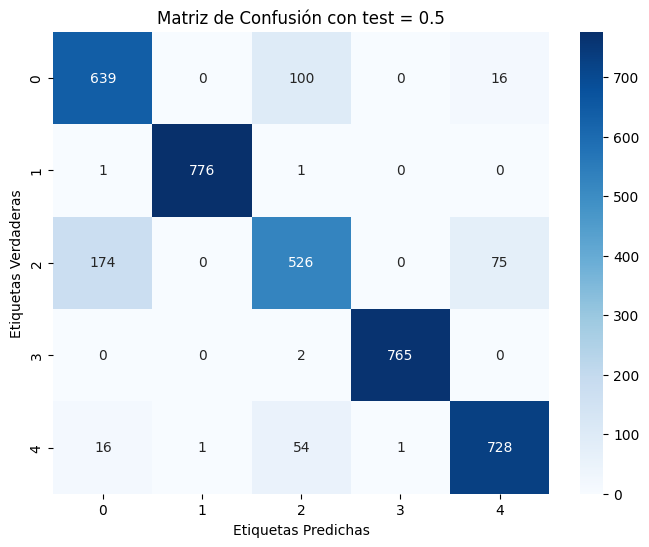

Exactitud del modelo: 0.8861935483870967
Precisión del modelo: 0.885734110389212
Recall del modelo: 0.8861935483870967
Puntuación F1 del modelo: 0.8850086685397414
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.6.png


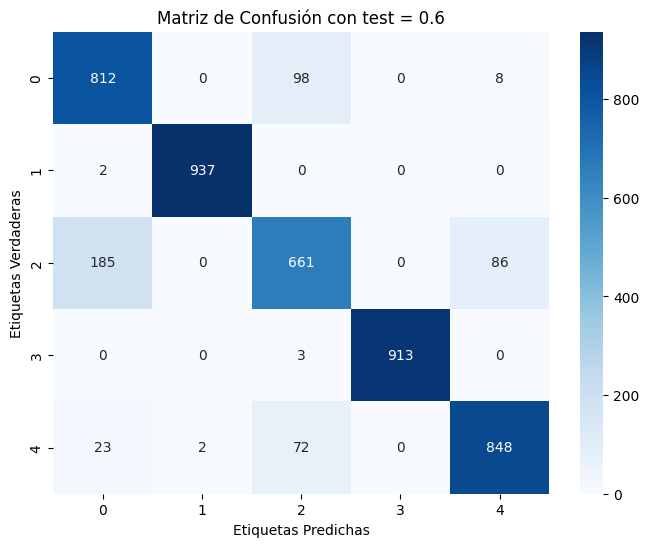

Exactitud del modelo: 0.8969892473118279
Precisión del modelo: 0.897148809201314
Recall del modelo: 0.8969892473118279
Puntuación F1 del modelo: 0.8961282685235761
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.7.png


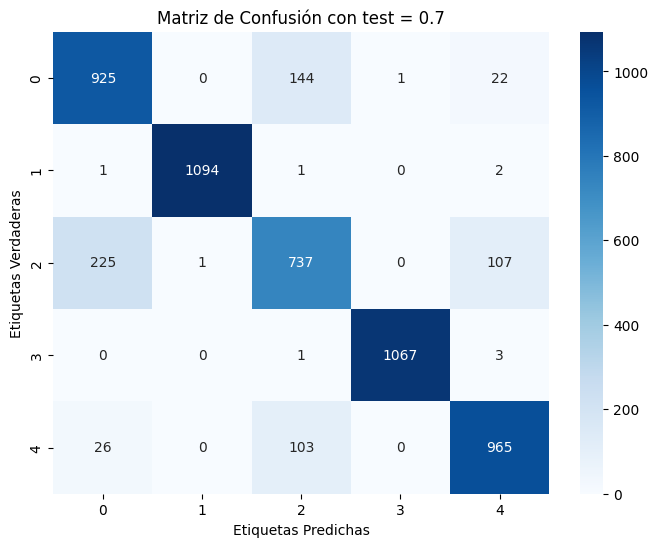

Exactitud del modelo: 0.8825806451612903
Precisión del modelo: 0.8821363917434073
Recall del modelo: 0.8825806451612903
Puntuación F1 del modelo: 0.8818897617068265
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.8.png


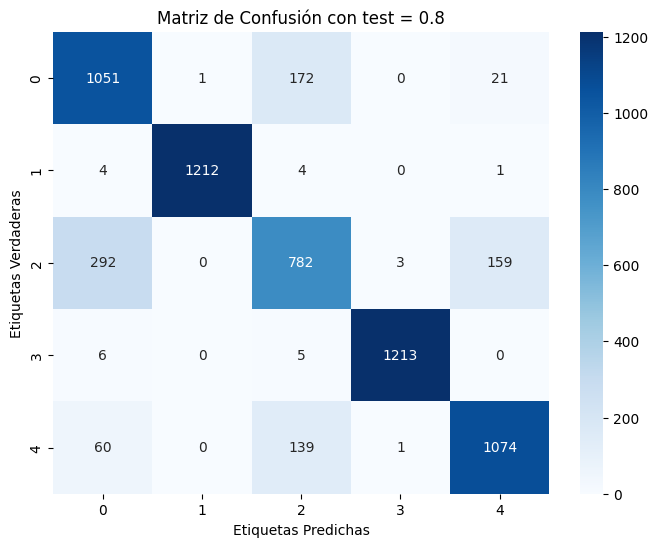

Exactitud del modelo: 0.86
Precisión del modelo: 0.8602192624620701
Recall del modelo: 0.86
Puntuación F1 del modelo: 0.8590195920015542
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.9.png


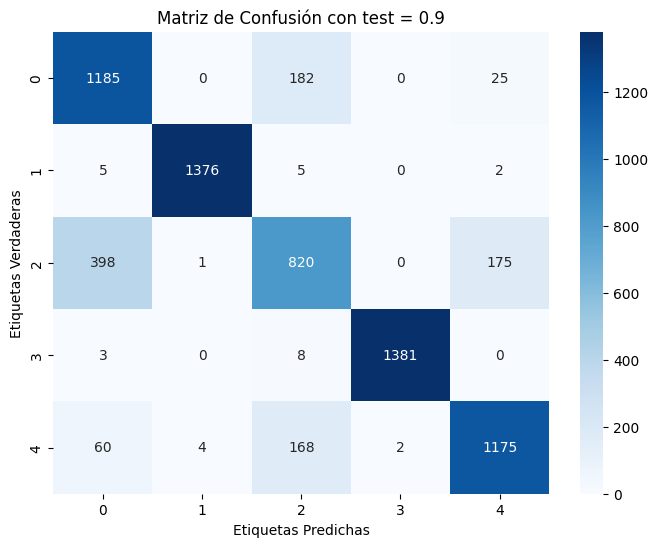

Exactitud del modelo: 0.8511827956989247
Precisión del modelo: 0.8517026859844793
Recall del modelo: 0.8511827956989247
Puntuación F1 del modelo: 0.8494242607524616
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_9_estimators/random_forest_llava_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_cruz_9_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_2.png


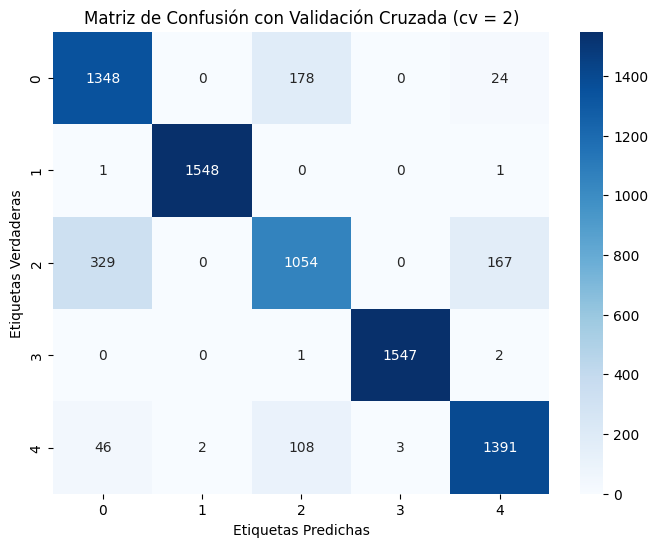

Exactitud media: 0.888774193548387
Precisión media: 0.8884519761791674
Recall media: 0.888774193548387
Puntuación F1 media: 0.8873583034420625
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_3.png


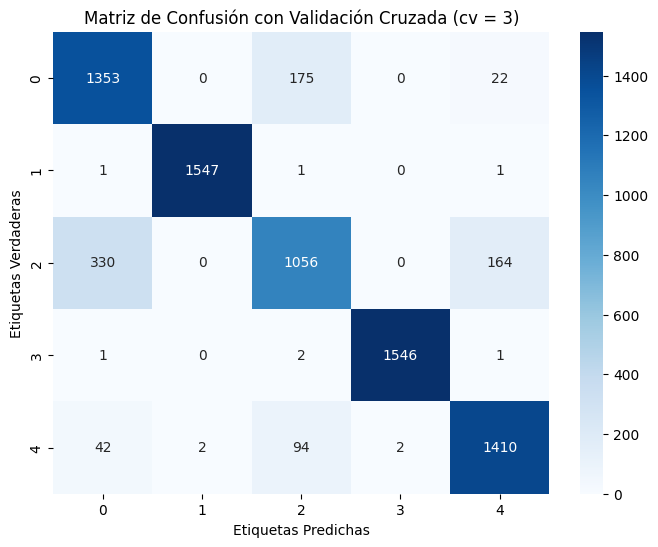

Exactitud media: 0.8918709677419355
Precisión media: 0.8916780018531133
Recall media: 0.8918709677419355
Puntuación F1 media: 0.8903709829778983
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_4.png


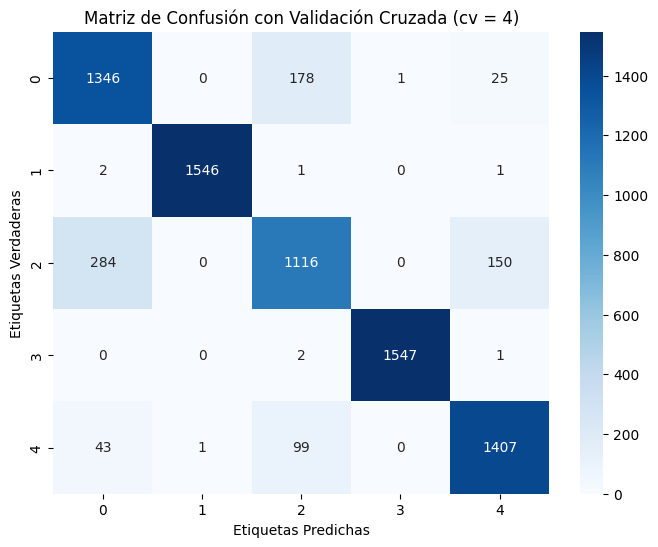

Exactitud media: 0.8983225806451612
Precisión media: 0.8979948384328151
Recall media: 0.8983225806451612
Puntuación F1 media: 0.8974709201217396
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_5.png


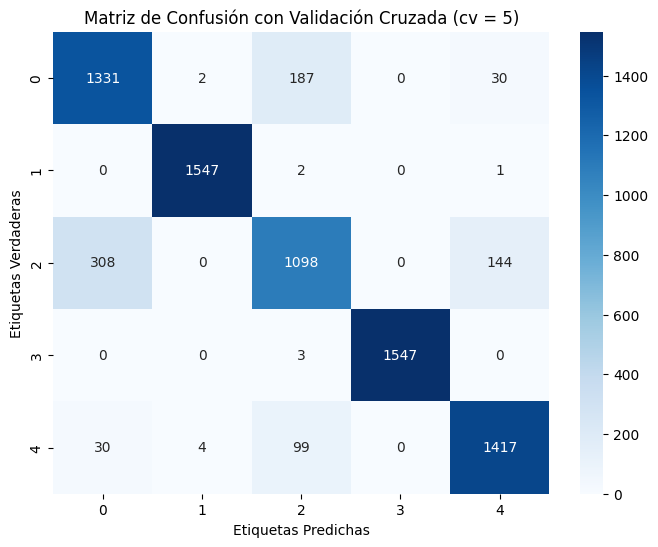

Exactitud media: 0.895483870967742
Precisión media: 0.8948384340383979
Recall media: 0.895483870967742
Puntuación F1 media: 0.8944523971625505
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_6.png


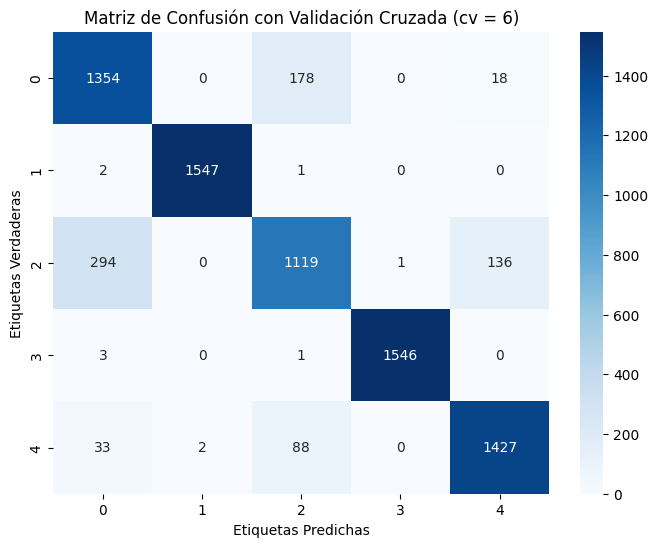

Exactitud media: 0.9023225806451612
Precisión media: 0.9021034334830984
Recall media: 0.9023225806451612
Puntuación F1 media: 0.9014279231546451
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_7.png


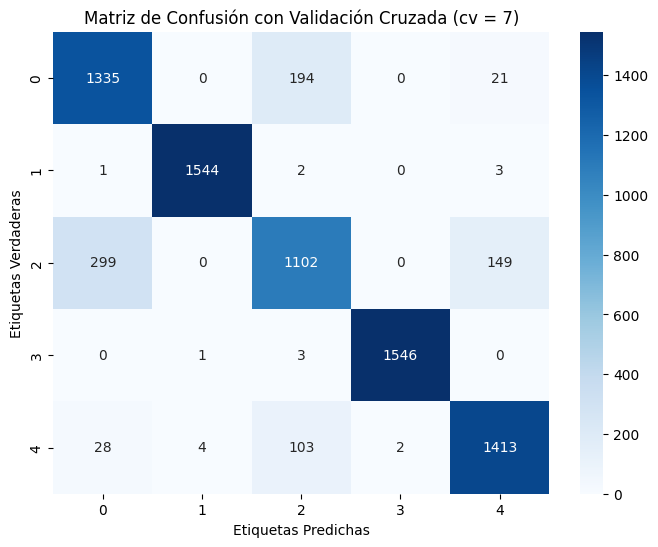

Exactitud media: 0.895483870967742
Precisión media: 0.8948134093036834
Recall media: 0.895483870967742
Puntuación F1 media: 0.8945535467176959
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_8.png


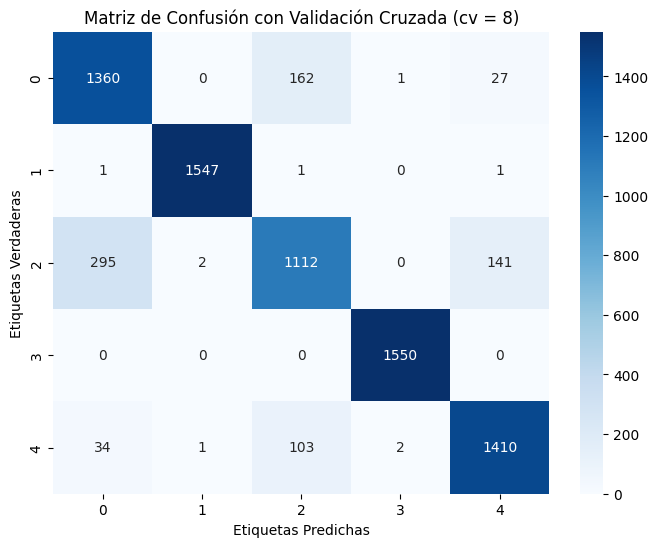

Exactitud media: 0.9005161290322581
Precisión media: 0.9001606703085839
Recall media: 0.9005161290322581
Puntuación F1 media: 0.8994826257568467
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_9.png


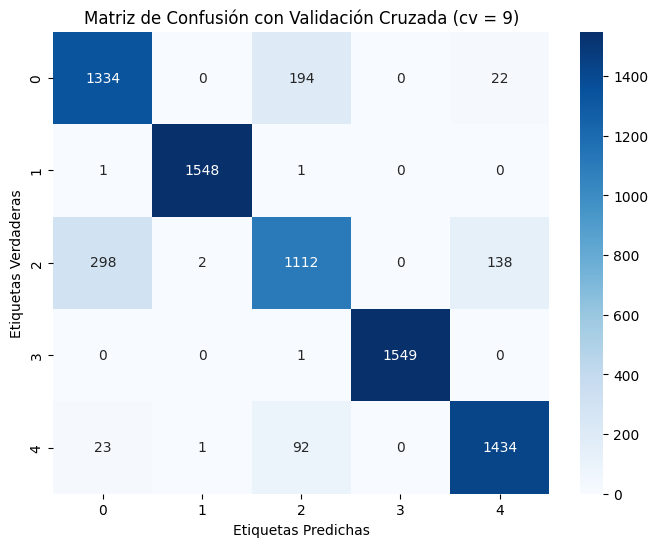

Exactitud media: 0.900258064516129
Precisión media: 0.8995061244642386
Recall media: 0.900258064516129
Puntuación F1 media: 0.8992733244240485
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_10.png


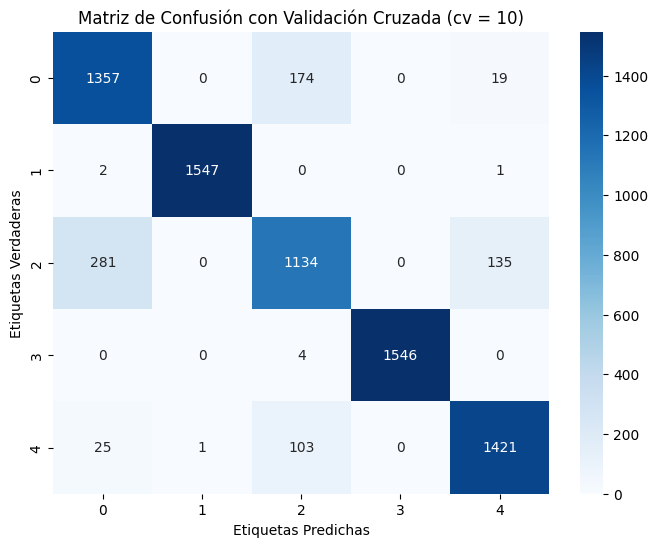

Exactitud media: 0.9038709677419355
Precisión media: 0.9034864387875409
Recall media: 0.9038709677419355
Puntuación F1 media: 0.9031316008789319
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_9_estimators/random_forest_llava_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_sim_10_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.1.png


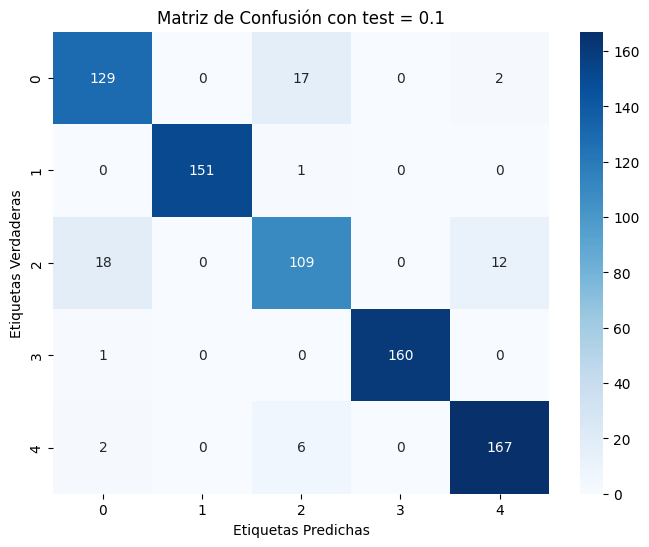

Exactitud del modelo: 0.9238709677419354
Precisión del modelo: 0.9234340408140295
Recall del modelo: 0.9238709677419354
Puntuación F1 del modelo: 0.9235107424692091
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.2.png


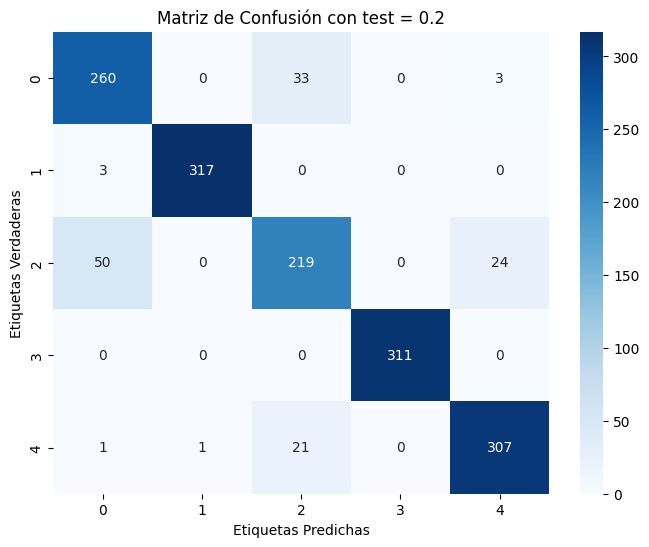

Exactitud del modelo: 0.912258064516129
Precisión del modelo: 0.9119074589873981
Recall del modelo: 0.912258064516129
Puntuación F1 del modelo: 0.9117488500456008
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.3.png


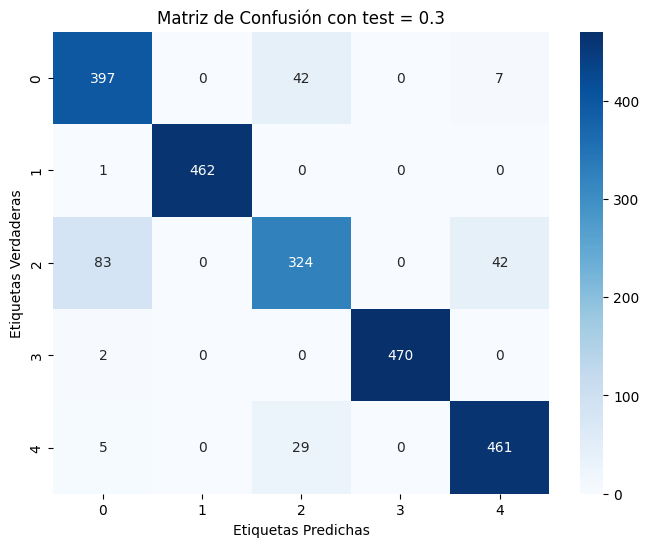

Exactitud del modelo: 0.909247311827957
Precisión del modelo: 0.9090609955138833
Recall del modelo: 0.909247311827957
Puntuación F1 del modelo: 0.9081696123562083
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.4.png


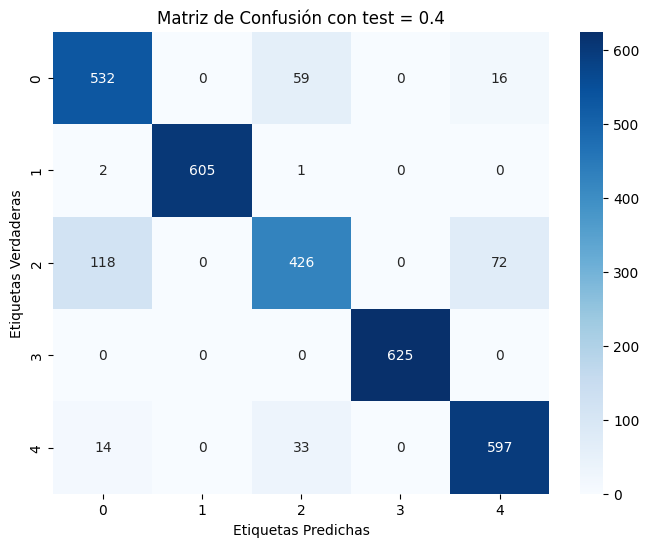

Exactitud del modelo: 0.8983870967741936
Precisión del modelo: 0.8983085552468932
Recall del modelo: 0.8983870967741936
Puntuación F1 del modelo: 0.8967190370988307
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.5.png


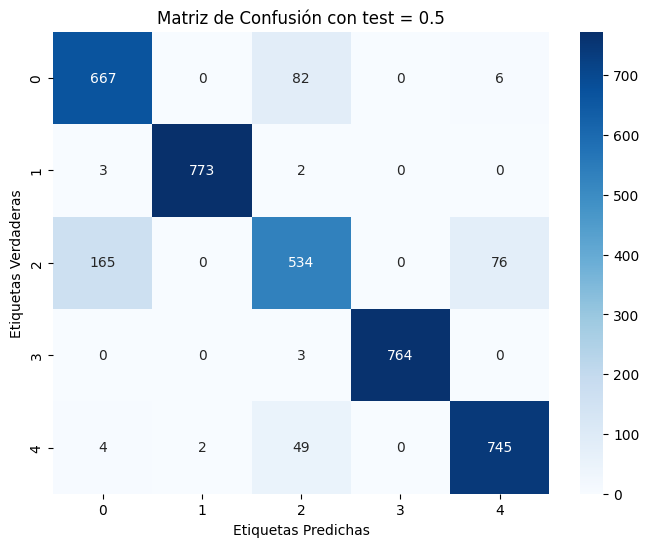

Exactitud del modelo: 0.8988387096774193
Precisión del modelo: 0.8984713476481585
Recall del modelo: 0.8988387096774193
Puntuación F1 del modelo: 0.897362712943062
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.6.png


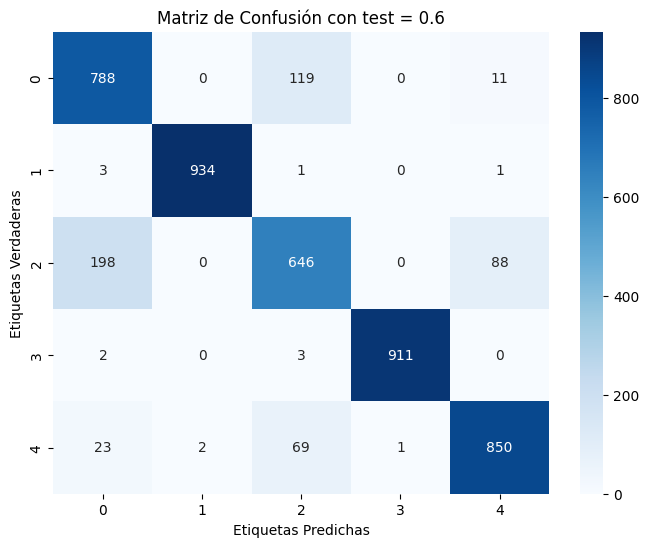

Exactitud del modelo: 0.8879569892473118
Precisión del modelo: 0.8880376293402575
Recall del modelo: 0.8879569892473118
Puntuación F1 del modelo: 0.8871821841967561
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.7.png


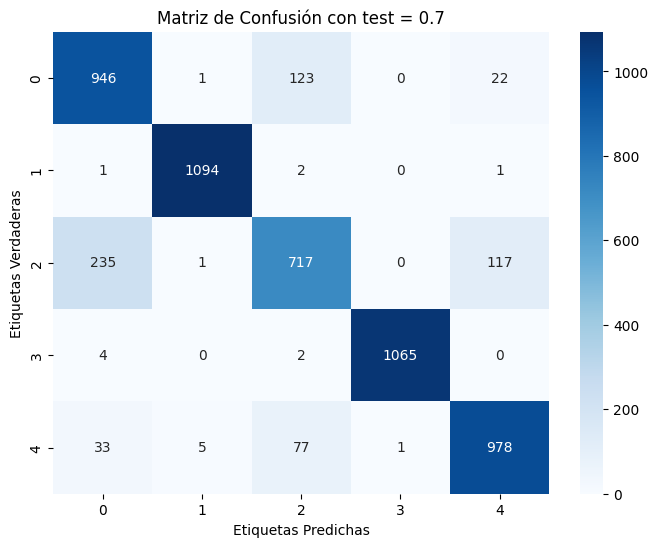

Exactitud del modelo: 0.8847926267281107
Precisión del modelo: 0.8845085084322338
Recall del modelo: 0.8847926267281107
Puntuación F1 del modelo: 0.8833288562220051
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.8.png


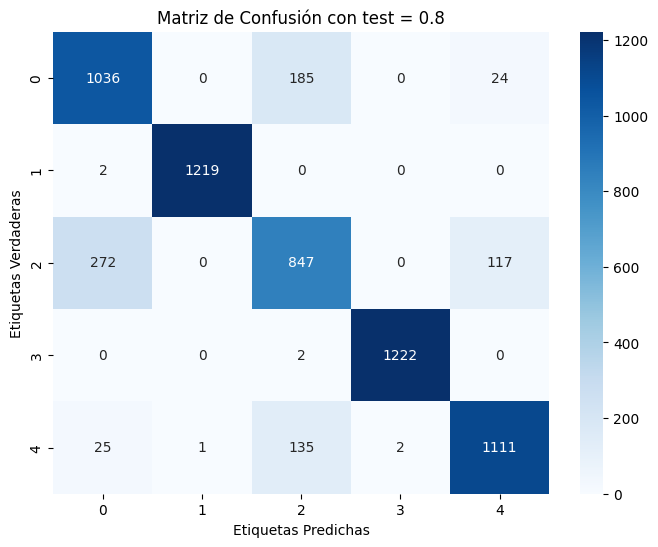

Exactitud del modelo: 0.8766129032258064
Precisión del modelo: 0.8764877029186369
Recall del modelo: 0.8766129032258064
Puntuación F1 del modelo: 0.8762310123007417
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.9.png


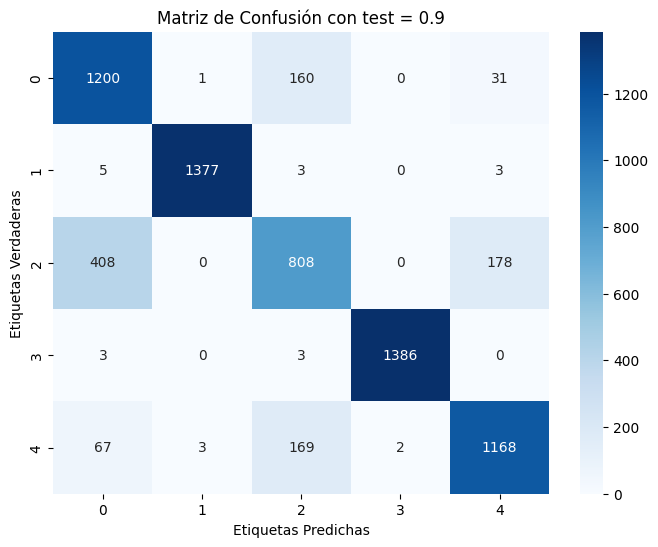

Exactitud del modelo: 0.8514695340501792
Precisión del modelo: 0.8522533445614224
Recall del modelo: 0.8514695340501792
Puntuación F1 del modelo: 0.8491755197970596
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_sim_10_estimators/random_forest_llava_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta Random_Forest_val_cruz_10_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_2.png


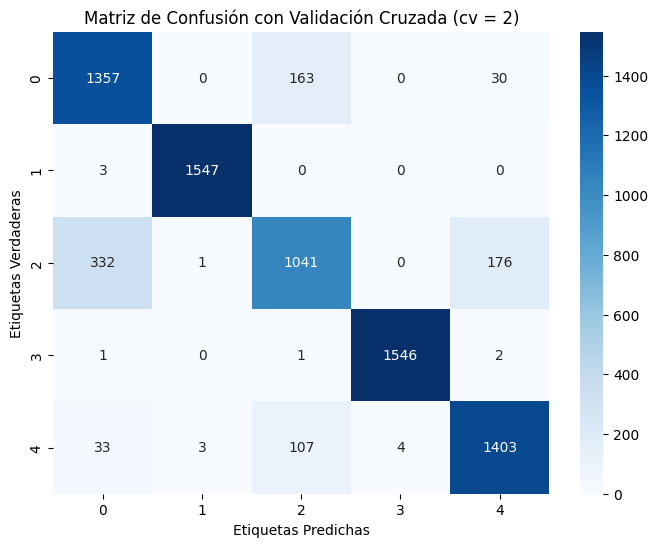

Exactitud media: 0.8895483870967742
Precisión media: 0.8890768070295777
Recall media: 0.8895483870967742
Puntuación F1 media: 0.8877536854217796
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_3.png


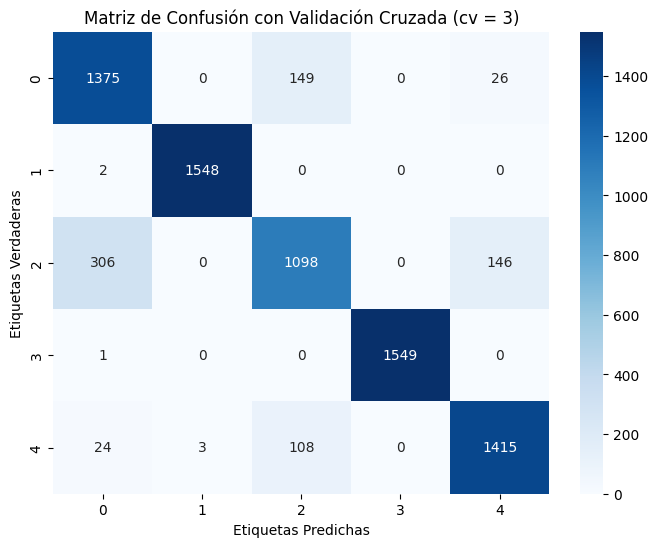

Exactitud media: 0.9012903225806451
Precisión media: 0.901010480767465
Recall media: 0.9012903225806451
Puntuación F1 media: 0.9000429777758714
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_4.png


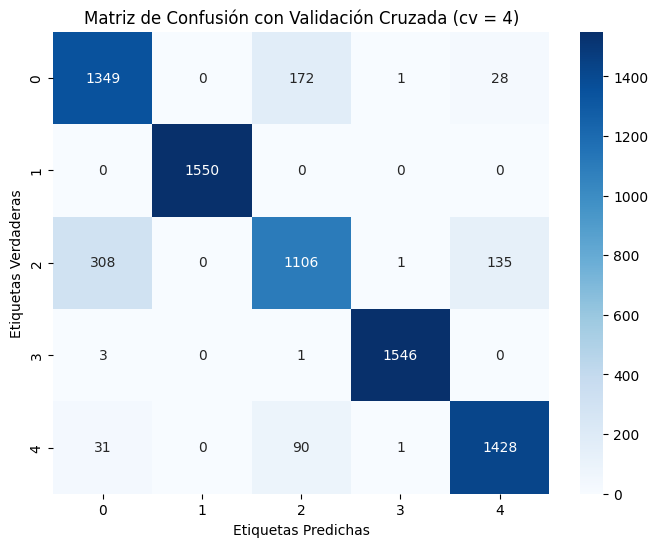

Exactitud media: 0.9005161290322581
Precisión media: 0.9002507514331448
Recall media: 0.9005161290322581
Puntuación F1 media: 0.8994517309620519
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_5.png


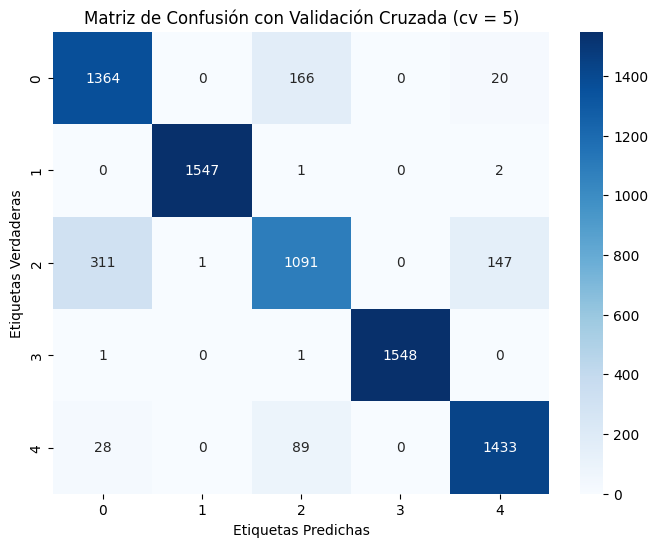

Exactitud media: 0.9010322580645161
Precisión media: 0.9007355072323828
Recall media: 0.9010322580645161
Puntuación F1 media: 0.8997226159706914
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_6.png


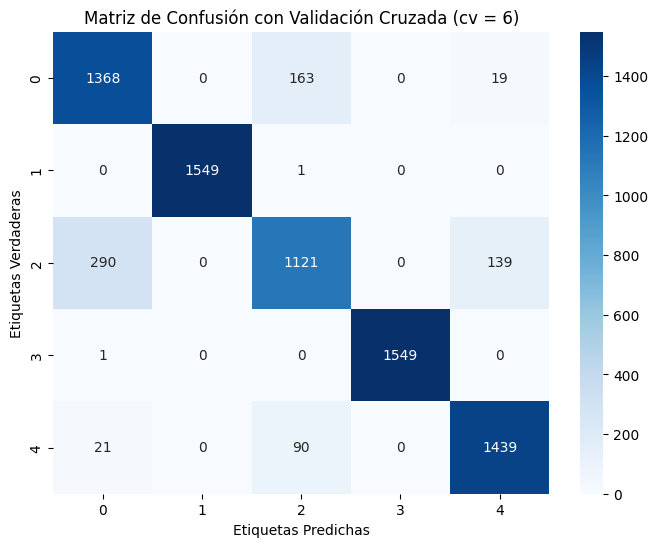

Exactitud media: 0.9065806451612903
Precisión media: 0.906124587497662
Recall media: 0.9065806451612903
Puntuación F1 media: 0.905486189462622
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_7.png


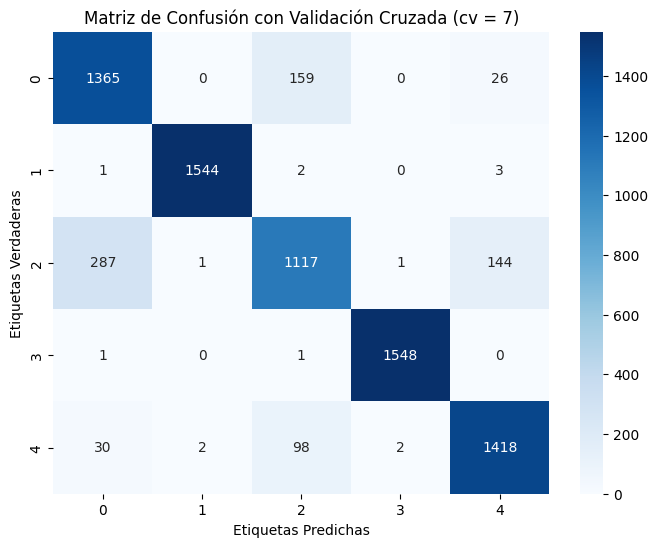

Exactitud media: 0.9021935483870968
Precisión media: 0.9018287374361518
Recall media: 0.9021935483870968
Puntuación F1 media: 0.9011546801058132
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_8.png


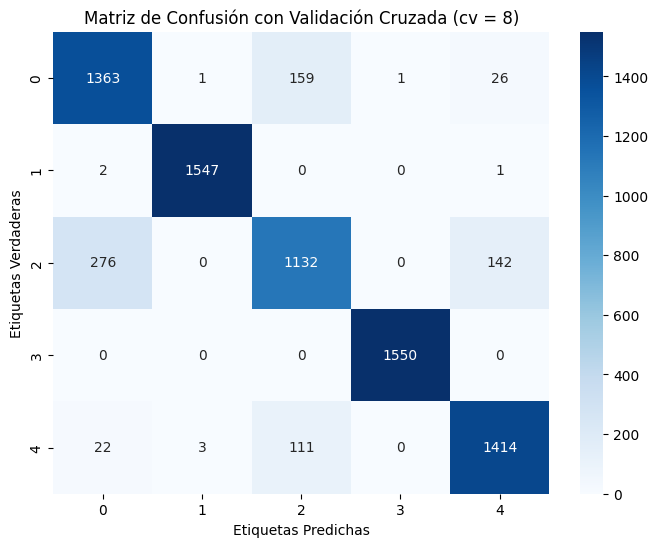

Exactitud media: 0.904
Precisión media: 0.9034076113644887
Recall media: 0.904
Puntuación F1 media: 0.903087066921603
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_9.png


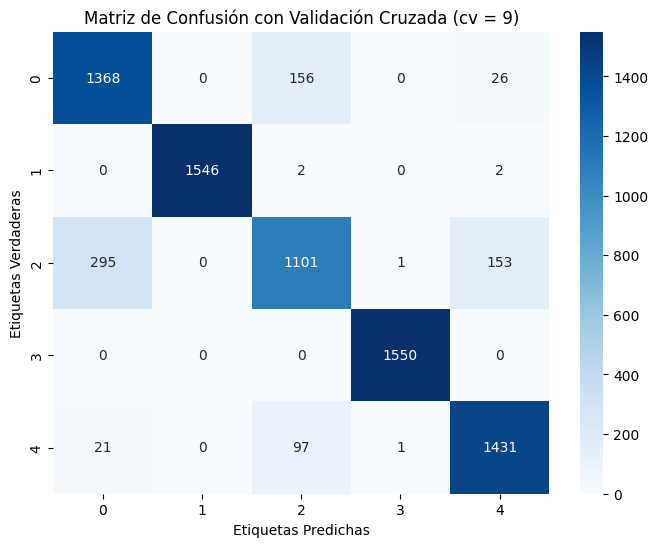

Exactitud media: 0.9027096774193548
Precisión media: 0.9021453816784272
Recall media: 0.9027096774193548
Puntuación F1 media: 0.9013880675816582
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_10.png


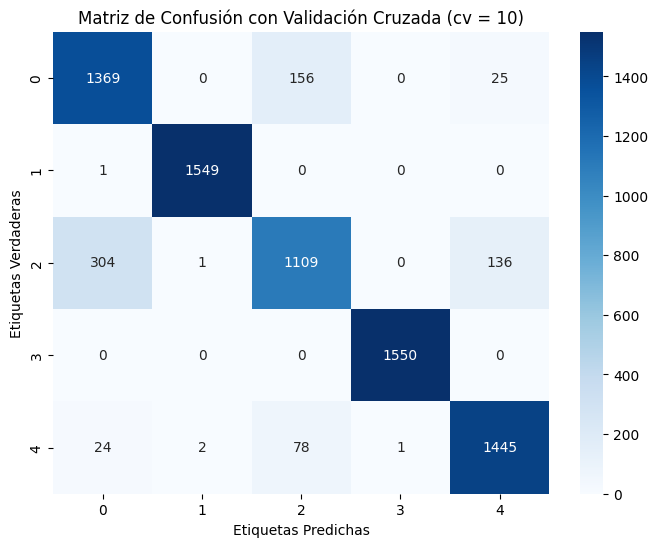

Exactitud media: 0.9060645161290323
Precisión media: 0.9058358108116767
Recall media: 0.9060645161290323
Puntuación F1 media: 0.9047525226701493
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/Random_Forest_val_cruz_10_estimators/random_forest_llava_embedding_val_cruz.json


In [5]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/random_forest_llava_embedding_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/random_forest_llava_embedding_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}
for h in range(1,11):
    experimento = 1
    for i in lista_valores:
        resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = random_forest_classification(datos,h,test_size_1=i)
        experimento = experimento + 1
    
    almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)
    
    lista = list(range(2, 11))
    for j in lista:
        resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = random_forest_classification(datos,h,cv=j)
    
    almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)